<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/hccho2/DL-UPMTP/blob/master/DL-TF-TORCH-CH8-RNN-NLP.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

# 8.1 단어 Embedding

## 8.1.1 Word Embedding - Tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.initializers import Constant

In [ ]:
vocab_size = 100
embedding_dim = 128
batch_size = 2
length = 8

In [ ]:
X = tf.random.uniform((batch_size,length),maxval=vocab_size,dtype=tf.int32)

In [ ]:
embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)

In [ ]:
out = embedding(X)
out.shape

TensorShape([2, 8, 128])

In [ ]:
out

### 주어진 embedding vector로 초기화 하기

In [ ]:
init = np.arange(vocab_size*embedding_dim).reshape(vocab_size,-1)
embedding2 = tf.keras.layers.Embedding(vocab_size, embedding_dim,embeddings_initializer=Constant(init)) # trainable=True

In [ ]:
out2 = embedding2(X)
out2.shape

TensorShape([2, 8, 128])

In [ ]:
embedding2.trainable

True

## 8.1.2 Word Embedding - Pytorch
- padding_idx가 지정되면 gradient update가 되지 않는다.

In [ ]:
import torch

In [ ]:
vocab_size = 100
embedding_dim = 128
batch_size = 2
length = 8

In [ ]:
X = torch.randint(vocab_size,size=(batch_size,length))

In [ ]:
embedding = torch.nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

In [ ]:
out = embedding(X)
out.shape

torch.Size([2, 8, 128])

In [ ]:
embedding.weight[0]

tensor([ 1.5336e+00, -6.5062e-01, -9.7167e-01, -2.6816e+00, -1.3494e+00,
         6.3175e-01,  7.6469e-02,  1.7265e+00, -2.5190e-01, -6.1116e-01,
         8.1129e-01,  8.1627e-01,  4.7382e-02, -8.1416e-01, -1.0238e+00,
        -1.3551e+00,  1.0060e+00, -1.6156e+00, -4.8394e-01,  1.9812e+00,
        -1.5772e+00,  4.5699e-01, -5.9526e-01, -5.4347e-01, -9.7061e-01,
         2.4524e+00,  4.1696e-01, -8.9328e-01, -1.3432e+00,  2.5042e-01,
         3.1727e-01, -2.3246e+00,  9.8243e-01,  1.0440e+00,  7.6333e-02,
         6.1363e-01, -3.3504e-01,  2.2899e-01,  3.4607e-01, -6.5546e-01,
         2.1913e+00,  2.2919e+00, -1.5210e+00, -8.7407e-01, -7.5180e-02,
         7.0410e-01,  4.4958e-01, -9.6022e-01, -1.4970e+00, -7.0524e-01,
        -2.1102e+00,  1.3280e+00, -1.0949e-01, -7.2706e-01,  2.0098e-01,
        -1.2490e+00, -1.0662e+00,  6.4725e-01,  1.7110e+00, -1.6585e+00,
         1.0970e-01, -4.2089e-01,  7.4073e-01,  1.7764e-01,  6.7041e-01,
         1.0894e+00,  6.6711e-01, -7.0827e-03, -4.0

### 주어진 embedding vector로 초기화 하기

In [ ]:
init = torch.arange(vocab_size*embedding_dim).reshape(vocab_size,-1).float()
embedding2 = torch.nn.Embedding.from_pretrained(init,freeze=False)

In [ ]:
out2 = embedding2(X)
out2.shape

torch.Size([2, 8, 128])

In [ ]:
embedding2.weight.requires_grad

True

In [ ]:
init.requires_grad

False

## 8.1.3 Word Embedding - From Scratch

In [ ]:
import numpy as np
import torch
import tensorflow as tf

### Numpy Array

In [ ]:
vocab_size=5  # word token(단어) 갯수
embedding_dim = 2 # embedding 차원
E = np.arange(vocab_size*embedding_dim,dtype=np.float32).reshape(vocab_size,embedding_dim)
E

array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.],
       [8., 9.]], dtype=float32)

In [ ]:
sentence = [2,3,1,0,0,0]
batch_sentence = [[2,3,1,0,0,0],[4,2,3,3,1,2]]

In [ ]:
E[sentence,:]  # shape: (T,embedding_dim)

array([[4., 5.],
       [6., 7.],
       [2., 3.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
E[batch_sentence,:] # shape (N,T,embedding_dim)

array([[[4., 5.],
        [6., 7.],
        [2., 3.],
        [0., 1.],
        [0., 1.],
        [0., 1.]],

       [[8., 9.],
        [4., 5.],
        [6., 7.],
        [6., 7.],
        [2., 3.],
        [4., 5.]]], dtype=float32)

### Pytorch Embedding

In [ ]:
vocab_size=5  # word token(단어) 갯수
embedding_dim = 2 # embedding 차원
E1 = torch.arange(vocab_size*embedding_dim,dtype=torch.float32).reshape(vocab_size,embedding_dim)
E1

tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]])

In [ ]:
sentence = [2,3,1,0,0,0]
batch_sentence = [[2,3,1,0,0,0],[4,2,3,3,1,2]]

In [ ]:
E1[sentence,:]  # shape: (T,embedding_dim)

tensor([[4., 5.],
        [6., 7.],
        [2., 3.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])

In [ ]:
E1[batch_sentence,:] # shape (N,T,embedding_dim)

tensor([[[4., 5.],
         [6., 7.],
         [2., 3.],
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[8., 9.],
         [4., 5.],
         [6., 7.],
         [6., 7.],
         [2., 3.],
         [4., 5.]]])

## 8.1.4 Word Embedding Back Propagation

In [ ]:
import torch
import tensorflow as tf
import numpy as np

Pytorch 구현

In [ ]:
vocab_size=5  # word token(단어) 갯수
embedding_dim = 2 # embedding 차원
E1 = torch.arange(vocab_size*embedding_dim,dtype=torch.float32).reshape(vocab_size,embedding_dim)

In [ ]:
embedding = torch.nn.Embedding.from_pretrained(E1,freeze=False)

In [ ]:
sentence = [2,3,1,0,0,0]
batch_sentence = [[2,3,1,0,0,0],[4,2,3,3,1,2]]

In [ ]:
Y = embedding(torch.IntTensor(batch_sentence))
Y

tensor([[[4., 5.],
         [6., 7.],
         [2., 3.],
         [0., 1.],
         [0., 1.],
         [0., 1.]],

        [[8., 9.],
         [4., 5.],
         [6., 7.],
         [6., 7.],
         [2., 3.],
         [4., 5.]]], grad_fn=<EmbeddingBackward0>)

In [ ]:
dY = torch.randn(Y.shape)  # upsteam gradient

In [ ]:
Y.backward(dY)

In [ ]:
embedding.weight.grad  # Pytroch의 자동미분으로 계산한 embedding matrix의 gradient

tensor([[ 1.7792,  0.1502],
        [ 1.8675,  0.0296],
        [ 0.8060, -0.3386],
        [ 0.2986,  2.8327],
        [-0.5384, -0.3810]])

Numpy 구현(직접 계산)

In [ ]:
manual_grad = np.zeros_like(E1)  # (vocab_size, embedding_dim)
np.add.at(manual_grad,np.array(batch_sentence),dY)
manual_grad

array([[ 1.7792274 ,  0.1502338 ],
       [ 1.8674607 ,  0.02964222],
       [ 0.8060206 , -0.33855736],
       [ 0.29861987,  2.832727  ],
       [-0.538436  , -0.3810086 ]], dtype=float32)

In [ ]:
np.allclose(manual_grad, embedding.weight.grad)

True

Tensorflow 구현
- 아래 내용은 책에는 없는 내용입니다.
- 건너뛰어도 무방합니다.

In [ ]:
from tensorflow.keras.initializers import Constant

In [ ]:
vocab_size=5  # word token(단어) 갯수
embedding_dim = 2 # embedding 차원
E2 = tf.reshape(tf.range(vocab_size*embedding_dim,dtype=tf.float32),(vocab_size,embedding_dim))
E2

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.],
       [8., 9.]], dtype=float32)>

In [ ]:
sentence = [2,3,1,0,0,0]
batch_sentence = [[2,3,1,0,0,0],[4,2,3,3,1,2]]

In [ ]:
tf.gather(E2,batch_sentence) # sentence 또는 batch_sentence

<tf.Tensor: shape=(2, 6, 2), dtype=float32, numpy=
array([[[4., 5.],
        [6., 7.],
        [2., 3.],
        [0., 1.],
        [0., 1.],
        [0., 1.]],

       [[8., 9.],
        [4., 5.],
        [6., 7.],
        [6., 7.],
        [2., 3.],
        [4., 5.]]], dtype=float32)>

In [ ]:
# layer로 계산할 수도 있다.
embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim,embeddings_initializer=Constant(E2))
embedding(np.array(batch_sentence))

<tf.Tensor: shape=(2, 6, 2), dtype=float32, numpy=
array([[[4., 5.],
        [6., 7.],
        [2., 3.],
        [0., 1.],
        [0., 1.],
        [0., 1.]],

       [[8., 9.],
        [4., 5.],
        [6., 7.],
        [6., 7.],
        [2., 3.],
        [4., 5.]]], dtype=float32)>

In [ ]:
with tf.GradientTape() as tape:
    Y = embedding(np.array(batch_sentence))

dE = tape.gradient(Y, embedding.trainable_weights,output_gradients=dY)
# dE[0].indices, dE[0].values에는 각각 batch_sentence, dY가 들어가 있다.

manual_grad_tf = np.zeros_like(E2)  # (vocab_size, embedding_dim)
np.add.at(manual_grad_tf,dE[0].indices.numpy(),dE[0].values)

manual_grad_tf

array([[ 1.7792274 ,  0.1502338 ],
       [ 1.8674607 ,  0.02964222],
       [ 0.8060206 , -0.33855736],
       [ 0.29861987,  2.832727  ],
       [-0.538436  , -0.3810086 ]], dtype=float32)

In [ ]:
np.allclose(manual_grad, manual_grad_tf)

True

# 8.2 RNN

## 8.2.5 Character Level Model 구현 - From Scratch


In [ ]:
import numpy as np
import copy

In [ ]:
with open('shakespeare-Tragedy of Coriolanus.txt', 'r', encoding='utf-8') as f:
    text=f.read()

chars = list(set(text))

char_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_char = { i:ch for i,ch in enumerate(chars) }

print (f'데이터 길이: {len(text)}, 문자 수: {len(chars)}' )

text_integers = np.array([char_to_int[c] for c in text],dtype=np.int32)

데이터 길이: 1115394, 문자 수: 65


In [ ]:
batch_size = 64
seq_length = 100
num_blocks = int(len(text_integers)/(batch_size*seq_length))
if len(text) < num_blocks*batch_size*seq_length:
    num_bock = num_blocks -1

x = text_integers[0:num_blocks*batch_size*seq_length]
y = text_integers[1:num_blocks*batch_size*seq_length+1]

train_x = np.split(x,batch_size)
train_y = np.split(y,batch_size)

train_x = np.stack(train_x)
train_y = np.stack(train_y)
print(f'train_x shape: {train_x.shape}, train_y shape: {train_y.shape}')

train_x shape: (64, 17400), train_y shape: (64, 17400)


In [ ]:
def make_mini_batch(train_x, train_y, seq_length):
    # 데이터의 총 길이(length)를 seq_length 만큼씩 잘라 mini-batch를 만든다.
    batch_size, length = train_x.shape
    num_blocks = int(length/seq_length)
    for i in range(num_blocks):
        yield (train_x[:, i*seq_length: (i+1)*seq_length], train_y[:, i*seq_length: (i+1)*seq_length])

In [ ]:
for i, (input, target) in enumerate(make_mini_batch(train_x, train_y, seq_length)):
    print(input.shape, target.shape)
    if i>3: break

(64, 100) (64, 100)
(64, 100) (64, 100)
(64, 100) (64, 100)
(64, 100) (64, 100)
(64, 100) (64, 100)


### vanilla RNN Model 구현

In [ ]:
class CharacterLevelModel:
    def __init__(self,embedding_dim,hidden_dim,vocab_size,lr=0.001):
        # vanilla RNN
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.lr = lr

        self.E = np.random.randn(vocab_size,embedding_dim)*0.01
        self.Wxh = np.random.randn(embedding_dim, hidden_dim)/np.sqrt(embedding_dim) # input to hidden
        self.Whh = np.random.randn(hidden_dim, hidden_dim)/np.sqrt(hidden_dim) # hidden to hidden
        self.Why = np.random.randn(hidden_dim, vocab_size)/np.sqrt(hidden_dim) # hidden to output
        self.bh = np.zeros((hidden_dim)) # hidden bias
        self.by = np.zeros((vocab_size)) # output bias

    def reset_hidden_state(self,batch_size):
        self.prev_hs = np.zeros((batch_size,self.hidden_dim))

    def train_step(self,inputs,targets):
        # inputs,targets: (N,T)

        # forward
        N,T = inputs.shape[:2]
        hs ,y, p = {}, {}, {}
        loss = 0.
        hs[-1] = self.prev_hs
        x = self.E[inputs,:]  # (N,T,embedding_dim)
        for t in range(T):
            hs[t] = np.tanh(np.dot(x[:,t,:],self.Wxh) + np.dot(hs[t-1], self.Whh) + self.bh)  #(N,hidden_dim)
            y[t] = np.dot(hs[t],self.Why) + self.by # FC --> (N,vocab_size)
            p[t] = np.exp(y[t]) / np.sum(np.exp(y[t]),axis=-1,keepdims=True)  # softmax --> (N,vocab_size)
            loss += -np.log(p[t][np.arange(N),targets[:,t]]).mean()
        self.prev_hs = hs[T-1]

        # backward
        dE = np.zeros_like(self.E)
        dWxh, dWhh, dWhy = np.zeros_like(self.Wxh), np.zeros_like(self.Whh), np.zeros_like(self.Why)
        dbh, dby = np.zeros_like(self.bh), np.zeros_like(self.by)
        dhnext = np.zeros_like(hs[0])
        for t in reversed(range(T)):
            dy = np.copy(p[t])
            dy[np.arange(N),targets[:,t]] -= 1

            dby += np.sum(dy,axis=0)
            dWhy += np.dot(hs[t].T, dy)

            dh = np.dot(dy, self.Why.T) + dhnext
            dz = (1 - hs[t] * hs[t]) * dh

            dbh += np.sum(dz,axis=0)

            dWhh += np.dot(hs[t-1].T, dz)
            dWxh += np.dot(x[:,t,:].T, dz)

            dx = np.dot(dz, self.Wxh.T)
            dhnext = np.dot(dz, self.Whh.T)

            np.add.at(dE,inputs[:,t],dx)

        for param, dparam in zip([self.Wxh, self.Whh, self.Why, self.bh, self.by, self.E],
                                    [dWxh, dWhh, dWhy, dbh, dby, dE]):
            np.clip(dparam, -5, 5, out=dparam)
            param += -self.lr * dparam

        return loss/T

    def generate_sequence(self,seed_text,length=100,top_n=1):
        text_to_ints = [char_to_int[c] for c in seed_text]
        new_chars = copy.copy(text_to_ints)
        self.reset_hidden_state(1)
        hs = self.prev_hs
        for c in text_to_ints:
            x = self.E[c,:][None]  # batch --> (1,embedding_dim)
            hs = np.tanh(np.dot(x,self.Wxh) + np.dot(hs, self.Whh) + self.bh)  #(N,hidden_dim)

        for _ in range(length):
            c = new_chars[-1]
            x = self.E[c,:][None]  # batch --> (1,embedding_dim)
            hs = np.tanh(np.dot(x,self.Wxh) + np.dot(hs, self.Whh) + self.bh)  #(N,hidden_dim)
            y = np.dot(hs,self.Why) + self.by # FC --> (N,vocab_size)
            p = np.exp(y) / np.sum(np.exp(y),axis=-1,keepdims=True)  # softmax --> (N,vocab_size)
            p = p[0]
            p[np.argsort(p)[:-top_n]]= 0
            p = p / p.sum()
            new_char_id = np.random.choice(self.vocab_size,size=1,p=p)[0]
            new_chars.append(new_char_id)

        return ''.join([int_to_char[c] for c in new_chars])

In [ ]:
embedding_dim = 64
hidden_dim=128
vocab_size = len(chars)

model = CharacterLevelModel(embedding_dim,hidden_dim,vocab_size)

n_epochs = 100
for epoch in range(n_epochs):
    model.reset_hidden_state(batch_size)
    loss_all = []
    for i, (input, target) in enumerate(make_mini_batch(train_x, train_y, seq_length)):
        loss = model.train_step(input,target)
        loss_all.append(loss)

    print(f'{epoch+1}/{n_epochs}: loss = {np.mean(loss_all):.3f}')
    print (f'----\n {model.generate_sequence("We are ",top_n=2)} \n----')

1/100: loss = 2.057
----
 We are hat to that a he he cone a he come to be that to the com are the he hath his to be an the hear and to that the come the canes to be and an and an the come a mant and a me to the con and the he he have 
----
2/100: loss = 1.869
----
 We are thee, a to so the cale the comester in the some to she thee is it the stainged to the concest the come thee to so the so the stain the stain to some the conded to the conded to the some the conded in  
----
3/100: loss = 1.786
----
 We are he we the have the hear he well her her his so then he head the hear he heart the have the show the should him, the head and the should the sear to her he have the he this the heart the see this the h 
----
4/100: loss = 1.726
----
 We are he with his seep this sheart to the she with this she with here the see the shall some hearth too have she seep she we we shall be here, the counted the see hear him the see the see her so may, the co 
----
5/100: loss = 1.697
----
 We are his cou

In [ ]:
for i in range(5):
    print (f'{model.generate_sequence("We are ",length=500,top_n=3)} \n----')

We are host this bring the come is son in so so shame been, and he hath should haviness, and thou art to sour should say you strong tell hear to beaten in so a stild to his soons.

CLARENCE:
All will say your son, so a witness to hath stood of
This hour his head of her still breast the house to have too she hath so and shall be him is as this is strown of heaven in him so so wilt to see the head, so stand of his sooner shall be so as some hand so a stand so a sit in the course assured to since a come t 
----
We are Eyfucciags is she shall be a would show true so as the come, the coming a seem thee
As I will say your securs'd in the seent them, sir, sir.

CAPULET:
Aloned and all and a betch'd in the still, and, to her somes should be so which then, they she have be soul the state, sir, and so what this here of her house, the word to be him of the sensemy some stay is a sity'd
Of heaven ours in him.

LUCENTIO:
And show thy better the strong state.
Ah so store the seence, but some some ho

## 8.2.6 LSTM

In [ ]:
def sigmoid(x):
    """
    수치적으로 안정적인 계산을 위해(출처: cs231n강의)
    """
    pos_mask = (x >= 0)
    neg_mask = (x < 0)
    z = np.zeros_like(x)
    z[pos_mask] = np.exp(-x[pos_mask])
    z[neg_mask] = np.exp(x[neg_mask])
    top = np.ones_like(x)
    top[neg_mask] = z[neg_mask]
    return top / (1 + z)

In [ ]:
class CharacterLevelLSTMModel:
    def __init__(self,embedding_dim,hidden_dim,vocab_size,lr=0.001):
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.lr = lr

        self.E = np.random.randn(vocab_size,embedding_dim)*0.01
        self.Wxh = np.random.randn(embedding_dim, 4*hidden_dim)/np.sqrt(embedding_dim) # input to hidden
        self.Whh = np.random.randn(hidden_dim, 4*hidden_dim)/np.sqrt(hidden_dim) # hidden to hidden
        self.Why = np.random.randn(hidden_dim, vocab_size)/np.sqrt(hidden_dim) # hidden to output
        self.bh = np.zeros((4*hidden_dim)) # hidden bias
        self.by = np.zeros((vocab_size)) # output bias

    def reset_hidden_state(self,batch_size):
        self.prev_hs = np.zeros((batch_size,self.hidden_dim))
        self.prev_cs = np.zeros((batch_size,self.hidden_dim))

    def train_step(self,inputs,targets):
        # x,y: (N,T)

        # forward
        N,T = inputs.shape[:2]
        hs, cs, y, p = {}, {}, {}, {}
        f, i, o, g = {}, {}, {}, {}
        loss = 0.
        hs[-1] = self.prev_hs
        cs[-1] = self.prev_cs
        x = self.E[inputs,:]  # (N,T,embedding_dim)
        H = self.hidden_dim
        for t in range(T):
            A = np.dot(x[:,t,:],self.Wxh) + np.dot(hs[t-1], self.Whh) + self.bh
            f[t] = sigmoid(A[:,:H])
            i[t] = sigmoid(A[:,H:2*H])
            o[t] = sigmoid(A[:,2*H:3*H])
            g[t] = np.tanh(A[:,3*H:])

            cs[t] =  f[t]*cs[t-1] + i[t]*g[t]
            hs[t] = o[t]*np.tanh(cs[t])

            y[t] = np.dot(hs[t],self.Why) + self.by # FC --> (N,vocab_size)
            p[t] = np.exp(y[t]) / np.sum(np.exp(y[t]),axis=-1,keepdims=True)  # softmax --> (N,vocab_size)
            loss += -np.log(p[t][np.arange(N),targets[:,t]]).mean()
        self.prev_hs = hs[T-1]
        self.prev_cs = cs[T-1]

        # backward
        dE = np.zeros_like(self.E)
        dWxh, dWhh, dWhy = np.zeros_like(self.Wxh), np.zeros_like(self.Whh), np.zeros_like(self.Why)
        dbh, dby = np.zeros_like(self.bh), np.zeros_like(self.by)
        dhnext = np.zeros_like(hs[0])
        dcnext = np.zeros_like(cs[0])
        for t in reversed(range(T)):
            dy = np.copy(p[t])
            dy[np.arange(N),targets[:,t]] -= 1

            dby += np.sum(dy,axis=0)
            dWhy += np.dot(hs[t].T, dy)

            dh = np.dot(dy, self.Why.T) + dhnext

            temp = np.tanh(cs[t])
            do = dh*temp
            dc = o[t]*dh*(1-temp*temp) + dcnext

            df = dc*cs[t-1]
            dcnext = f[t]*dc
            di =  dc*g[t]
            dg = dc*i[t]
            dA = np.concatenate((df*f[t]*(1-f[t]),di*i[t]*(1-i[t]),do*o[t]*(1-o[t]),dg*(1-g[t]*g[t])),axis=1)

            dbh += np.sum(dA,axis=0)

            dWhh += np.dot(hs[t-1].T, dA)
            dWxh += np.dot(x[:,t,:].T, dA)

            dx = np.dot(dA, self.Wxh.T)
            dhnext = np.dot(dA, self.Whh.T)

            np.add.at(dE,inputs[:,t],dx)

        for param, dparam in zip([self.Wxh, self.Whh, self.Why, self.bh, self.by, self.E],
                                    [dWxh, dWhh, dWhy, dbh, dby, dE]):
            np.clip(dparam, -5, 5, out=dparam)
            param += -self.lr * dparam

        return loss/T

    def generate_sequence(self,seed_text,length=100,top_n=1):
        text_to_ints = [char_to_int[c] for c in seed_text]
        new_chars = copy.copy(text_to_ints)
        self.reset_hidden_state(1)
        hs = self.prev_hs
        cs = self.prev_cs
        H = self.hidden_dim
        for c in text_to_ints:
            x = self.E[c,:][None]  # batch --> (1,embedding_dim)
            A = np.dot(x,self.Wxh) + np.dot(hs, self.Whh) + self.bh
            f = sigmoid(A[:,:H])
            i = sigmoid(A[:,H:2*H])
            o = sigmoid(A[:,2*H:3*H])
            g = np.tanh(A[:,3*H:])

            cs =  f*cs + i*g
            hs = o*np.tanh(cs)

        for _ in range(length):
            c = new_chars[-1]
            x = self.E[c,:][None]  # batch --> (1,embedding_dim)
            A = np.dot(x,self.Wxh) + np.dot(hs, self.Whh) + self.bh
            f = sigmoid(A[:,:H])
            i = sigmoid(A[:,H:2*H])
            o = sigmoid(A[:,2*H:3*H])
            g = np.tanh(A[:,3*H:])

            cs =  f*cs + i*g
            hs = o*np.tanh(cs)

            y = np.dot(hs,self.Why) + self.by # FC --> (N,vocab_size)
            p = np.exp(y) / np.sum(np.exp(y),axis=-1,keepdims=True)  # softmax --> (N,vocab_size)
            p = p[0]
            p[np.argsort(p)[:-top_n]]= 0
            p = p / p.sum()
            new_char_id = np.random.choice(self.vocab_size,1,p=p)[0]
            new_chars.append(new_char_id)

        return ''.join([int_to_char[c] for c in new_chars])

In [ ]:
embedding_dim = 64
hidden_dim=128
vocab_size = len(chars)

model = CharacterLevelLSTMModel(embedding_dim,hidden_dim,vocab_size)

n_epochs = 100
for epoch in range(n_epochs):
    model.reset_hidden_state(batch_size)
    loss_all = []
    for i, (input, target) in enumerate(make_mini_batch(train_x, train_y, seq_length)):
        loss = model.train_step(input,target)
        loss_all.append(loss)

    print(f'{epoch+1}/{n_epoch}: loss = {np.mean(loss_all):.3f}')
    print (f'----\n {model.generate_sequence("We are ",top_n=2)} \n----')

1/100: loss = 2.736
----
 We are hat the to so the sor to to to that the ther than ther sor the so the sin to sour and thand sis she  
----
2/100: loss = 2.129
----
 We are hand to the with the so the so the sear to so the see and as som the so so so shald to so to so so s 
----
3/100: loss = 1.931
----
 We are heart the sead the head the sead astendes and to thing his hearter as the siesester the siest thee h 
----
4/100: loss = 1.811
----
 We are latie,
And the here to this so he heart the so to the destrang and the sear the son thee some a be t 
----
5/100: loss = 1.730
----
 We are his the sent the hand the see the hand and this hand him her son.

POLIEN:
Then to the so have to th 
----
6/100: loss = 1.671
----
 We are his shall saint a strengs, and to to to heard and to the hath that the hand him so hath and the hath 
----
7/100: loss = 1.627
----
 We are his hands, and she so heard
To so hear and to to him and thee and so hath as heard.

LADY ANNE:
What 
----
8/100: loss = 1.592


# 8.3 RNN API

## 8.3.1 Tensorflow RNN API

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
batch_size = 3
seq_length = 5
input_dim = 7
hidden_dim = 4

cells = [tf.keras.layers.SimpleRNNCell(hidden_dim),tf.keras.layers.LSTMCell(hidden_dim*2)]
cells = tf.keras.layers.StackedRNNCells(cells)

zero_initial_flag = False
if zero_initial_flag:
    initial_state =  cells.get_initial_state(inputs=None, batch_size=batch_size,dtype=tf.float32)
else:
    initial_state = [tf.random.normal(shape=(batch_size,hidden_dim)),
		                 [tf.random.normal(shape=(batch_size,hidden_dim*2)),  # LSTM hidden state
		                  tf.random.normal(shape=(batch_size,hidden_dim*2))]] # LSTM cell state

print("initial_state: ", initial_state)
inputs = tf.random.normal([batch_size, seq_length, input_dim])

state = initial_state
output_all = []
for i in range(seq_length):
    output, state = cells(inputs[:,i,:],state)
    output_all.append(output)

output_all = tf.stack(output_all,axis=1)  # [[3, 8],[3, 8],...,[3, 8]] ==> (3,5,8)
print("output: ", output_all)
print('='*20)

# return_state=True ==> return되는 output의 list의 길이는 cells의 갯수 + 1
rnn = tf.keras.layers.RNN(cells,return_sequences=True,return_state=False)
output_all2 = rnn(inputs,initial_state)   # output_all과 같은 결과

print("output: ", output_all2)
print("All Close: ", np.allclose(output_all,output_all2))

initial_state:  [<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.8543425 , -0.5025435 ,  0.04529855,  0.19202557],
       [ 0.6489692 ,  0.59438306,  0.87998456,  0.9078701 ],
       [ 0.07036704, -0.00860094,  0.37186846, -0.46925104]],
      dtype=float32)>, [<tf.Tensor: shape=(3, 8), dtype=float32, numpy=
array([[ 0.42811266,  0.9872795 , -0.5594839 , -0.0590336 , -0.9143481 ,
         0.10730259,  0.26738566, -0.8947924 ],
       [ 0.11607904,  0.51429015, -1.688742  , -1.7163976 ,  1.0759546 ,
        -0.6299927 ,  0.06628937, -0.09053495],
       [ 0.5590666 , -1.0053483 ,  0.37604436, -0.51047957,  2.1975503 ,
         1.1360269 , -1.2658592 , -1.1579093 ]], dtype=float32)>, <tf.Tensor: shape=(3, 8), dtype=float32, numpy=
array([[-0.780978  , -1.1844763 ,  0.9634603 , -1.6973318 , -0.04832428,
         0.4057522 ,  0.681711  , -1.3838004 ],
       [-0.3317595 ,  0.6149747 , -1.9612945 , -1.5399438 ,  0.2969527 ,
        -0.48031914, -1.3773545 ,  0.4275359 ],
       [

mask 적용

In [ ]:
batch_size = 3; seq_length = 5
input_dim = 7; hidden_dim = 4

inputs = tf.random.normal([batch_size, seq_length, input_dim])
mask = tf.sequence_mask([4, 3, 5], 5)
# [[True,True,True,True,False], [True,True,True,False,False],[True,True,True,True,True]]

cells = tf.keras.layers.SimpleRNNCell(hidden_dim)
rnn1 = tf.keras.layers.RNN(cells,return_sequences=True,return_state=True)
initial_state =  rnn1.get_initial_state(inputs)

output, h = rnn1(inputs,initial_state)
output2, h2 = rnn1(inputs,initial_state,mask=mask) # ~mask에서 True 부분만 유효하다.~

print(output, h)
print(output2, h2)

tf.Tensor(
[[[-0.11011614 -0.34991488  0.9582453  -0.4208027 ]
  [ 0.61301976  0.8632182  -0.99537116 -0.9400952 ]
  [ 0.8739548  -0.721477   -0.99549586  0.7255128 ]
  [-0.48914295  0.3239646   0.553625    0.13909604]
  [-0.03570321  0.5328696   0.28144068  0.00538943]]

 [[ 0.636805   -0.5871439  -0.60605264 -0.89287233]
  [-0.53694993  0.8410896   0.5692082  -0.8958097 ]
  [-0.87206995 -0.4718719   0.69516885  0.9418035 ]
  [-0.6652205  -0.92580956  0.6464347   0.2510963 ]
  [-0.65150315 -0.7285162   0.9829093  -0.6396536 ]]

 [[-0.76743436 -0.68620926  0.8760503   0.79823357]
  [-0.15768412  0.13716117  0.6389482   0.7016867 ]
  [ 0.71454483 -0.8045528   0.9995415   0.31287012]
  [-0.5768575   0.9452189   0.93930817 -0.87237257]
  [-0.9310736   0.38070393 -0.17339812  0.30700806]]], shape=(3, 5, 4), dtype=float32) tf.Tensor(
[[-0.03570321  0.5328696   0.28144068  0.00538943]
 [-0.65150315 -0.7285162   0.9829093  -0.6396536 ]
 [-0.9310736   0.38070393 -0.17339812  0.30700806]], shap

## 8.3.2 Pytorch RNN API

In [ ]:
import torch
import torch.nn as nn

In [ ]:
batch_size = 7
input_size = 3 # embedding dim
hidden_size = 4 # hidden dim
num_layers = 2
T = 5 # seq length
batch_first = True

rnn = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers,batch_first=batch_first )

if batch_first:
    input = torch.randn(batch_size, T, input_size)
else:
    input = torch.randn(T, batch_size, input_size)
h0 = torch.randn(num_layers,batch_size,hidden_size)
c0 = torch.randn(num_layers,batch_size,hidden_size)

output, (hn, cn) = rnn(input, (h0, c0))

print(f'batch_first: {batch_first}')
print(output.shape, hn.shape, cn.shape) #(batch_size,T,hidden_dim), h(num_layers,batch_size,hidden_dim), c(num_layers,batch_size,hidden_dim)

batch_first: True
torch.Size([7, 5, 4]) torch.Size([2, 7, 4]) torch.Size([2, 7, 4])


## 8.3.3 Pytorch Packed Sequence
 - torch.nn.utils.rnn.pack_padded_sequence
 - torch.nn.utils.rnn.pad_packed_sequence

In [ ]:
import numpy as np
import torch

In [ ]:
input= torch.tensor([[ 12,   9,   0,   0,   0,   0],
                             [  5,  14,   3,  17,   0,   0],
                             [  1,  16,   7,  11,  13,   2],
                             [ 10,   0,   0,   0,   0,   0],
                             [  1,  16,   6,  15,   8,   0],])

batch_size = input.size(0)
input_lengths = torch.LongTensor([torch.max(input[i, :].data.nonzero())+1 for i in range(batch_size)]) # tensor([2, 4, 6, 1, 5])
input_lengths_sorted, sorted_indices = input_lengths.sort(0, descending=True) # tensor([6, 5, 4, 2, 1]), tensor([2, 4, 1, 0, 3])
input_lengths_sorted = input_lengths_sorted.tolist() # CPU tensor 또는 list
input_sorted = input[sorted_indices] # 데이터를 길이순으로 정렬

unsorted_indices = list(range(len(input_sorted))) # 원래 순서로 되돌리기 위해 필요
unsorted_indices = sorted(unsorted_indices, key=lambda k: sorted_indices[k])  # input_sorted[unsorted_indices]

print("sorted input: \n", input_sorted)

packed_input = torch.nn.utils.rnn.pack_padded_sequence(input_sorted, input_lengths_sorted, batch_first=True)
packed_input2 = torch.nn.utils.rnn.pack_padded_sequence(input, input_lengths, batch_first=True,enforce_sorted=False)

print("packed input: \n", packed_input)
print("packed input2: \n", packed_input2) # packed_input~과 동일한 결과~

print(f"sorted_indices: {sorted_indices}, unsorted_indices: {unsorted_indices}") #  sorted_indices, unsorted_indices

sorted input: 
 tensor([[ 1, 16,  7, 11, 13,  2],
        [ 1, 16,  6, 15,  8,  0],
        [ 5, 14,  3, 17,  0,  0],
        [12,  9,  0,  0,  0,  0],
        [10,  0,  0,  0,  0,  0]])
packed input: 
 PackedSequence(data=tensor([ 1,  1,  5, 12, 10, 16, 16, 14,  9,  7,  6,  3, 11, 15, 17, 13,  8,  2]), batch_sizes=tensor([5, 4, 3, 3, 2, 1]), sorted_indices=None, unsorted_indices=None)
packed input2: 
 PackedSequence(data=tensor([ 1,  1,  5, 12, 10, 16, 16, 14,  9,  7,  6,  3, 11, 15, 17, 13,  8,  2]), batch_sizes=tensor([5, 4, 3, 3, 2, 1]), sorted_indices=tensor([2, 4, 1, 0, 3]), unsorted_indices=tensor([3, 2, 0, 4, 1]))
sorted_indices: tensor([2, 4, 1, 0, 3]), unsorted_indices: [3, 2, 0, 4, 1]


In [ ]:
embedding_dim = 3
hidden_size = 2
emb = torch.nn.Embedding(50, embedding_dim, padding_idx=0)  #(batch_size, T, embedding_dim)
rnn = torch.nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)

embed=emb(input_sorted)
packed_input = torch.nn.utils.rnn.pack_padded_sequence(embed, input_lengths_sorted, batch_first=True)

out,h=rnn(packed_input)
out, output_lengths = torch.nn.utils.rnn.pad_packed_sequence(out, batch_first=True) # out(N,T,D)

# ~원래 순서로 되돌리기~
out = out[unsorted_indices]  # ~또는~ out.index_select(0, torch.tensor(unsorted_indices))
h[0] = h[0][unsorted_indices]

# without packed
embed_=emb(input)
out2,h2=rnn(embed_)
print(f'out: {out}')
print(f'out2: {out2}')  # ~padding 부분도 계산되어, garbage가 들어 있다.~ (N,T,D)

print('All Close(out, out2): ', np.allclose(out.detach().numpy(),out2.detach().numpy()))  # False --> padding ~영역 때문에~

print('='*20)
# ~mask를 씌워서 padding 영역을 0으로~
def sequence_mask(lengths, maxlen=None, dtype=torch.bool):   # tf.sequence_mask.
    if maxlen is None:
        maxlen = lengths.max()
    row_vector = torch.arange(0, maxlen, 1)
    matrix = torch.unsqueeze(lengths, dim=-1)
    mask = row_vector < matrix

    mask = mask.type(dtype)
    return mask

mask = sequence_mask(input_lengths)   # mask = torch.arange(maxlen)[None, :] < input_lengths[:, None]
out2 = out2 * mask.unsqueeze(-1)  # mask(N,T) unsqueeze --> (N,T,1)
print("masked out2: ", out2)
print('All Close(out, masked out2): ', np.allclose(out.detach().numpy(),out2.detach().numpy()))
print('All Close(h): ', np.allclose(h.detach().numpy(), out2[range(batch_size),input_lengths-1].detach().numpy()))

# sorting ~하지 않고~, enforce_sorted=False~로 처리~
embed_=emb(input)
packed_input3 = torch.nn.utils.rnn.pack_padded_sequence(embed_, input_lengths, batch_first=True,enforce_sorted=False)
out3,h3=rnn(packed_input3)
out3, output_lengths = torch.nn.utils.rnn.pad_packed_sequence(out3, batch_first=True) # output_lengths == input_lengths
print("out3(enforce_sorted=False): ", out3)

print('All Close(out, out3): ', np.allclose(out.detach().numpy(),out3.detach().numpy()))

out: tensor([[[-0.6357,  0.9263],
         [-0.9343,  0.0752],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000]],

        [[-0.7815, -0.2073],
         [-0.9104,  0.0699],
         [-0.9753, -0.5736],
         [-0.9673, -0.5082],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000]],

        [[-0.9576, -0.6992],
         [-0.8991,  0.3182],
         [-0.9277,  0.0949],
         [-0.9691, -0.6292],
         [-0.9811, -0.8142],
         [-0.9970, -0.8824]],

        [[-0.4440,  0.8205],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000]],

        [[-0.9576, -0.6992],
         [-0.8991,  0.3182],
         [-0.9780, -0.1863],
         [-0.7452,  0.0196],
         [-0.9660, -0.4273],
         [ 0.0000,  0.0000]]], grad_fn=<IndexBackward0>)
out2: tensor([[[-0.6357,  0.9263],
         [-0.9343,  0.0752],
         [-0.9230, -0.037

pad_packed_sequence의 결과는 padding이 제거될 수도 있기 때문에, 입력의 길이와 달라질 수 있다.
- 아래 코드에서는 입력의 길이는 6이지만, out의 길이는 4이다.

In [ ]:
input= torch.tensor([[ 12,   9,   4,   0,   0,   0],
                     [  5,  14,   3,  17,   0,   0]])
packed_input = torch.nn.utils.rnn.pack_padded_sequence(input, [3,4], batch_first=True,enforce_sorted=False)
out, output_lengths = torch.nn.utils.rnn.pad_packed_sequence(packed_input, batch_first=True)
input.shape, out.shape, output_lengths  # (torch.Size([2, 6]), torch.Size([2, 4]), tensor([3, 4]))

(torch.Size([2, 6]), torch.Size([2, 4]), tensor([3, 4]))

## 8.3.4 Tensorflow Sequence Loss

In [ ]:
!pip install tensorflow-addons

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa

In [ ]:
batch_size = 2; seq_length = 5; vocab_size= 3
logit = np.array([[[ 0.66,  0.85, -1.2 ],
                    [-0.13,  0.34, -0.92],
                    [-0.87,  0.82,  1.37],
                    [ 0.83, -1.52, -0.62],
                    [-0.71,  0.76, -0.12]],

                    [[-1.77, -0.31, -0.94],
                    [ 2.44,  1.08, -2.53],
                    [-0.84, -1.11,  1.22],
                    [ 0.24,  0.92,  0.23],
                    [ 1.38,  1.18,  0.13]]])

target = np.array([[1, 2, 2, 0, 0],
                   [2, 1, 1, 2, 0]])

length = np.array([3, 4])

prob = tf.nn.softmax(logit).numpy()
log_softmax = tf.nn.log_softmax(logit).numpy()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

print('loss(length 미반영): ', loss_fn(target,logit).numpy())

weights = tf.sequence_mask(length,seq_length,dtype=tf.float64) # (batch_size, seq_length)
print('weights: ', weights)
print('loss(length 미반영, weight): ', loss_fn(target,logit,weights).numpy())

print('loss(length 반영): ', tfa.seq2seq.sequence_loss(logit,target,weights).numpy())

loss(length 미반영):  1.2807080745697021
weights:  tf.Tensor(
[[1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0.]], shape=(2, 5), dtype=float64)
loss(length 미반영, weight):  0.9809958338737488
loss(length 반영):  1.4014225922639139


## 8.3.5 Pytorch Sequence Loss
- nn.CrossEntropyLoss에 넘길때는 shape이 (N,T,D)가 아니 (N,D,T)로 되어야 한다.

In [ ]:
import torch
import numpy as np

In [ ]:
# sequence loss를 구하기 위해서는, (N,seq_length,vocab_size)가 아닌, (N,vocab_size,seq_length)형태로 logit에 넣어 주어야 한다.
# target(N,seq_length)
batch_size = 2; seq_length = 5; vocab_size= 3

loss_fn = torch.nn.CrossEntropyLoss(reduction = 'none')  # keep dim

logit = torch.tensor([[[ 0.66,  0.85, -1.2 ],
                    [-0.13,  0.34, -0.92],
                    [-0.87,  0.82,  1.37],
                    [ 0.83, -1.52, -0.62],
                    [-0.71,  0.76, -0.12]],

                    [[-1.77, -0.31, -0.94],
                    [ 2.44,  1.08, -2.53],
                    [-0.84, -1.11,  1.22],
                    [ 0.24,  0.92,  0.23],
                    [ 1.38,  1.18,  0.13]]])

target = torch.tensor([[1, 2, 2, 0, 0],
                      [2, 1, 1, 2, 0]])

length = torch.tensor([3, 4])

# torch.transpose(logit,1,2)
loss = loss_fn(logit.permute(0,2,1), target) # logit: (N,seq_length,vocab_size) -> (N,vocab_size,seq_length)

print('loss: ', loss)
print('loss mean: ', loss.mean().item()) # 1.5282

mask = (torch.arange(seq_length)[None, :] < length[:, None]).float()   # tensor([[ True,  True,  True],[ True,  True, False]])
print("mask: ",mask)

masked_loss = torch.sum(loss*mask)/torch.sum(mask)
print('masked loss: ', masked_loss.item())

loss:  tensor([[0.6707, 1.9064, 0.5208, 0.2851, 1.9676],
        [1.1981, 1.5940, 2.5327, 1.3872, 0.7444]])
loss mean:  1.2807081937789917
mask:  tensor([[1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.]])
masked loss:  1.4014226198196411


In [ ]:
logit.shape

torch.Size([2, 5, 3])

In [ ]:
class_weight = torch.ones(vocab_size)
class_weight[0] = 0.0 # padding_id = 0
loss_fn2 = torch.nn.CrossEntropyLoss(class_weight)
loss_fn2(torch.transpose(logit,1,2), target) # 1.4014

tensor(1.4014)

## 8.3.6 Bidirectional RNN

In [ ]:
import tensorflow as tf

In [ ]:
batch_size = 3; seq_length = 5
input_dim = 7; hidden_dim = 2
mask = tf.sequence_mask([4, 3, 5], seq_length)
forward_layer = tf.keras.layers.LSTM(hidden_dim, return_sequences=True,return_state=True)

mode = 1
if mode==1:
    backward_layer = tf.keras.layers.LSTM(3, activation='relu', return_sequences=True,
		                                           return_state=True, go_backwards=True)
    rnn = tf.keras.layers.Bidirectional(layer=forward_layer, backward_layer=backward_layer)
    init_state = [tf.zeros((batch_size, hidden_dim)),
                    tf.zeros((batch_size, hidden_dim)),
                    tf.zeros((batch_size, 3)),tf.zeros((batch_size, 3))]
elif mode==2 :
    # backward는 forward와 같은 구조를 자동으로 넣어준다.
    rnn = tf.keras.layers.Bidirectional(layer=forward_layer)
    init_state = [tf.zeros((batch_size, hidden_dim)) for i in range(4)]

inputs = tf.random.normal([batch_size, seq_length, input_dim])

outputs, f_h, f_c, b_h, b_c = rnn(inputs,init_state,mask=mask)
# SimpleRNN: output, f_h, b_h  LSTM: output, f_h,f_c, b_h, b_c

print(outputs)

tf.Tensor(
[[[ 0.16637291 -0.07373837  0.18573223  0.3278229   0.03113244]
  [ 0.22396448 -0.33293346  0.          0.          0.        ]
  [ 0.09763625 -0.21722381  0.          0.          0.        ]
  [-0.02831024  0.08061974  0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]]

 [[-0.04922949 -0.2455113   0.          0.14465517  0.282041  ]
  [-0.14642271 -0.00603162  0.          0.1034868   0.07612964]
  [-0.10969555  0.05338291  0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.16415066  0.22624819  0.61571515  0.17143129  0.04446911]
  [ 0.29333365  0.03803821  0.1074894   0.24267524  0.01749425]
  [ 0.1011069  -0.28326958  0.77311844  0.07330298  0.04374165]
  [ 0.0681122   0.03802039  0.24570441  0.13837038  0.        ]
  [ 0.01238128  0.00373145  0.15973383  0.08076271  0.        ]]], shape=(3, 5, 5), dtype

## 8.3.7 Tensorflow User Defined RNN Cell(RNN Wrapper)

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
class InputProjectionCell(tf.keras.layers.Layer):
    # Input Projection cell
    def __init__(self, projection_dim, rnn_cell):
        super(InputProjectionCell, self).__init__(name='')
        self.projection_dim = projection_dim
        self.rnn_cell = rnn_cell
        self.dense = tf.keras.layers.Dense(projection_dim, activation='relu')

        self.state_size = self.rnn_cell.state_size
        self.output_size = self.rnn_cell.output_size

    def call(self, inputs, states,training=None):
        x = self.dense(inputs)
        output, states = self.rnn_cell(x,states)
        return output,states

    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        return self.rnn_cell.get_initial_state(inputs, batch_size, dtype)

In [ ]:
projection_dim = 64
hidden_dim = 128
cell_ = tf.keras.layers.LSTMCell(hidden_dim)
cell = InputProjectionCell(projection_dim,cell_)

L = tf.keras.layers.RNN(cell)
x = np.random.randn(2,5,16)
y = L(x)
y.shape

TensorShape([2, 128])

# 8.4 Sentiment Analysis

In [ ]:
#Mecab 설치(2~3분 소요)
!set -x
!curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x &>-
!pip install mecab-python3 -qq
!pip install konlpy -qq

In [ ]:
!wget https://github.com/e9t/nsmc/raw/master/ratings_train.txt
!wget https://github.com/e9t/nsmc/raw/master/ratings_test.txt

## 8.4.1 영화평 감성 분석 RNN 모델

In [ ]:
import pandas as pd
import re
import pickle
import os
import torch
from torch.utils.data import DataLoader, Dataset, Sampler
import time
from torch.nn.utils.rnn import pad_sequence
import numpy as np
from konlpy.tag import Mecab

In [ ]:
class MyTokenizer():
    def __init__(self,min_count=10):
        self.spetial_tokens = ['[PAD]','[SOS]','[EOS]','[UNK]']
        self.min_count=min_count
        self.mecab = Mecab()

    def make_vocab(self,corpus):
        # self.vocab(dict) 생성
        data = pd.read_csv(corpus, delimiter='\t',quoting=3,)
        self.vocab = {}   # (word, 빈도)
        for text in data['document']:
            if type(text) is not str: continue  # NSMC Dataset에 text가 없는 data가 있다.
            clean_text = self.clean(text)
            split_text = self.mecab.morphs(clean_text)

            for w in split_text:
                if w in self.vocab.keys():
                    self.vocab[w] = self.vocab[w]  + 1
                else:
                    self.vocab[w] = 1


        print('vocab size: ', len(self.vocab))
        with open('vocab.pickle', 'wb') as f:
            pickle.dump(self.vocab, f)  # 단어별 빈도 저장.

        self.make_index()


    def make_index(self):
        # self.word_to_ind, self.ind_to_word 생성.
        self.word_to_ind={}
        self.ind_to_word={}
        n=-1
        for token in self.spetial_tokens:
            n = n+1
            self.word_to_ind[token] = n
            self.ind_to_word[n] = token

        for token in self.vocab:
            if self.vocab[token] >= self.min_count:
                n = n+1
                self.word_to_ind[token] = n
                self.ind_to_word[n] = token
        print(f'valid token: {len(self.word_to_ind)}')

    def load_vocab(self,vocal_file='vocab.pickle'):
        with open(vocal_file,'rb') as f:
            self.vocab = pickle.load(f)
        print('vocab size: ', len(self.vocab))
        self.make_index()

    @property
    def vocab_size(self):
        return len(self.word_to_ind)

    def clean(self,text):
        clean_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\s0-9a-zA-Z]", "", text)
        return clean_text

    def encode(self,text,clean_flag=True):
        if clean_flag:
            text = self.clean(text)

        unk_token_id = self.word_to_ind['[UNK]']
        tokens = self.mecab.morphs(text)
        return [self.word_to_ind['[SOS]']] + [self.word_to_ind.get(t,unk_token_id) for t in tokens] + [self.word_to_ind['[EOS]']]

    def decode(self, seq):
        return ' '.join([self.ind_to_word[s] for s in seq])

In [ ]:
tokenizer = MyTokenizer(min_count=5)

if os.path.exists("vocab.pickle"):
    tokenizer.load_vocab("vocab.pickle")
else:
    tokenizer.make_vocab("ratings_train.txt")

vocab size:  53192
valid token: 15772


In [ ]:
class NSMCDataset(Dataset):
    def __init__(self,datafile,tokenizer):

        self.tokenizer = tokenizer
        self.text = []
        self.label = []

        data = pd.read_csv(datafile, delimiter='\t',quoting=3)
        x = data['document']
        y = data['label']
        N = len(x)
        print('Data Loading...')
        s_time = time.time()
        num_null_string=0
        for i, (text,label) in enumerate(zip(x,y)):
            if type(text) is str:
                text = self.tokenizer.clean(text)
                self.text.append(torch.tensor(self.tokenizer.encode(text),dtype=torch.int32))
                self.label.append(torch.tensor(label,dtype=torch.float32)) # BCEWithLogitsLoss에 넘기려면 float32
            else:
                num_null_string +=1
            if i % 10000 ==0:
                print(f'loaing {i}/{N}, elapsed: {time.time()-s_time}')
        print(f'# of null data / # of valid data = {num_null_string}/{len(self.text)}')
    def __len__(self):
        return len(self.text)

    def __getitem__(self,index):
        return self.text[index], self.label[index]

In [ ]:
def my_collate_fn(batch):
    # batch: 길이가 batch size인 list <--- [(x1,y1),(x2,y2),...]
    x, y = zip(*batch)  # --> [x1,x2,...], [y1,y2,...]
    seq_length = [len(a) for a in x]
    return pad_sequence(x,batch_first=True,padding_value=0), torch.IntTensor(seq_length), torch.stack(y)

In [ ]:
class MinPaddingSampler(Sampler):
    def __init__(self, data_length, batch_size, n_buffer):
        # batch_size*n_buffer 만큼의 데이터를 정렬해서 처리
        self.data_length = data_length  # [10, 15, 5, 12, 28, ... ]
        self.batch_size = batch_size
        self.n_buffer = n_buffer
        self.N = len(self.data_length)
        self.index_length = list(zip(range(self.N),self.data_length)) # [(0, 10),(1, 15),(2, 5),(3, 12),(4, 28), ... ]
    def __len__(self):
        return self.N
    def __iter__(self):
        np.random.shuffle(self.index_length)
        block_count = self.batch_size*self.n_buffer
        n_count = self.N // block_count
        for i in range(n_count):
            examples = self.index_length[i*block_count:(i+1)*block_count]
            examples.sort(key=lambda a: a[1])
            for j in range(self.n_buffer):
                yield list(zip(*examples[j*self.batch_size:(j+1)*self.batch_size]))[0]

In [ ]:
train_dataset = NSMCDataset("ratings_train.txt",tokenizer)
test_dataset = NSMCDataset("ratings_test.txt",tokenizer)

train_data_length = [len(a[0]) for a in train_dataset]

Data Loading...
loaing 0/150000, elapsed: 0.023918628692626953
loaing 10000/150000, elapsed: 1.2057123184204102
loaing 20000/150000, elapsed: 2.3835246562957764
loaing 30000/150000, elapsed: 3.56217622756958
loaing 40000/150000, elapsed: 4.804467439651489
loaing 50000/150000, elapsed: 5.9407429695129395
loaing 60000/150000, elapsed: 7.040735483169556
loaing 70000/150000, elapsed: 8.222249507904053
loaing 80000/150000, elapsed: 9.368258953094482
loaing 90000/150000, elapsed: 10.625530481338501
loaing 100000/150000, elapsed: 11.827424049377441
loaing 110000/150000, elapsed: 12.994743585586548
loaing 120000/150000, elapsed: 14.142370700836182
loaing 130000/150000, elapsed: 15.39445185661316
loaing 140000/150000, elapsed: 16.573329210281372
# of null data / # of valid data = 5/149995
Data Loading...
loaing 0/50000, elapsed: 0.00021982192993164062
loaing 10000/50000, elapsed: 1.1510207653045654
loaing 20000/50000, elapsed: 2.277341365814209
loaing 30000/50000, elapsed: 3.4320621490478516
lo

In [ ]:
batch_sampler = MinPaddingSampler(train_data_length,batch_size=8,n_buffer=8)
train_dataloader = DataLoader(train_dataset,batch_sampler=batch_sampler,collate_fn = my_collate_fn )

test_dataloader = DataLoader(test_dataset,batch_size=8,shuffle=False,collate_fn=my_collate_fn)

In [ ]:
for i, d in enumerate(train_dataloader):  # test_dataloader
    print(i, d[0].shape, d[1], d[2])
    if i>=12: break

0 torch.Size([8, 8]) tensor([3, 3, 6, 6, 6, 7, 8, 8], dtype=torch.int32) tensor([1., 0., 1., 0., 1., 1., 1., 0.])
1 torch.Size([8, 10]) tensor([ 8,  8,  8,  9,  9, 10, 10, 10], dtype=torch.int32) tensor([1., 1., 1., 0., 1., 0., 1., 0.])
2 torch.Size([8, 14]) tensor([11, 11, 13, 13, 13, 14, 14, 14], dtype=torch.int32) tensor([0., 0., 1., 0., 0., 1., 0., 0.])
3 torch.Size([8, 16]) tensor([14, 15, 15, 15, 15, 15, 15, 16], dtype=torch.int32) tensor([0., 1., 1., 1., 1., 0., 0., 1.])
4 torch.Size([8, 20]) tensor([17, 17, 18, 18, 19, 20, 20, 20], dtype=torch.int32) tensor([0., 1., 1., 1., 0., 0., 0., 1.])
5 torch.Size([8, 23]) tensor([20, 20, 20, 21, 21, 21, 23, 23], dtype=torch.int32) tensor([0., 0., 1., 0., 1., 1., 0., 0.])
6 torch.Size([8, 30]) tensor([23, 24, 24, 24, 28, 28, 29, 30], dtype=torch.int32) tensor([1., 1., 1., 0., 0., 0., 0., 0.])
7 torch.Size([8, 65]) tensor([31, 33, 41, 49, 50, 58, 60, 65], dtype=torch.int32) tensor([0., 1., 1., 0., 0., 0., 1., 1.])
8 torch.Size([8, 6]) tens

In [ ]:
class SentimentRNN(torch.nn.Module):
    def __init__(self,vocab_size, embeddiing_dim, hidden_dim,num_layers=1,drop_rate=0.5):
        super(SentimentRNN, self).__init__()
        self.embedding = torch.nn.Embedding(vocab_size, embeddiing_dim,padding_idx=0)
        self.lstm =  torch.nn.LSTM(embeddiing_dim, hidden_dim,num_layers,batch_first=True)
        self.dropout = torch.nn.Dropout(p=drop_rate)
        self.fc = torch.nn.Linear(hidden_dim,1)

    def forward(self,x,seq_length=None):
        # x: 길이 순서로 정렬되어 있다.
        emb = self.embedding(x)
        if seq_length is not None:
            packed = torch.nn.utils.rnn.pack_padded_sequence(emb,seq_length, batch_first=True)
            outputs, (h, c) =  self.lstm(packed)
        else:
            outputs, (h, c) =  self.lstm(emb)
        outputs = self.dropout(h[-1]) # num_layers 중에서 마지막 hidden_state
        logits = self.fc(outputs)
        return logits.reshape(-1)  # (N,1) --> (N,)

### Model 훈련

In [ ]:
def train_pytorch_model(model,optimizer,loss_fn,train_dl, valid_dl,n_epochs,device):
    s_time = time.time()
    model.to(device)
    history = {'train_acc': [], 'val_acc': []}
    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = []
        acc = 0
        total = 0
        model.train()
        for i, data in enumerate(train_dl):
            # get the inputs
            inputs, input_lengths, labels = data

            input_lengths, sorted_idx = input_lengths.sort(0, descending=True)  # 정렬된 길이, 인텍스
            inputs = inputs[sorted_idx] # ---> 길이순으로 정렬
            labels = labels[sorted_idx]

            inputs = inputs.to(device)
            labels = labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            logits = model(inputs,input_lengths)
            loss = loss_fn(logits, labels)
            loss.backward()
            optimizer.step()

            pred = torch.where(logits > 0,1,0)  # sigmoid(0) = 0.5
            acc  += (pred==labels).float().sum().item()
            total += len(labels)

            # print statistics
            running_loss.append(loss.item())
        print(f'[epoch: {epoch+1}] loss: {np.mean(running_loss):.4f}, train acc: {acc/total:.4f} elapsed: {time.time()-s_time:.2f}sec\t',end='')
        history['train_acc'].append(acc/total)

        acc = 0
        total=0
        model.eval()
        with torch.no_grad():
            for i, data in enumerate(valid_dl):
                inputs, input_lengths, labels = data

                input_lengths, sorted_idx = input_lengths.sort(0, descending=True)  # 정렬된 길이, 인텍스
                inputs = inputs[sorted_idx] # ---> 길이순으로 정렬
                labels = labels[sorted_idx]

                inputs = inputs.to(device)
                logits = model(inputs,input_lengths)

                pred = torch.where(logits > 0,1,0) # sigmoid(0) = 0.5
                acc  += (pred.cpu()==labels).float().sum().item()
                total += len(labels)
            print(f'val acc: {acc/total:.4f}')
            history['val_acc'].append(acc/total)

    print('Finished Training')
    return history

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("deive: ", device)

embedding_dim = 256
hidden_dim = 256
num_layers = 1
drop_rate = 0.5

model = SentimentRNN(tokenizer.vocab_size,embedding_dim,hidden_dim,num_layers,drop_rate)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

deive:  cuda


In [ ]:
n_epochs = 5
train_pytorch_model(model,optimizer,loss_fn,train_dataloader, test_dataloader,n_epochs,device)

[epoch: 1] loss: 0.3681, train acc: 0.8346 elapsed: 91.37sec	test acc: 0.8623
[epoch: 2] loss: 0.2788, train acc: 0.8827 elapsed: 180.56sec	test acc: 0.8670
[epoch: 3] loss: 0.2370, train acc: 0.9041 elapsed: 269.63sec	test acc: 0.8702
[epoch: 4] loss: 0.2052, train acc: 0.9183 elapsed: 358.74sec	test acc: 0.8689
[epoch: 5] loss: 0.1817, train acc: 0.9293 elapsed: 447.82sec	test acc: 0.8658
Finished Training


## 8.4.2 감성 분석 모델 테스트

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
def movie_comment(text):
    token = torch.tensor(tokenizer.encode(text),dtype=torch.int64).reshape(1,-1).to(device)
    model.eval()
    pred = model(token).detach().cpu()
    prob = torch.sigmoid(pred).numpy()[0]
    print(f'부정 확률 = {1-prob:.2%}, 긍정 확률 = {prob:.2%}')
    if pred > 0.5:
        print('긍정 평가')
    else:
        print('부정 평가')

In [ ]:
comments = ['다시 보고 싶다', '혼신의 연기', '발연기', '돈이 아깝다']

for c in comments:
    print(c)
    movie_comment(c)
    print('='*10)

다시 보고 싶다
부정 확률 = 3.38%, 긍정 확률 = 96.62%
긍정 평가
혼신의 연기
부정 확률 = 50.01%, 긍정 확률 = 49.99%
부정 평가
발연기
부정 확률 = 99.37%, 긍정 확률 = 0.63%
부정 평가
돈이 아깝다
부정 확률 = 99.47%, 긍정 확률 = 0.53%
부정 평가


5만개의 test 데이터에서 모델이 잘못 예측하는 데이터가 어떤 것들인지 추출해보자.
- 결과를 보면, 영화평이 긍정인지 부정인지 모호한 것들도 있다.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def find_all_fallacy():
    model.to(device)
    s_time = time.time()
    model.eval()
    result_all = []
    for i, (x,input_lengths,y) in enumerate(test_dataloader):
        x = x.to(device)

        input_lengths, sorted_idx = input_lengths.sort(0, descending=True)  # 정렬된 길이, 인텍스
        x = x[sorted_idx] # ---> 길이순으로 정렬
        y = y[sorted_idx]

        logits = model(x,input_lengths).cpu()
        fallacy_index = torch.where((logits > 0).long() != y)[0]  # torch.where이 tuple형식으로 return하기 때문에 마지막에 [0]

        x = x.cpu().numpy()
        # (영화평, label, 긍정 확률)
        temp = [ (tokenizer.decode(x[j][x[j]!=0]),y[j].int().item(), torch.sigmoid(logits[j]).cpu().item() ) for j in fallacy_index ]
        result_all.append(temp)

        if i%1000==0:
            print(f'{i}/{len(test_dataloader)} Done')
    return result_all

In [ ]:
r = find_all_fallacy()
print(len(r))

0/6250 Done
1000/6250 Done
2000/6250 Done
3000/6250 Done
4000/6250 Done
5000/6250 Done
6000/6250 Done
6709


In [ ]:
# 모델이 잘못 예측한 데이터 출력해 보기
start_index = 1120
r[start_index:start_index+10]

[('[SOS] 아이 [UNK] 다 상관없 음 [EOS]', 1, 0.30783534049987793),
 ('[SOS] 100 점 만점 에 13 점 [EOS]', 0, 0.7809008359909058),
 ('[SOS] [UNK] 의 필요 성 [EOS]', 1, 0.2550695538520813),
 ('[SOS] 내생 의 최고 의 영화 ㅋㅋ 실력 이 02 정도 [UNK] 한 느낌 이 드 는 건 저 뿐 인가요 [EOS]',
  0,
  0.8934262990951538),
 ('[SOS] 완 전 러 블 리 [EOS]', 1, 0.08216013014316559),
 ('[SOS] 진부 한 액션 이 라니 대체 어떤 액션 영화 를 보 고 봐야 이게 진부 하 냐 [EOS]',
  1,
  0.02873644232749939),
 ('[SOS] 보 고 나 면 얻어맞 은 기분 [EOS]', 1, 0.3314621150493622),
 ('[SOS] ㅋ 스킨 [UNK] [UNK] [UNK] 나온다 신기 하 다 [EOS]', 1, 0.3196811079978943),
 ('[SOS] 제일 좋 아 하 는 영화 입니다 [EOS]', 0, 0.9954047203063965),
 ('[SOS] 5 5 점 부터 시작 [EOS]', 0, 0.7409434914588928)]

# 8.5 Seq2Seq Model

## 8.5.3 Tensorflow Decoder & Sampler

In [ ]:
! pip install tensorflow_addons

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


data shape(batch_size, decoder_length):  (3, 6)
training: False
outputs: [[2 5 5 5 5]
 [2 2 2 2 4]
 [5 5 5 5 5]]
seq length: [2 5 1]
alignment_history(decoder_length, batch_size, encoder_length):  (5, 3, 20)


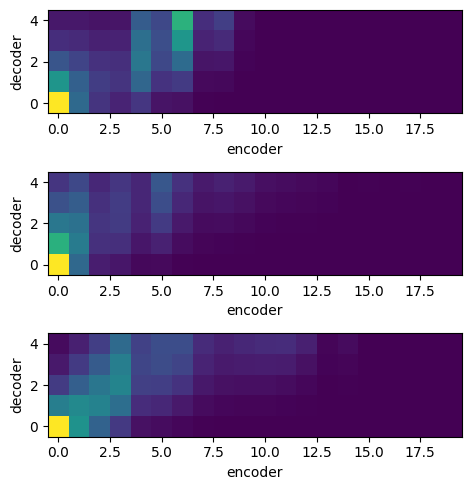

In [ ]:
# 표준적인 방법  ---> attention_mechanism.setup_memory
vocab_size = 6; SOS_token = 0; EOS_token = 5

x_data = np.array([[SOS_token, 3, 1, 4, 3, 2],[SOS_token, 3, 4, 2, 3, 1],[SOS_token, 1, 3, 2, 2, 1]], dtype=np.int32)
y_data = np.array([[3, 1, 4, 3, 2,EOS_token],[3, 4, 2, 3, 1,EOS_token],[1, 3, 2, 2, 1,EOS_token]],dtype=np.int32)
print("data shape(batch_size, decoder_length): ", x_data.shape)  # (3,6) = (batch_size, decoder_length)

batch_size = len(x_data)
hidden_dim =7

decoder_length = x_data.shape[1]
embedding_dim = 8

embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim,trainable=True)

# units = D_a
monotonic_attention_flag = True
if monotonic_attention_flag:
    attention_mechanism = tfa.seq2seq.BahdanauMonotonicAttention(units=11, memory=None, memory_sequence_length=None)
else:
    attention_mechanism = tfa.seq2seq.BahdanauAttention(units=11, memory=None, memory_sequence_length=None)

decoder_cell = tf.keras.layers.LSTMCell(hidden_dim,dropout=0.2)
decoder_cell = tfa.seq2seq.AttentionWrapper(decoder_cell, attention_mechanism,attention_layer_size=13,output_attention=True,alignment_history=True)
projection_layer = tf.keras.layers.Dense(vocab_size)

# decoder init state:
init_state = [tf.zeros((batch_size,hidden_dim)), tf.zeros((batch_size,hidden_dim))]

# Sampler
train_sampler = tfa.seq2seq.sampler.TrainingSampler()
test_sampler = tfa.seq2seq.GreedyEmbeddingSampler()

# Decoder
train_decoder = tfa.seq2seq.BasicDecoder(decoder_cell, train_sampler, output_layer=projection_layer)
test_decoder = tfa.seq2seq.BasicDecoder(decoder_cell, test_sampler, output_layer=projection_layer,maximum_iterations=5)

training = False
print(f'training: {training}')
n_iterations = 10
for i in range(n_iterations):
    # train step iteration
    encoder_outputs = tf.random.normal(shape=(batch_size, 20, 30))  # encoder length=20, encoder_dim= 30
    encoder_sequence_length = [10,20,15]  # batch에 대한, encoder의 길이. padding이 있을 수 있기 때문.

    attention_mechanism.setup_memory(memory=encoder_outputs, memory_sequence_length=encoder_sequence_length, memory_mask=None)
    attention_init_state = decoder_cell.get_initial_state(inputs = None, batch_size = batch_size, dtype=tf.float32)
    attention_init_state = attention_init_state.clone(cell_state=init_state )

    if training:
        decoder_input = embedding(x_data)
        outputs, last_state, last_sequence_lengths = train_decoder(decoder_input,initial_state=attention_init_state, sequence_length=[decoder_length]*batch_size,training=True) # training은 cell에 적용되는 dropout 때문에.

        logits = outputs.rnn_output
        loss = tfa.seq2seq.sequence_loss(logits,y_data,tf.ones_like(y_data,tf.float32)) #(logits,targets,weights)
        print(i, logits.shape, loss.numpy())  # logits(batch_size, decoder_length, vocab_size)

    else:
        if not embedding.built: # 꼭 필요한 부분
            embedding.build((vocab_size, embedding_dim))
        outputs, last_state, last_sequence_lengths = test_decoder(embedding.weights,initial_state=attention_init_state,
                                                    start_tokens=tf.fill([batch_size], SOS_token), end_token=EOS_token,training=False)
        predictions = tf.argmax(outputs.rnn_output,axis=-1) # outputs.sample_id와 동일
        break # inference mode에서는 n_iterations=1번만...
alignment_stack = last_state.alignment_history.stack().numpy()
print(f'outputs: {outputs.sample_id}')
print(f'seq length: {last_sequence_lengths}')
print("alignment_history(decoder_length, batch_size, encoder_length): ", alignment_stack.shape)  # (decoder_length, batch_size, encoder_length)

plt.figure(figsize=(15,5))
for i in range(batch_size):
    plt.subplot(3,1,i+1)
    plt.imshow(alignment_stack[:,i,:],interpolation='none',origin='lower') # 세로축(decoder step), 가로축(encoder step)
    plt.xlabel('encoder')
    plt.ylabel('decoder')
plt.tight_layout()
plt.show()

In [ ]:
predictions

<tf.Tensor: shape=(3, 4), dtype=int64, numpy=
array([[4, 3, 3, 5],
       [5, 5, 1, 1],
       [5, 3, 3, 3]])>

In [ ]:
for w in decoder_cell.trainable_weights:
    print(w.name, w.shape)

basic_decoder_20/decoder/attention_wrapper_10/attention_layer/kernel:0 (37, 13)
basic_decoder_20/decoder/attention_wrapper_10/lstm_cell_10/kernel:0 (21, 28)
basic_decoder_20/decoder/attention_wrapper_10/lstm_cell_10/recurrent_kernel:0 (7, 28)
basic_decoder_20/decoder/attention_wrapper_10/lstm_cell_10/bias:0 (28,)
basic_decoder_20/decoder/attention_wrapper_10/BahdanauMonotonicAttention/attention_v:0 (11,)
basic_decoder_20/decoder/attention_wrapper_10/BahdanauMonotonicAttention/attention_score_bias:0 ()
basic_decoder_20/decoder/attention_wrapper_10/BahdanauMonotonicAttention/kernel:0 (7, 11)
BahdanauMonotonicAttention/memory_layer/kernel:0 (30, 11)


inference - GreedyEmbeddingSampler

In [ ]:
sampler = tfa.seq2seq.GreedyEmbeddingSampler(embedding)
decoder = tfa.seq2seq.BasicDecoder(decoder_cell, sampler, projection_layer, maximum_iterations=15)

initial_state = decoder_cell.get_initial_state(batch_size=batch_size, dtype=tf.float32)
start_tokens = tf.fill([batch_size], SOS_token)  # [0,0,0] = [SOS_token,SOS_token,SOS_token]

output, state, lengths = decoder(None, start_tokens=start_tokens, end_token=EOS_token, initial_state=initial_state)

output.sample_id

<tf.Tensor: shape=(3, 15), dtype=int32, numpy=
array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3],
       [5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5]], dtype=int32)>

## 8.5.4 Attention Batch 처리

In [ ]:
import numpy as np

In [ ]:
N=2; T=5; Da = 5
processed_query = np.random.randn(N,Da) #  $\bar{h}_j W_q$
processed_memory = np.random.randn(N,T,Da) # $[h_0,h_1,\cdots,h_{T-1}] W_m$
va = np.random.randn(Da)

processed_query = np.expand_dims(processed_query,1) #(N,1,Da) -> (N,T,Da)~로~ broadcasting

score = np.tanh(processed_query + processed_memory).dot(va)  # (N,T)
print("score shape: ", score.shape)

(2, 5)


In [ ]:
N=2; T=5; De=20
alignment = np.random.randn(N,T)
encoder_hidden = np.random.randn(N,T,De)

alignment = np.expand_dims(alignment,1)

context = np.matmul(alignment,encoder_hidden) # (N,1,T)(N,T,De) --> (N,1,De)
context = context.squeeze(1) # (N,1,De) --> (N,De)
print(context.shape)

(2, 20)


# 8.6 날짜 형식 변환 모델 - Tensorflow

Date 생성

In [ ]:
! pip install faker

In [ ]:
from faker import Faker
from babel.dates import format_date
import datetime
import numpy as np

In [ ]:
formats = [ 'full','long','medium','short','MMMM d YYYY','MMMM d, YYYY','d MM YY','d MMM YYYY',
        'd MMM, YYYY','d MMMM YYYY','d MMMM, YYYY','dd MMM YYYY','dd, MMM YYYY','dd.MM.YY','dd.MM.YYYY',
        'YYYY.MM.dd','YYYY.M.d','YY.M.d','YY-M-d','YYYY-M-d', 'YYYY-MM-d', 'YYYY-M-dd', 'YYYY-MM-dd']
dt = datetime.date(2022,8,3)

for ff in formats:
    print(f"{ff:<15} \t-->\t {format_date(dt, format=ff,locale='en_US')}")  # 'en_US', 'ko_KR'

full            	-->	 Wednesday, August 3, 2022
long            	-->	 August 3, 2022
medium          	-->	 Aug 3, 2022
short           	-->	 8/3/22
MMMM d YYYY     	-->	 August 3 2022
MMMM d, YYYY    	-->	 August 3, 2022
d MM YY         	-->	 3 08 22
d MMM YYYY      	-->	 3 Aug 2022
d MMM, YYYY     	-->	 3 Aug, 2022
d MMMM YYYY     	-->	 3 August 2022
d MMMM, YYYY    	-->	 3 August, 2022
dd MMM YYYY     	-->	 03 Aug 2022
dd, MMM YYYY    	-->	 03, Aug 2022
dd.MM.YY        	-->	 03.08.22
dd.MM.YYYY      	-->	 03.08.2022
YYYY.MM.dd      	-->	 2022.08.03
YYYY.M.d        	-->	 2022.8.3
YY.M.d          	-->	 22.8.3
YY-M-d          	-->	 22-8-3
YYYY-M-d        	-->	 2022-8-3
YYYY-MM-d       	-->	 2022-08-3
YYYY-M-dd       	-->	 2022-8-03
YYYY-MM-dd      	-->	 2022-08-03


date.txt 파일 생성
 - generate()는 연도의 범위가 1970년 ~ 2022년
 - generate()는 연도의 범위가 1000년 ~ 2999년

In [ ]:
def generate(filename='date.txt',num_data=50000):
    formats = [ 'full','long','medium','short','MMMM d YYYY','MMMM d, YYYY','d MM YY','d MMM YYYY',
            'd MMM, YYYY','d MMMM YYYY','d MMMM, YYYY','dd MMM YYYY','dd, MMM YYYY','dd.MM.YY','dd.MM.YYYY',
            'YYYY.MM.dd','YYYY.M.d','YY.M.d','YY-M-d','YYYY-M-d', 'YYYY-MM-d', 'YYYY-M-dd', 'YYYY-MM-dd']
    fake = Faker()
    text_width = 29
    with open(filename, "w") as output:
        for i in range(num_data):
            dt = fake.date_object()
            ff = np.random.choice(formats)
            formatted  = format_date(dt, format=ff,locale='en_US')
            if len(formatted) <= text_width:
                data = f"{formatted:<{text_width}}_{dt}"
                output.write(data+'\n')



In [ ]:
generate('date.txt')

## 8.6.1 Hyper Parameter 정의

In [ ]:
! pip install hparams

In [ ]:
from hparams import HParams

In [ ]:
hp = HParams(
    data_filename='date.txt',
    vocab_filename = 'vocab.pickle',
    model_save_dir = './saved_model_tf',
    checkpoint_name = 'model_ckpt',
    MAX_LEN = 29,

    # train parameters
    batch_size = 32,
    num_epochs = 10,  # 누적 epochs
    learning_rate = 0.001,

    # model parameters
    embedding_dim=64,
    encoder_hidden_dim=64,
    decoder_hidden_dim=128,

    attention_dim = 64,
    attention_layer_size=64,
    drop_rate = 0.5,
    mask_rate = 0.2
)
assert hp['decoder_hidden_dim'] == 2*hp['encoder_hidden_dim']

## 8.6.2 날짜 데이터 로딩 & Dataset 생성

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import preprocessing
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

In [ ]:
GO_TOKEN = '<sos>'
END_TOKEN = '<eos>'
PAD = '<pad>'
UNK = '<unk>'

In [ ]:
def load_data(hp,filename=None,train_flag=True):
    # 입력 파일에서 data의 길이가 맞춰져 있다.

    if filename is None:
        filename = hp['data_filename']

    train_data = pd.read_csv(filename, header=None, delimiter='_' )
    if train_data.shape[1] == 1:
        inputs = train_data[0].tolist()
        inputs = [[c for c in ' '.join(x.lower().split())] for x in inputs]
        inputs_length = [len(x) for x in inputs]
    else:
        inputs, targets = train_data[0].tolist(), train_data[1].tolist()
        inputs = [[c for c in ' '.join(x.lower().split())] for x in inputs]
        inputs_length = [len(x) for x in inputs]
        targets = [[GO_TOKEN] + [c for c in x.lower().strip()] + [END_TOKEN] for x in targets]


    if train_flag:

        tokenizer = Tokenizer(lower=True, oov_token=UNK)  # 소문자로 안 바뀜(tensorflow 1.10에서만) 다른 버전에서는 잘됨.   Filter 기능이 포함되어 있다.
        tokenizer.fit_on_texts(inputs+targets) # 전체 character 분석

        inputs = tokenizer.texts_to_sequences(inputs)  # character를 숫자로 변환  ----> [[25, 13, 31, 26, 13, 24, 27, 13, 15, 6, 5, 10, 9, 6, 1, 4, 4, 17],[1, 2, 19, 14, 1, 19, 4, 2], ... ]
        targets = tokenizer.texts_to_sequences(targets)

        inputs = preprocessing.sequence.pad_sequences(inputs, maxlen=hp['MAX_LEN'], padding='post',truncating='post')

        word_to_index = tokenizer.word_index  # 0에는 아무것도 할당하지 않는다.
        word_to_index[PAD] = 0
        index_to_word = dict(map(reversed, word_to_index.items()))
        VOCAB_SIZE = len(word_to_index)
        INPUT_LENGTH = len(inputs[0])
        OUTPUT_LENGTH = len(targets[0])-1  # END_TOKEN 제외


        with open(hp['vocab_filename'], 'wb') as f:
            pickle.dump({'word_to_index': word_to_index, 'index_to_word': index_to_word, 'tokenizer': tokenizer}, f)

        return np.array(inputs,dtype=np.int32), np.array(inputs_length,dtype=np.int32), np.array(targets,dtype=np.int32), word_to_index, index_to_word,VOCAB_SIZE,INPUT_LENGTH,OUTPUT_LENGTH

    else:
        with open(hp['vocab_filename'],'rb') as f:
            data_loaded = pickle.load(f)
            word_to_index = data_loaded['word_to_index']
            index_to_word = data_loaded['index_to_word']
            tokenizer = data_loaded['tokenizer']

        inputs = tokenizer.texts_to_sequences(inputs)
        inputs = preprocessing.sequence.pad_sequences(inputs, maxlen=hp['MAX_LEN'], padding='post',truncating='post')
        VOCAB_SIZE = len(word_to_index)
        INPUT_LENGTH = len(inputs[0])
        return np.array(inputs,dtype=np.int32), np.array(inputs_length,dtype=np.int32), word_to_index, index_to_word, VOCAB_SIZE, INPUT_LENGTH

def load_vocab_file(filename):
    with open(filename,'rb') as f:
        data_loaded = pickle.load(f)
        word_to_index = data_loaded['word_to_index']
        index_to_word = data_loaded['index_to_word']

        VOCAB_SIZE = len(word_to_index)
        return word_to_index, index_to_word, VOCAB_SIZE

In [ ]:
# 데이터 생성후, train/test 데이터 분할
inputs,seq_lengths, targets, word_to_index, index_to_word, VOCAB_SIZE, INPUT_LENGTH, OUTPUT_LENGTH = load_data(hp)

train_input, test_input,train_seq_length, test_seq_length, train_target, test_target = train_test_split(inputs,seq_lengths, targets, test_size=0.1, random_state=1234)
print(f'train_input: {train_input.shape},test_input: {test_input.shape},train_seq_length: {train_seq_length.shape},\
test_seq_length {test_seq_length.shape},train_target: {train_target.shape},test_target: {test_target.shape}')
print(f'INPUT_LENGTH: {INPUT_LENGTH}, OUTPUT_LENGTH: {OUTPUT_LENGTH}')  # hp['MAX_LEN'] == INPUT_LENGTH
print(f'VOCAB_SIZE: {VOCAB_SIZE}')

train_input: (45000, 29),test_input: (5000, 29),train_seq_length: (45000,),test_seq_length (5000,),train_target: (45000, 12),test_target: (5000, 12)
INPUT_LENGTH: 29, OUTPUT_LENGTH: 11
VOCAB_SIZE: 41


In [ ]:
len(word_to_index), word_to_index

In [ ]:
batch_size = hp['batch_size']
train_dataset = tf.data.Dataset.from_tensor_slices(((train_input,train_seq_length), train_target))  # 여기의 argument가 mapping_fn의 argument가 된다.
train_dataset = train_dataset.shuffle(buffer_size=5000)
train_dataset = train_dataset.batch(batch_size,drop_remainder=True)

batch_size_val = len(test_input)
valid_dataset = tf.data.Dataset.from_tensor_slices(((test_input,test_seq_length), test_target))
valid_dataset = valid_dataset.batch(batch_size_val) # 전체 데이터를 batch 하나로...

In [ ]:
for (x,seq_length),y in valid_dataset.take(2):
    print(x.shape,seq_length.shape,y.shape)
    print('=='*10)

(5000, 29) (5000,) (5000, 12)


## 8.6.3 Encoder-Decoder Model & Attention

In [ ]:
!pip install tensorflow_addons

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import time

from pkg_resources import parse_version

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self,vocab_size,embedding_dim,hidden_dim,mask_rate=0.2):
        super(Encoder, self).__init__()
        self.mask_rate = mask_rate

        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pre_dense = tf.keras.layers.Dense(hidden_dim,activation='relu')
        self.forward_layer = tf.keras.layers.GRU(hidden_dim, return_sequences=True,return_state=True)
        self.rnn = tf.keras.layers.Bidirectional(layer=self.forward_layer)
        self.dense = tf.keras.layers.Dense(hidden_dim)

    def call(self,x,seq_length,training=False):
        T = tf.shape(x)[1] # input sequence length

        if training:
            input_mask = tf.cast(tf.random.uniform(x.shape,maxval=1,dtype=tf.float32) > self.mask_rate,tf.int32)
            x = x * input_mask
        x = self.embedding(x)
        x = self.pre_dense(x)

        seq_mask = tf.sequence_mask(seq_length, T)
        encoder_outputs, forward_hidden, backward_hidden = self.rnn(x,mask=seq_mask)
        encoder_outputs = self.dense(encoder_outputs)

        return encoder_outputs, tf.concat([forward_hidden, backward_hidden],-1)

class Decoder(tf.keras.Model):
    def __init__(self,vocab_size,embedding_dim,hidden_dim,attention_dim,attention_layer_size,drop_rate,sos_token,eos_token):
        super(Decoder, self).__init__()

        self.sos_token = sos_token
        self.eos_token = eos_token
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim

        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.dropout = tf.keras.layers.Dropout(drop_rate)

        self.decoder_cell = tf.keras.layers.GRUCell(hidden_dim)

        self.attention_mechanism = tfa.seq2seq.BahdanauAttention(units=attention_dim, memory=None, memory_sequence_length=None,normalize=True)
        self.attention_cell = tfa.seq2seq.AttentionWrapper(self.decoder_cell, self.attention_mechanism,attention_layer_size=attention_layer_size,output_attention=True,alignment_history=True)

        self.projection_layer = tf.keras.layers.Dense(vocab_size)


        train_sampler = tfa.seq2seq.sampler.TrainingSampler()
        test_sampler = tfa.seq2seq.GreedyEmbeddingSampler()

        self.train_decoder = tfa.seq2seq.BasicDecoder(self.attention_cell, train_sampler, output_layer=self.projection_layer)
        self.test_decoder = tfa.seq2seq.BasicDecoder(self.attention_cell, test_sampler, output_layer=self.projection_layer,maximum_iterations=100)

    def call(self,encoder_outputs, encoder_states,encoder_sequence_length,decoder_inputs=None,decoder_sequence_length=None,training=False):
        # decoder_inputs: ~추론에서는 들어오지 않는다.~
        batch_size = tf.shape(encoder_outputs)[0]

        self.attention_mechanism.setup_memory(memory=encoder_outputs, memory_sequence_length=encoder_sequence_length,memory_mask=None)

        init_state = self.attention_cell.get_initial_state(batch_size = batch_size, dtype=tf.float32)
        init_state = init_state.clone(cell_state=encoder_states)

        if training:
            y = self.embedding(decoder_inputs)
            y = self.dropout(y)
            outputs, last_state, last_sequence_lengths = self.train_decoder(y,initial_state=init_state,sequence_length=decoder_sequence_length,training=True)
        else:
            if not self.embedding.built: # 꼭 필요한 부분
                self.embedding.build((self.vocab_size, self.embedding_dim))

            outputs, last_state, last_sequence_lengths = self.test_decoder(self.embedding.weights,initial_state=init_state,
                                                        start_tokens=tf.tile([self.sos_token], [batch_size]), end_token=self.eos_token,training=False)

        return outputs, last_state, last_sequence_lengths


In [ ]:
class EncoderPlain(tf.keras.Model):
    def __init__(self,vocab_size,embedding_dim,hidden_dim,drop_rate=0.4):
        super(EncoderPlain, self).__init__()

        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pre_dense = tf.keras.layers.Dense(hidden_dim,activation='relu')
        self.dropout = tf.keras.layers.Dropout(drop_rate)
        self.forward_layer = tf.keras.layers.GRU(hidden_dim, return_sequences=True,return_state=True)
        self.rnn = tf.keras.layers.Bidirectional(layer=self.forward_layer)
        self.dense = tf.keras.layers.Dense(hidden_dim)

    def call(self,x,seq_length,training=False):
        T = tf.shape(x)[1]
        mask = tf.sequence_mask(seq_length, T)
        x = self.embedding(x)
        x = self.pre_dense(x)
        x = self.dropout(x,training)

        encoder_outputs, forward_hidden, backward_hidden = self.rnn(x,mask=mask)

        encoder_outputs = self.dense(encoder_outputs)

        return encoder_outputs, tf.concat([forward_hidden, backward_hidden],-1)

In [ ]:
# model 선언 & restoration
plain_encoder_flag = False
if plain_encoder_flag:
    encoder = EncoderPlain(VOCAB_SIZE,hp['embedding_dim'],hp['encoder_hidden_dim'],hp['drop_rate'])
else:
    encoder = Encoder(VOCAB_SIZE,hp['embedding_dim'],hp['encoder_hidden_dim'],hp['mask_rate'])
decoder = Decoder(VOCAB_SIZE,hp['embedding_dim'],hp['decoder_hidden_dim'],hp['attention_dim'],hp['attention_layer_size'],hp['drop_rate'],word_to_index[GO_TOKEN], word_to_index[END_TOKEN])

if parse_version(tf.__version__) >= parse_version('2.13'):
    optimizer = tf.keras.optimizers.legacy.Adam(hp['learning_rate'])
else:
    optimizer = tf.keras.optimizers.Adam(hp['learning_rate'])


train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

epoch_trained = tf.Variable(0)
ckpt = tf.train.Checkpoint(model=[encoder,decoder],optimizer = optimizer, epochs = epoch_trained)
ckpt_manager = tf.train.CheckpointManager(ckpt,hp['model_save_dir'],checkpoint_name=hp['checkpoint_name'] ,max_to_keep=2)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    # model이 build되지 않았지만, build되면  restore된다.  ---> Delayed restorations
    ckpt.restore(ckpt_manager.latest_checkpoint)
    start_epoch = ckpt.epochs.numpy()

    print ('Latest checkpoint restored!! {},  epochs = {}'.format(ckpt_manager.latest_checkpoint, start_epoch))
else:
    start_epoch = 0
    print("Initializing from scratch.")


Latest checkpoint restored!! ./saved_model_tf/model_ckpt-10,  epochs = 10


In [ ]:
# 간단한 테스트
train_flag = True  # True 또는 False로 설정해서 테스트
if train_flag:
    dataset = train_dataset
else:
    dataset = valid_dataset

for (x,seq_length), y in dataset.take(2):  # train_dataset, valid_dataset
    decoder_inputs = y[:, :-1]
    targets = y[:, 1:]

    batch_size_ = tf.shape(y)[0]
    tar_length_ = tf.tile([OUTPUT_LENGTH],[batch_size_])

    encoder_outputs, hidden_state = encoder(x,seq_length,train_flag)
    outputs,last_state, last_sequence_lengths = decoder(encoder_outputs,hidden_state, seq_length,decoder_inputs=decoder_inputs,training=train_flag)

    if train_flag:
        loss = tfa.seq2seq.sequence_loss(outputs.rnn_output,targets,tf.ones_like(targets,tf.float32))
        print(f'loss: {loss.numpy()}')

        predictions = tf.argmax(outputs.rnn_output,axis=-1,output_type=tf.int32)
        compared = tf.equal(targets,predictions)   #비교하려면, tf.int32로 변환되어야 한다. tf.int64는 안된다.

        char_accuracy = tf.reduce_mean(tf.cast(compared,tf.float32))
        seq_accuracy = tf.reduce_mean(tf.cast(tf.reduce_all(compared,axis=-1),tf.float32))


In [ ]:
outputs.rnn_output.shape,targets.shape

(TensorShape([32, 11, 41]), TensorShape([32, 11]))

In [ ]:
encoder_outputs.shape, hidden_state.shape, outputs.rnn_output.shape, targets.shape

(TensorShape([32, 29, 64]),
 TensorShape([32, 128]),
 TensorShape([32, 11, 41]),
 TensorShape([32, 11]))

In [ ]:
encoder_outputs.dtype, hidden_state.dtype, outputs.rnn_output.dtype, targets.dtype

(tf.float32, tf.float32, tf.float32, tf.int32)

In [ ]:
char_accuracy,seq_accuracy

(<tf.Tensor: shape=(), dtype=float32, numpy=0.011363637>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>)

## 8.6.4 모델 훈련

In [ ]:
INPUT_MAX_LENGTH = hp['MAX_LEN']
batch_size = hp['batch_size']
tar_length = tf.convert_to_tensor([OUTPUT_LENGTH]*batch_size,dtype=tf.int32)

train_step_signature = [tf.TensorSpec(shape=(batch_size, INPUT_MAX_LENGTH), dtype=tf.int32),
                        tf.TensorSpec(shape=(batch_size), dtype=tf.int32),
                        tf.TensorSpec(shape=(batch_size, OUTPUT_LENGTH+1), dtype=tf.int32)]
@tf.function(input_signature=train_step_signature)
def train_step(x,seq_length,y):
    decoder_inputs = y[:, :-1]
    decoder_outputs = y[:, 1:]

    with tf.GradientTape() as tape:
        encoder_outputs, hidden_state = encoder(x,seq_length,training=True)
        outputs,_,_ = decoder(encoder_outputs,hidden_state,seq_length,decoder_inputs,tar_length,training=True)

        loss  = tfa.seq2seq.sequence_loss(outputs.rnn_output,decoder_outputs,tf.ones_like(decoder_outputs,tf.float32))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

    train_loss(loss)
    train_accuracy(decoder_outputs, outputs.rnn_output)


validation_step_signature = [tf.TensorSpec(shape=(batch_size_val, INPUT_MAX_LENGTH), dtype=tf.int32),
                        tf.TensorSpec(shape=(batch_size_val), dtype=tf.int32),
                        tf.TensorSpec(shape=(batch_size_val, OUTPUT_LENGTH+1), dtype=tf.int32)]
@tf.function(input_signature=validation_step_signature)
def validation_step(x,seq_length,y):
    decoder_inputs = y[:, :-1]
    decoder_outputs = y[:, 1:]

    encoder_outputs, hidden_state = encoder(x,seq_length,training=False)
    outputs,_,_ = decoder(encoder_outputs,hidden_state,seq_length,decoder_inputs=decoder_inputs,training=False)

    # 모델이 true_label보다 더 긴 길이로 예측된다면?
    T = tf.shape(decoder_outputs)[1]
    predictions = tf.argmax(outputs.rnn_output,axis=-1,output_type=tf.int32)[:,:T] # tf.int32로 변환되어야 한다. tf.int64는 안된다.
    compared = tf.equal(decoder_outputs, predictions)

    char_accuracy = tf.reduce_mean(tf.cast(compared,tf.float32))
    seq_accuracy = tf.reduce_mean(tf.cast(tf.reduce_all(compared,axis=-1),tf.float32))

    return char_accuracy, seq_accuracy

### 1. Encoder 훈련

In [ ]:
########## train loop ##############
print(f"plain_encoder_flag: {plain_encoder_flag}")
num_epochs = hp['num_epochs']
step_count = 0

print(tf.config.list_physical_devices('GPU'))
print(f'epochs: {num_epochs}')

s_time = time.time()

for epoch in range(start_epoch+1, num_epochs+1):
    for i, ((x,seq_length), y) in enumerate(train_dataset):
        step_count += 1

        train_step(x,seq_length,y)

        if step_count % 1000==0:
            print(f'epoch: {epoch:>2}/{num_epochs}, step: {step_count:>5}, loss: {train_loss.result():3.4f}, char_accuracy: {train_accuracy.result():3.4f}, elapsed: {int(time.time()-s_time):>4}')


    print(f'epoch: {epoch:>2}/{num_epochs}, step: {step_count:>5}, loss: {train_loss.result():3.4f}, char_accuracy: {train_accuracy.result():3.4f}, elapsed: {int(time.time()-s_time):>4}', end='\t')

    # epoch마다 loss, accuracy reset.
    train_loss.reset_state()
    train_accuracy.reset_state()

    if epoch % 1== 0:
        for _, ((x,seq_length), y) in enumerate(valid_dataset):
            char_accuracy, seq_accuracy = validation_step(x,seq_length,y)
            print(f'validation --- char_accuracy: {char_accuracy:10.4f}, seq_accuracy: {seq_accuracy:10.4f}')

    if (epoch)%5==0:
        epoch_trained.assign(epoch)
        ckpt_save_path = ckpt_manager.save(checkpoint_number = epoch)
        print (f'Saving checkpoint for epoch {epoch} at {ckpt_save_path}')

vanilla_encoder_flag: False
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
epochs: 10
epoch:  1/10, step:  1000, loss: 0.6056, char_accuracy: 0.7897, elapsed:   90
epoch:  1/10, step:  1406, loss: 0.4875, char_accuracy: 0.8290, elapsed:  111	validation --- char_accuracy:     0.9968, seq_accuracy:     0.9790
epoch:  2/10, step:  2000, loss: 0.1789, char_accuracy: 0.9296, elapsed:  143
epoch:  2/10, step:  2812, loss: 0.1733, char_accuracy: 0.9311, elapsed:  177	validation --- char_accuracy:     0.9985, seq_accuracy:     0.9896
epoch:  3/10, step:  3000, loss: 0.1621, char_accuracy: 0.9339, elapsed:  185
epoch:  3/10, step:  4000, loss: 0.1599, char_accuracy: 0.9343, elapsed:  228
epoch:  3/10, step:  4218, loss: 0.1598, char_accuracy: 0.9343, elapsed:  238	validation --- char_accuracy:     0.9983, seq_accuracy:     0.9894
epoch:  4/10, step:  5000, loss: 0.1570, char_accuracy: 0.9350, elapsed:  276
epoch:  4/10, step:  5624, loss: 0.1568, char_accuracy: 0.9348, elaps

### 2. EncoderPlain 훈련

In [ ]:
########## train loop ##############
print(f"plain_encoder_flag: {plain_encoder_flag}")
num_epochs = hp['num_epochs']
step_count = 0

print(tf.config.list_physical_devices('GPU'))
print(f'epochs: {num_epochs}')

s_time = time.time()

for epoch in range(start_epoch+1, num_epochs+1):
    for i, ((x,seq_length), y) in enumerate(train_dataset):
        step_count += 1

        train_step(x,seq_length,y)

        if step_count % 1000==0:
            print(f'epoch: {epoch:>2}/{num_epochs}, step: {step_count:>5}, loss: {train_loss.result():3.4f}, char_accuracy: {train_accuracy.result():3.4f}, elapsed: {int(time.time()-s_time):>4}')

    print(f'epoch: {epoch:>2}/{num_epochs}, step: {step_count:>5}, loss: {train_loss.result():3.4f}, char_accuracy: {train_accuracy.result():3.4f}, elapsed: {int(time.time()-s_time):>4}', end='\t')

    # epoch마다 loss, accuracy reset.
    train_loss.reset_state()
    train_accuracy.reset_state()

    if epoch % 1 == 0:
        for _, ((x,seq_length), y) in enumerate(valid_dataset):
            char_accuracy, seq_accuracy = validation_step(x,seq_length,y)
            print(f'validation --- char_accuracy: {char_accuracy:10.4f}, seq_accuracy: {seq_accuracy:10.4f}')

    if epoch %5 == 0:
        epoch_trained.assign(epoch)
        ckpt_save_path = ckpt_manager.save(checkpoint_number = epoch)
        print (f'Saving checkpoint for epoch {epoch} at {ckpt_save_path}')

vanilla_encoder_flag: True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
epochs: 10
epoch:  1/10, step:  1000, loss: 0.4647, char_accuracy: 0.8408, elapsed:   98
epoch:  1/10, step:  1406, loss: 0.3369, char_accuracy: 0.8852, elapsed:  115	validation --- char_accuracy:     0.9978, seq_accuracy:     0.9856
epoch:  2/10, step:  2000, loss: 0.0144, char_accuracy: 0.9967, elapsed:  148
epoch:  2/10, step:  2812, loss: 0.0118, char_accuracy: 0.9974, elapsed:  183	validation --- char_accuracy:     0.9985, seq_accuracy:     0.9898
epoch:  3/10, step:  3000, loss: 0.0090, char_accuracy: 0.9979, elapsed:  192
epoch:  3/10, step:  4000, loss: 0.0079, char_accuracy: 0.9984, elapsed:  237
epoch:  3/10, step:  4218, loss: 0.0081, char_accuracy: 0.9983, elapsed:  247	validation --- char_accuracy:     0.9987, seq_accuracy:     0.9908
epoch:  4/10, step:  5000, loss: 0.0075, char_accuracy: 0.9984, elapsed:  282
epoch:  4/10, step:  5624, loss: 0.0071, char_accuracy: 0.9985, elapse

## 8.6.5 모델 테스트
 - 저장된 모델을 불러와 추론하기

In [ ]:
import matplotlib.pyplot as plt
import pickle

In [ ]:
def plot_attention_weights_all(index_to_word,attentions, sentences, results):
    fig = plt.figure(figsize=(16, 22))

    batch_size = len(attentions)
    cols = 3
    rows = batch_size//cols +1
    for id in range(batch_size):

        attention = attentions[id]  # batch중에서 id에 해당하는 것 (N,decoder_length, encoder_length) ---> 추출
        sentence = sentences[id]
        result = results[id]

        ax = fig.add_subplot(rows, cols, id+1)

        # plot the attention weights
        ax.matshow(attention, cmap='coolwarm')  # coolwarm, viridis

        fontdict = {'fontsize': 12}
        sentence = [index_to_word[i] for i in sentence]
        sentence = [a if a!='<pad>' else ' ' for a in sentence][:attention.shape[1]] # 최대 길이 제한

        ax.set_xticks(range(len(sentence)))
        ax.set_yticks(range(len(result)))

        ax.set_ylim(len(result)-1.5, -0.5)  # 결과의 마지막 <eos>가 보이지 않게 만든다.

        ax.set_xticklabels(sentence, fontdict=fontdict, rotation=0)
        ax.set_yticklabels([index_to_word[i] for i in result], fontdict=fontdict)

        ax.grid(color='white', linestyle='-', linewidth=0.3, )

        ax.set_xlabel('data {}'.format(id+1))
        ax.set_aspect(1.1)

    fig.tight_layout()
    fig.subplots_adjust(wspace=0.1)
    plt.savefig('alignment.png')
    plt.show()

def plot_attention_weights(index_to_word,attention, sentence, result,id=0):
    fig = plt.figure(figsize=(16, 8))

    attention = attention[id]  # batch중에서 id에 해당하는 것 (N,decoder_length, encoder_length) ---> 추출
    sentence = sentence[id]
    result = result[id]

    ax = fig.add_subplot(1, 1, 1)

    # plot the attention weights
    ax.matshow(attention, cmap='coolwarm')

    fontdict = {'fontsize': 20}
    sentence = [index_to_word[i] for i in sentence]
    sentence = [a if a!='<pad>' else ' ' for a in sentence][:attention.shape[1]] # 최대 길이 제한

    ax.set_xticks(range(len(sentence)))
    ax.set_yticks(range(len(result)))

    ax.set_ylim(len(result)-1.5, -0.5)  # 결과의 마지막 <eos>가 보이지 않게 만든다.

    ax.set_xticklabels(sentence, fontdict=fontdict, rotation=0)  # rotation=90 ---> 반시계방향 회전
    ax.set_yticklabels([index_to_word[i] for i in result], fontdict=fontdict)

    ax.grid(color='white', linestyle='-', linewidth=0.3, )

    plt.tight_layout()
    plt.savefig('alignment-single.png')
    plt.show()

- vocab.pickle 파일 필요
- hp['model_save_dir'] 디렉토리에 모델이 저장되어 있어야 한다.

In [ ]:
try:
    VOCAB_SIZE
except:
    word_to_index, index_to_word, VOCAB_SIZE = load_vocab_file(hp['vocab_filename'])

In [ ]:
# model 선언 & restoration
plain_encoder_flag = False
if plain_encoder_flag:
    encoder = EncoderPlain(VOCAB_SIZE,hp['embedding_dim'],hp['encoder_hidden_dim'],hp['drop_rate'])
else:
    encoder = Encoder(VOCAB_SIZE,hp['embedding_dim'],hp['encoder_hidden_dim'],hp['mask_rate'])
decoder = Decoder(VOCAB_SIZE,hp['embedding_dim'],hp['decoder_hidden_dim'],hp['attention_dim'],hp['attention_layer_size'],hp['drop_rate'],word_to_index[GO_TOKEN], word_to_index[END_TOKEN])

ckpt = tf.train.Checkpoint(model=[encoder,decoder])
ckpt_manager = tf.train.CheckpointManager(ckpt,hp['model_save_dir'],checkpoint_name=hp['checkpoint_name'] ,max_to_keep=2)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    # model이 build되지 않았지만, build되면  restore된다.  ---> Delayed restorations
    ckpt.restore(ckpt_manager.latest_checkpoint).expect_partial()

    print ('checkpoint restored!! {}.'.format(ckpt_manager.latest_checkpoint))
else:
    print(f"Model not found at {hp['model_save_dir']}")

Latest checkpoint restored!! ./saved_model_tf/model_ckpt-10.


In [ ]:
def evaluate(inp,inp_length):
    encoder_outputs, hidden_state = encoder(inp,inp_length,training=False)
    outputs, last_state, last_sequence_lengths = decoder(encoder_outputs,hidden_state,inp_length,training=False)
    predictions = tf.argmax(outputs.rnn_output,axis=-1)  # outputs.sample_id
    attention_weights= last_state.alignment_history.stack().numpy()

    return predictions.numpy(), attention_weights.transpose([1,0,2])  #(decoder_length,N,decoder_length) --> (N,decoder_length,decoder_length)

In [ ]:
inputs, seq_lengths, word_to_index, index_to_word, VOCAB_SIZE, INPUT_LENGTH = load_data(hp,'test_data.txt',train_flag=False)

print(word_to_index)
print(f'test_input: {inputs.shape}')
print(f'INPUT_LENGTH : {INPUT_LENGTH}')

raw_data = []
pad_token = word_to_index[PAD]

print('='*10,)
for i,d in enumerate(inputs):
    raw_data.append(''.join([index_to_word[x] for x in d if x != pad_token]))
    print(i+1, raw_data[-1])

print('='*10,'\n\n')
test_dataset = tf.data.Dataset.from_tensor_slices((inputs,seq_lengths))
test_dataset = test_dataset.batch(len(inputs),drop_remainder=False)

{'<unk>': 1, '1': 2, '0': 3, '2': 4, '-': 5, '9': 6, ' ': 7, '<sos>': 8, '<eos>': 9, '8': 10, '7': 11, '3': 12, '.': 13, '5': 14, '4': 15, '6': 16, ',': 17, 'e': 18, 'a': 19, 'r': 20, 'u': 21, 'm': 22, 'y': 23, 'n': 24, 'b': 25, 'j': 26, 'o': 27, 't': 28, 'c': 29, 's': 30, 'd': 31, '/': 32, 'p': 33, 'l': 34, 'f': 35, 'g': 36, 'v': 37, 'h': 38, 'i': 39, 'w': 40, '<pad>': 0}
test_input: (21, 29)
INPUT_LENGTH : 29
1 january 01 , 1996
2 february 27, 1994
3 ebruary 27, 1994
4 3/10/93
5 march 11, 1986
6 april 3, 1996
7 may 18, 1980
8 jun 17, 2013
9 july 27, 2000
10 august 27, 1988
11 auust 19, 2003
12 ugust 19, 2013
13 september 27, 1994
14 setember 27, 2020
15 eptember 27, 2022
16 tuesday, september 25, 1984
17 october 24, 1974
18 10/31/90
19 10/5/15
20 november 03, 2194
21 december 5, 1971




### 1. Encoder 모델 테스트

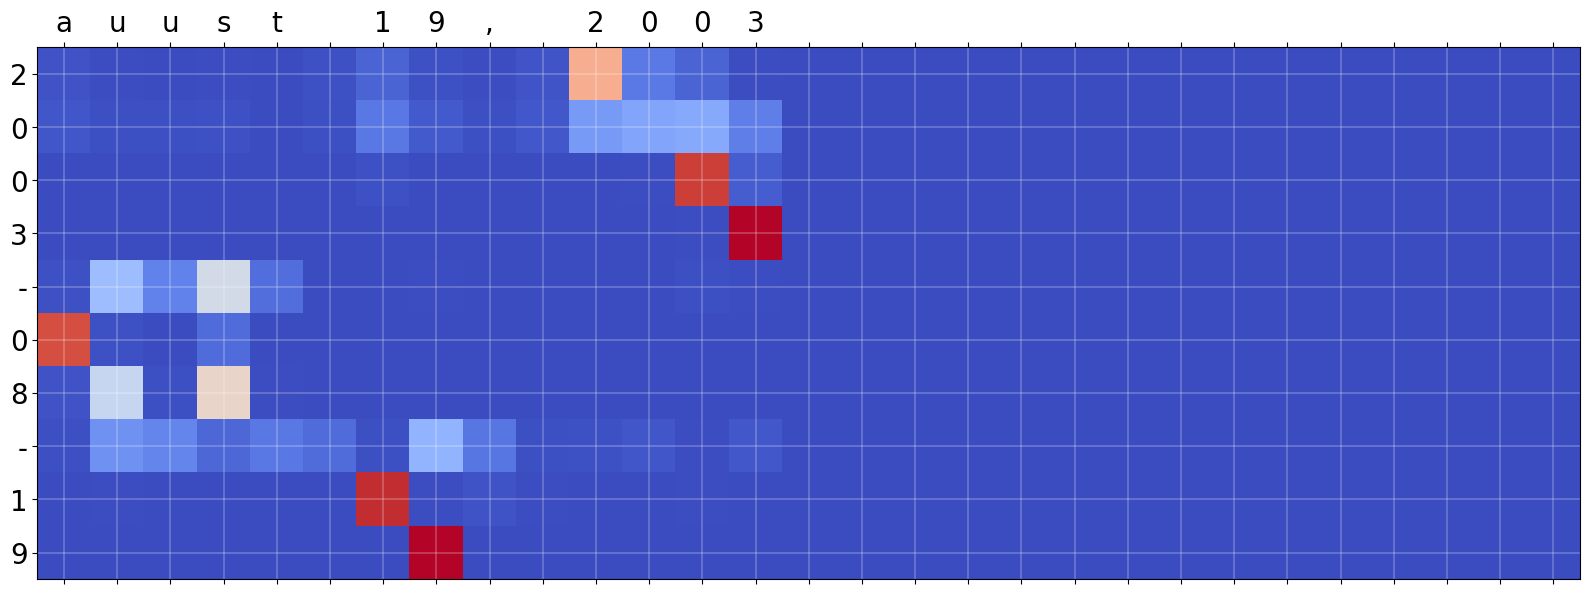

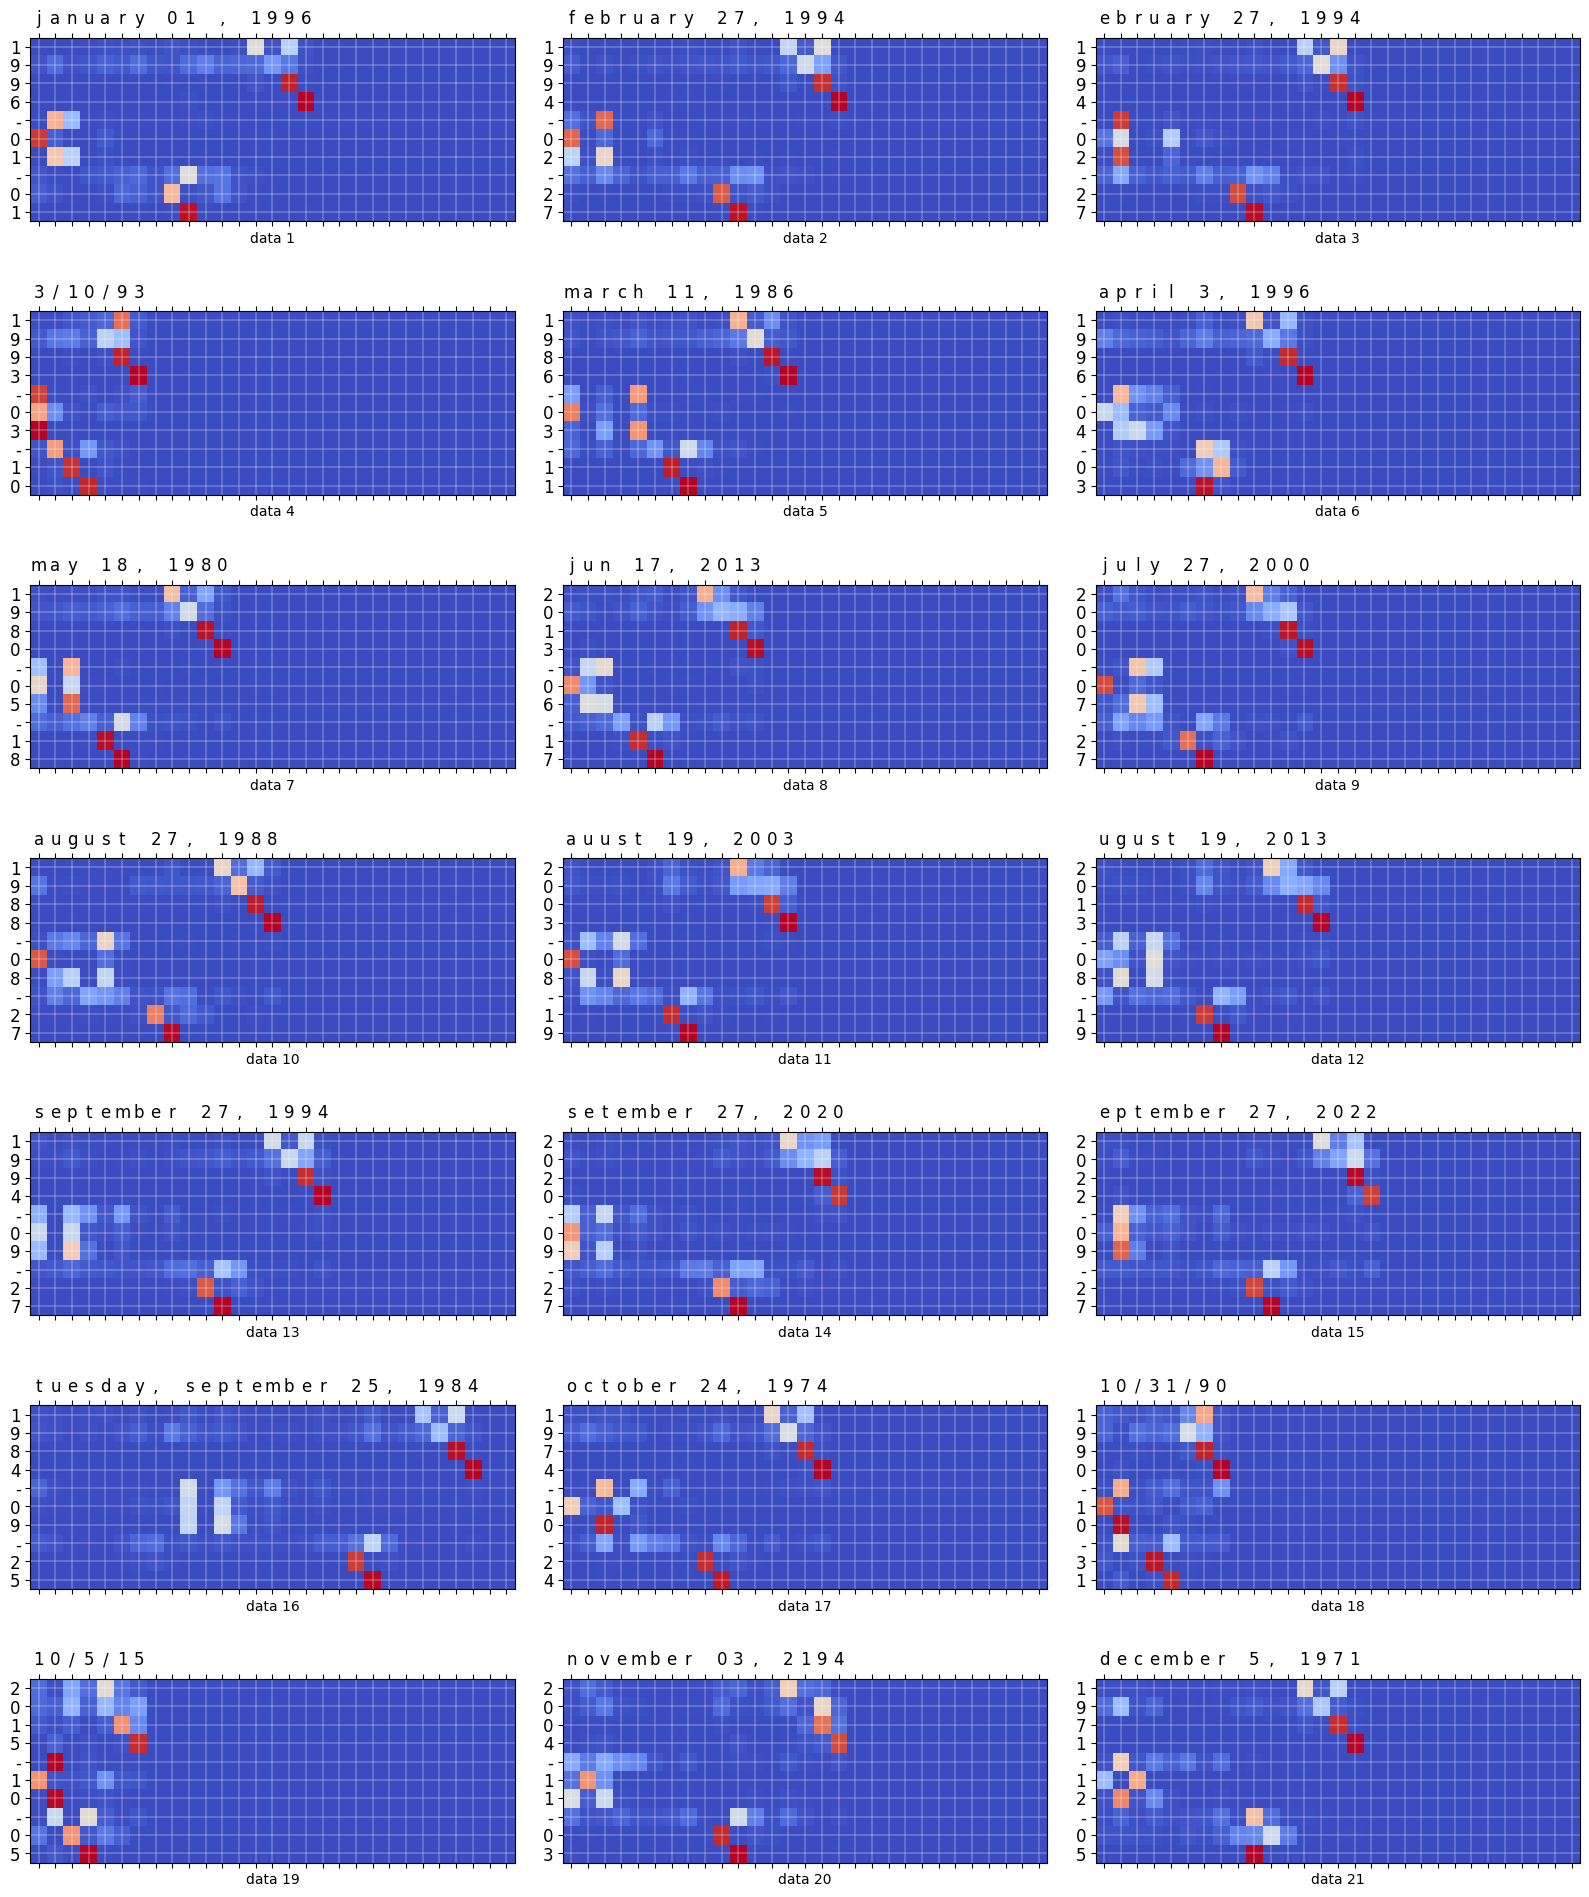

january 01 , 1996              ==> 1996-01-01
february 27, 1994              ==> 1994-02-27
ebruary 27, 1994               ==> 1994-02-27
3/10/93                        ==> 1993-03-10
march 11, 1986                 ==> 1986-03-11
april 3, 1996                  ==> 1996-04-03
may 18, 1980                   ==> 1980-05-18
jun 17, 2013                   ==> 2013-06-17
july 27, 2000                  ==> 2000-07-27
august 27, 1988                ==> 1988-08-27
auust 19, 2003                 ==> 2003-08-19
ugust 19, 2013                 ==> 2013-08-19
september 27, 1994             ==> 1994-09-27
setember 27, 2020              ==> 2020-09-27
eptember 27, 2022              ==> 2022-09-27
tuesday, september 25, 1984    ==> 1984-09-25
october 24, 1974               ==> 1974-10-24
10/31/90                       ==> 1990-10-31
10/5/15                        ==> 2015-10-05
november 03, 2194              ==> 2004-11-03
december 5, 1971               ==> 1971-12-05


In [ ]:
result_tokens = []
result_all = []

for _, (inp,inp_length) in enumerate(test_dataset):
    predictions, attention_weights = evaluate(inp,inp_length)

    for p in predictions:
        result_tokens.append(p.tolist())
        output = ''.join([index_to_word[x] for x in p if index_to_word[x] != END_TOKEN])
        result_all.append(output)

    # id: batch data중에서 몇번째를 그릴 것인가?
    plot_attention_weights(index_to_word,attention_weights, inp.numpy(), result_tokens,id=10)
    plot_attention_weights_all(index_to_word,attention_weights, inp.numpy(), result_tokens)

for x,y in zip(raw_data,result_all):
    print('{:<30} ==> {}'.format(x,y))

### 2. EncoderPlain 모델 테스트

In [ ]:
# model 선언 & restoration
plain_encoder_flag = True
if plain_encoder_flag:
    encoder = EncoderPlain(VOCAB_SIZE,hp['embedding_dim'],hp['encoder_hidden_dim'],hp['drop_rate'])
else:
    encoder = Encoder(VOCAB_SIZE,hp['embedding_dim'],hp['encoder_hidden_dim'],hp['mask_rate'])
decoder = Decoder(VOCAB_SIZE,hp['embedding_dim'],hp['decoder_hidden_dim'],hp['attention_dim'],hp['attention_layer_size'],hp['drop_rate'],word_to_index[GO_TOKEN], word_to_index[END_TOKEN])

ckpt = tf.train.Checkpoint(model=[encoder,decoder])
ckpt_manager = tf.train.CheckpointManager(ckpt,hp['model_save_dir'],checkpoint_name=hp['checkpoint_name'] ,max_to_keep=2)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    # model이 build되지 않았지만, build되면  restore된다.  ---> Delayed restorations
    ckpt.restore(ckpt_manager.latest_checkpoint).expect_partial()

    print ('checkpoint restored!! {}.'.format(ckpt_manager.latest_checkpoint))
else:
    print(f"No Model Found at {hp['model_save_dir']}")

checkpoint restored!! ./saved_model_tf/model_ckpt-10.


In [ ]:
def evaluate(inp,inp_length):
    encoder_outputs, hidden_state = encoder(inp,inp_length,training=False)
    outputs, last_state, last_sequence_lengths = decoder(encoder_outputs,hidden_state,inp_length,training=False)
    predictions = tf.argmax(outputs.rnn_output,axis=-1)  # outputs.sample_id
    attention_weights= last_state.alignment_history.stack().numpy()

    return predictions.numpy(), attention_weights.transpose([1,0,2])  #(decoder_length,N,decoder_length) --> (N,decoder_length,decoder_length)

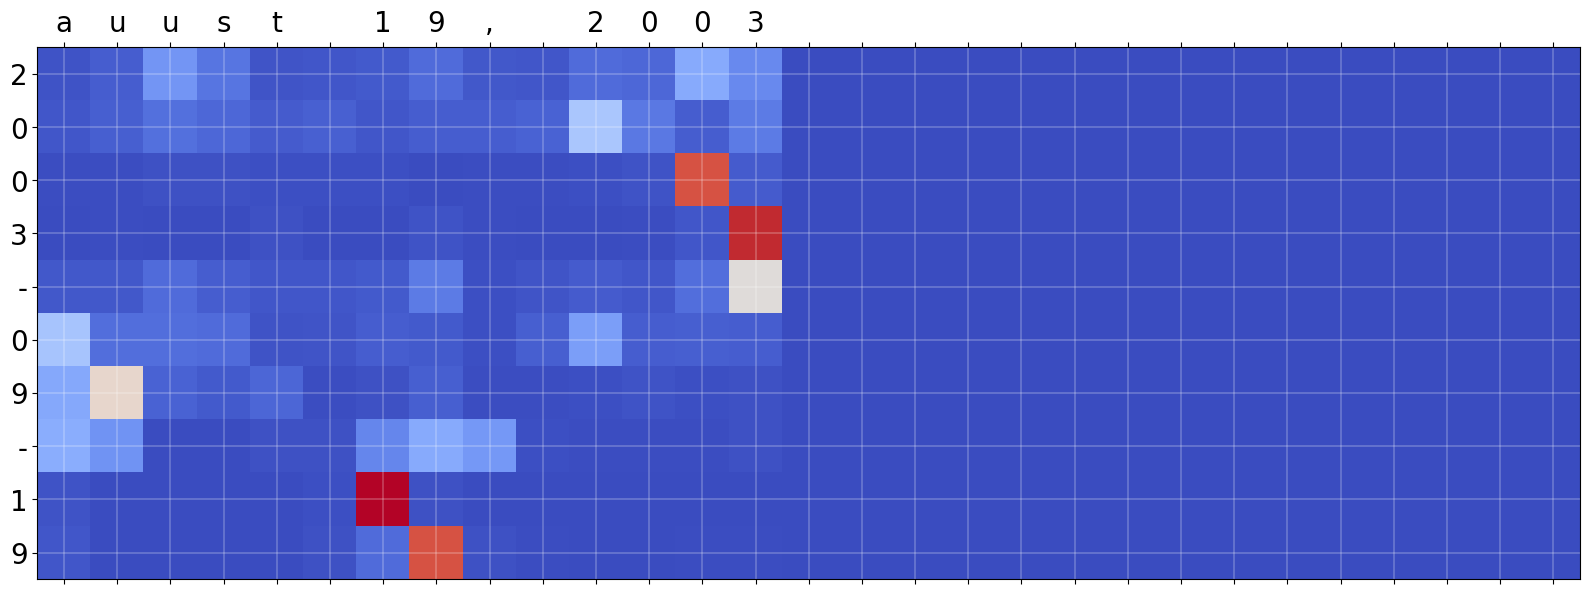

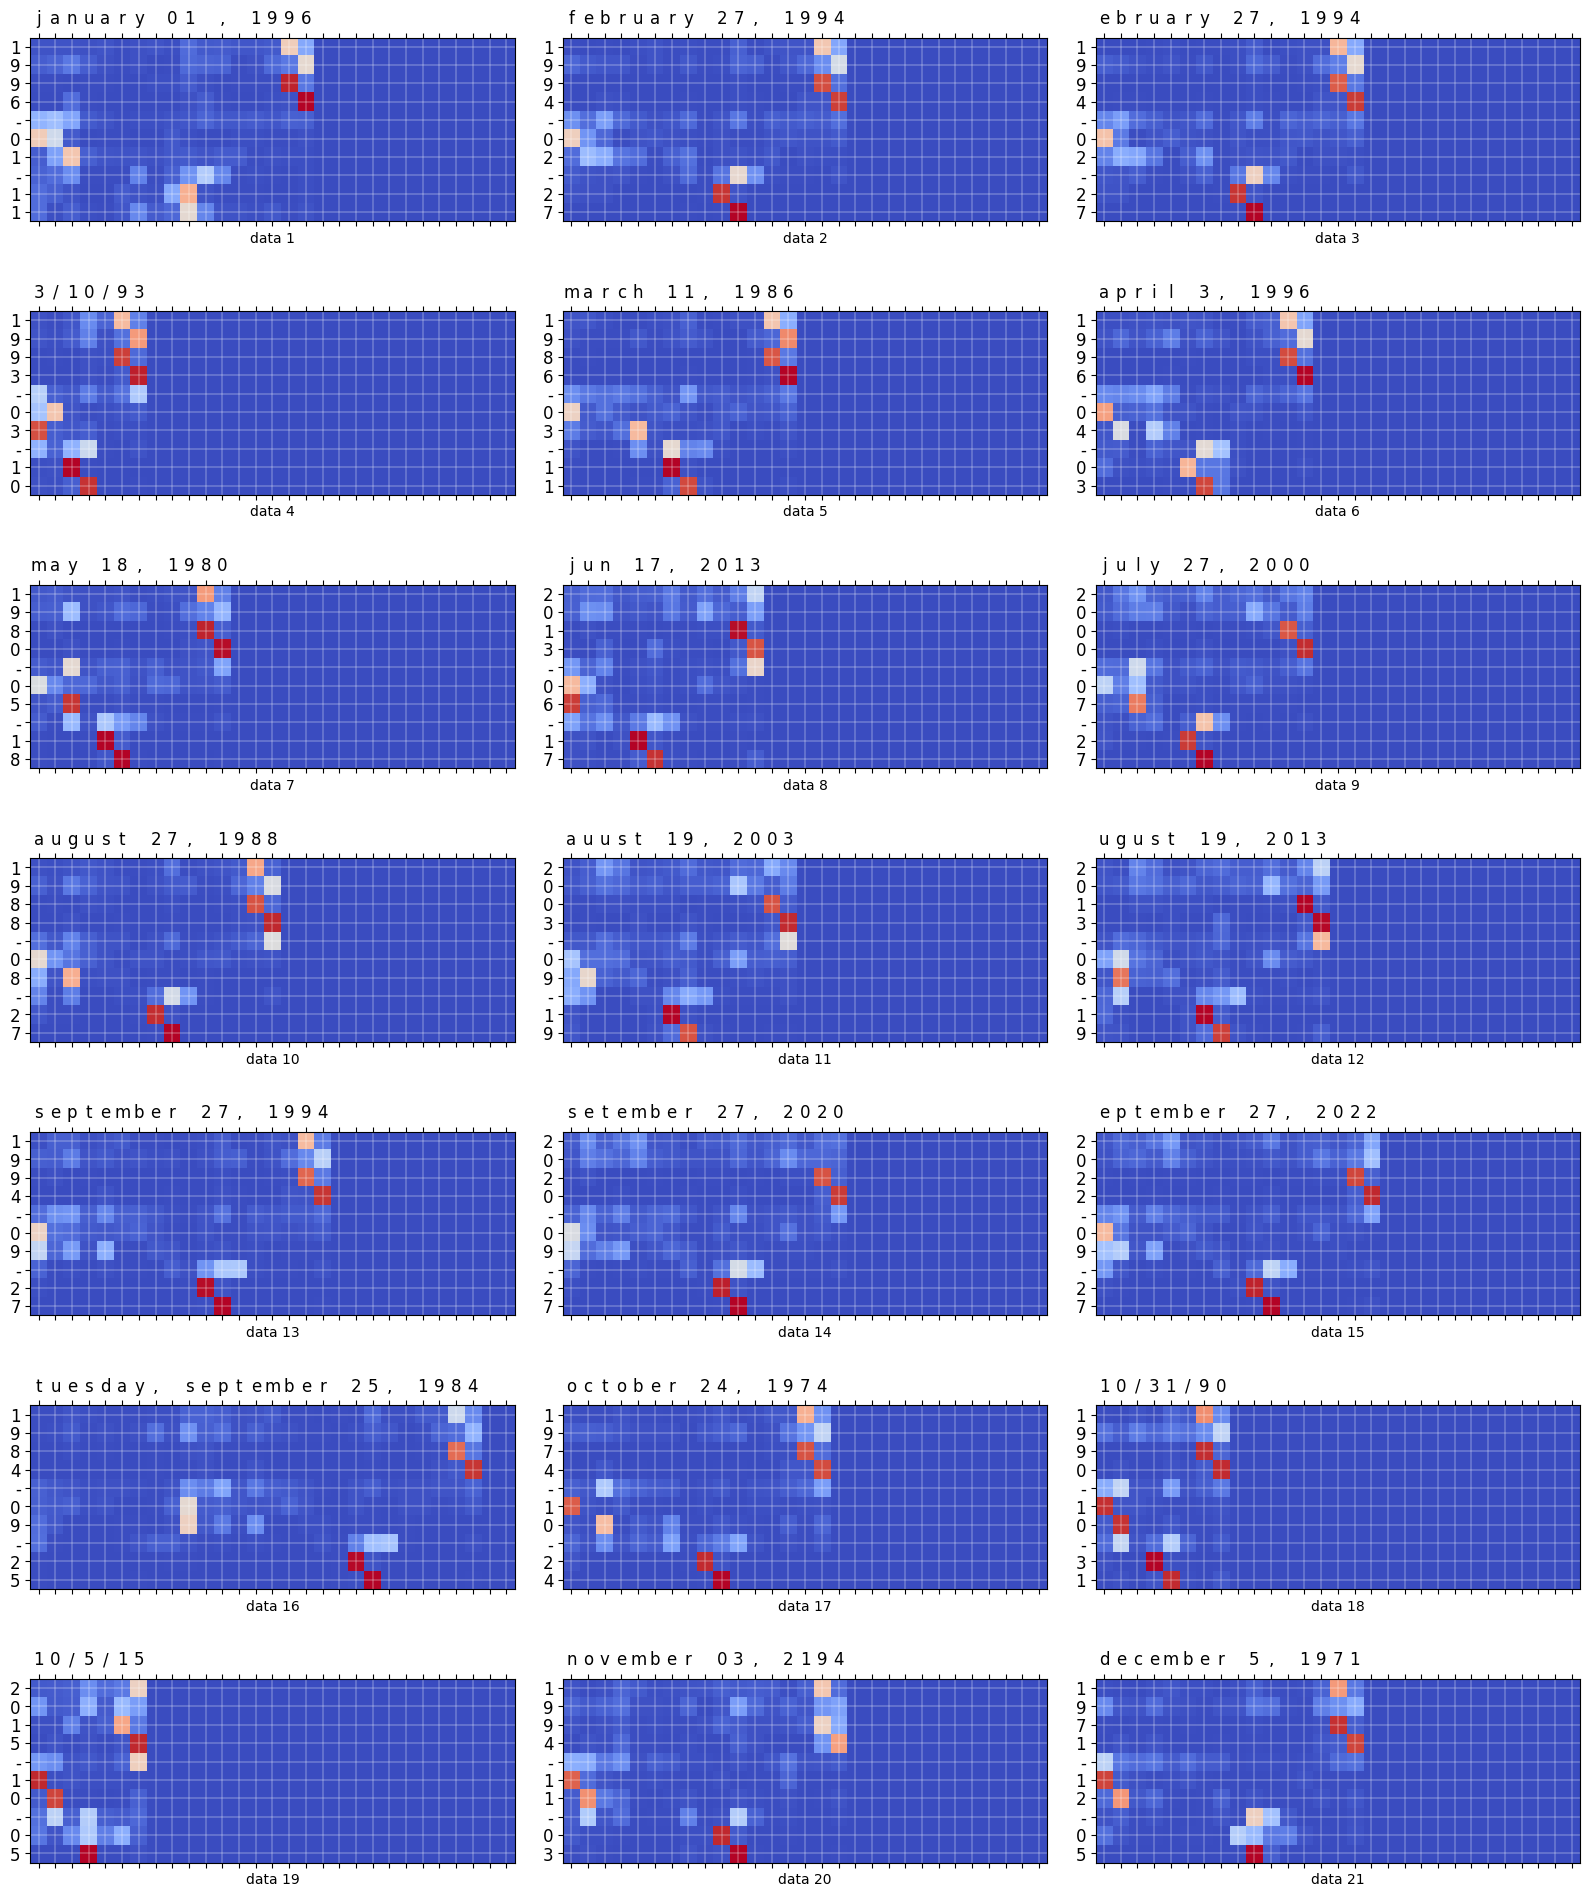

january 01 , 1996              ==> 1996-01-11
february 27, 1994              ==> 1994-02-27
ebruary 27, 1994               ==> 1994-02-27
3/10/93                        ==> 1993-03-10
march 11, 1986                 ==> 1986-03-11
april 3, 1996                  ==> 1996-04-03
may 18, 1980                   ==> 1980-05-18
jun 17, 2013                   ==> 2013-06-17
july 27, 2000                  ==> 2000-07-27
august 27, 1988                ==> 1988-08-27
auust 19, 2003                 ==> 2003-09-19
ugust 19, 2013                 ==> 2013-08-19
september 27, 1994             ==> 1994-09-27
setember 27, 2020              ==> 2020-09-27
eptember 27, 2022              ==> 2022-09-27
tuesday, september 25, 1984    ==> 1984-09-25
october 24, 1974               ==> 1974-10-24
10/31/90                       ==> 1990-10-31
10/5/15                        ==> 2015-10-05
november 03, 2194              ==> 1994-11-03
december 5, 1971               ==> 1971-12-05


In [ ]:
result_tokens = []
result_all = []

for _, (inp,inp_length) in enumerate(test_dataset):
    predictions, attention_weights = evaluate(inp,inp_length)

    for p in predictions:
        result_tokens.append(p.tolist())
        output = ''.join([index_to_word[x] for x in p if index_to_word[x] != END_TOKEN])
        result_all.append(output)


    # id: batch data중에서 몇번째를 그릴 것인가?
    plot_attention_weights(index_to_word,attention_weights, inp.numpy(), result_tokens,id=10)
    plot_attention_weights_all(index_to_word,attention_weights, inp.numpy(), result_tokens)

for x,y in zip(raw_data,result_all):
    print('{:<30} ==> {}'.format(x,y))

# 8.7 날짜 형식 변환 모델 - Pytorch

In [ ]:
! pip install hparams
! pip install faker

In [ ]:
from faker import Faker
from babel.dates import format_date
import datetime

import numpy as np
import pandas as pd
from collections import Counter
from torchtext.vocab import vocab
import pickle
import itertools
import os, time, glob
from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import TensorDataset,DataLoader
import torch.nn.functional as F

from hparams import HParams

## 8.7.1 훈련용 날짜 데이터 생성
Data Augmentation

In [ ]:
def generate_advanced(filename='date.txt',num_data=50000,augmentation_flag=False):
    formats = [ 'full','long','medium','short','MMMM d YYYY','MMMM d, YYYY','d MM YY','d MMM YYYY',
            'd MMM, YYYY','d MMMM YYYY','d MMMM, YYYY','dd MMM YYYY','dd, MMM YYYY','dd.MM.YY','dd.MM.YYYY',
            'YYYY.MM.dd','YYYY.M.d','YY.M.d','YY-M-d','YYYY-M-d', 'YYYY-MM-d', 'YYYY-M-dd', 'YYYY-MM-dd']
    fake = Faker()
    text_width = 29
    with open(filename, "w") as output:
        for i in range(num_data):
            dt = fake.date_object()
            ff = np.random.choice(formats)
            if augmentation_flag and ff != 'short' and ff.count('Y')!=2:
                valid_flag = True
                while valid_flag:
                    try:
                        random_year = np.random.randint(1000,high=10000)
                        dt = datetime.date(random_year, dt.month, dt.day)

                        valid_flag = False
                    except:
                        continue
            formatted  = format_date(dt, format=ff,locale='en_US')
            if len(formatted) <= text_width:
                data = f"{formatted:<{text_width}}_{dt}"
                output.write(data+'\n')

In [ ]:
generate_advanced('date_aug.txt',num_data=100000,augmentation_flag=True)

## 8.7.2 Hyper Parameter 정의 & Dataset 생성

Hyper Parameters

In [ ]:
hp = HParams(
    data_filename='date_aug.txt',
    vocab_filename = 'vocab_torch.pickle',
    model_save_dir = './saved_model_torch',
    checkpoint_name = 'model.pt',
    MAX_LEN = 29,

    # train parameters
    batch_size = 32,
    num_epochs = 10,  # 누적 epochs
    learning_rate = 0.001,

    # model parameters
    embedding_dim=64,
    encoder_hidden_dim=64,
    decoder_hidden_dim=128,

    attention_dim = 64,
    attention_layer_size=64,

    drop_rate = 0.5,
    mask_rate = 0.2
)
assert hp['decoder_hidden_dim'] == 2*hp['encoder_hidden_dim']

os.makedirs(hp['model_save_dir'] ,exist_ok=True)

Data 생성

In [ ]:
GO_TOKEN = '<sos>'
END_TOKEN = '<eos>'
PAD = '<pad>'
UNK = '<unk>'

In [ ]:
def load_data_torch(hp,filename=None,train_flag=True):

    if filename is None:
        filename = hp['data_filename']

    train_data = pd.read_csv(filename, header=None, delimiter='_' )
    if train_data.shape[1] == 1:
        inputs = train_data[0].tolist()
        inputs = [[c for c in ' '.join(x.lower().split())] for x in inputs]
        inputs_length = [len(x) for x in inputs]
    else:
        inputs, targets = train_data[0].tolist(), train_data[1].tolist()
        inputs = [[c for c in ' '.join(x.lower().split())] for x in inputs]
        inputs_length = [len(x) for x in inputs]
        targets = [[GO_TOKEN] + [c for c in x.lower().strip()] + [END_TOKEN] for x in targets]

    if train_flag:
        counter = Counter()
        for (a,b) in zip(inputs,targets):
            counter.update(a + b)

        vocabulary = vocab(counter,specials=(PAD, GO_TOKEN, END_TOKEN,UNK),special_first=True)
        vocabulary.set_default_index(vocabulary[UNK])

        inputs = [vocabulary.lookup_indices(x) for x in inputs]
        targets = [vocabulary.lookup_indices(x) for x in targets]

        inputs = np.stack([np.pad(x,(0,hp['MAX_LEN']-len(x))) for x in inputs]) # hp['MAX_LEN'] 길이로 padding

        word_to_index = vocabulary.get_stoi()  # dict
        index_to_word = vocabulary.get_itos()

        VOCAB_SIZE =  len(word_to_index)
        INPUT_LENGTH = len(inputs[0])
        OUTPUT_LENGTH = len(targets[0])-1  # END_TOKEN 제외

        with open(hp['vocab_filename'], 'wb') as f:
            pickle.dump({'word_to_index': word_to_index, 'index_to_word': index_to_word, 'vocab': vocabulary}, f)

        return np.array(inputs,dtype=np.int32), np.array(inputs_length,dtype=np.int32), np.array(targets,dtype=np.int32), word_to_index, index_to_word,VOCAB_SIZE,INPUT_LENGTH,OUTPUT_LENGTH

    else:
        with open(hp['vocab_filename'],'rb') as f:
            data_loaded = pickle.load(f)
            word_to_index = data_loaded['word_to_index']
            index_to_word = data_loaded['index_to_word']
            vocabulary = data_loaded['vocab']

        inputs = [vocabulary.lookup_indices(x) for x in inputs]
        inputs = np.stack([np.pad(x,(0,hp['MAX_LEN']-len(x))) for x in inputs])

        VOCAB_SIZE = len(word_to_index)
        INPUT_LENGTH = len(inputs[0])
        return np.array(inputs,dtype=np.int32), np.array(inputs_length,dtype=np.int32), word_to_index, index_to_word, VOCAB_SIZE, INPUT_LENGTH

def load_vocab_file(filename):
    with open(filename,'rb') as f:
        data_loaded = pickle.load(f)
        word_to_index = data_loaded['word_to_index']
        index_to_word = data_loaded['index_to_word']
        vocabulary = data_loaded['vocab']

        VOCAB_SIZE = len(word_to_index)
        return word_to_index, index_to_word, VOCAB_SIZE

In [ ]:
test_only = False
if test_only:
    inputs, seq_lengths, word_to_index, index_to_word, VOCAB_SIZE, INPUT_LENGTH = load_data_torch(hp,'test_data.txt',train_flag=False)

    print(len(word_to_index), word_to_index, index_to_word)
    print(f'test_input: {inputs.shape}')
    print(f'INPUT_LENGTH : {INPUT_LENGTH}')

else:
    inputs,seq_lengths, targets, word_to_index, index_to_word, VOCAB_SIZE, INPUT_LENGTH, OUTPUT_LENGTH = load_data_torch(hp)

    train_input, test_input,train_seq_length, test_seq_length, train_target, test_target = train_test_split(inputs,seq_lengths, targets, test_size=0.1, random_state=1234)
    print(f'train_input: {train_input.shape},test_input: {test_input.shape},train_seq_length: {train_seq_length.shape},\
    test_seq_length {test_seq_length.shape},train_target: {train_target.shape},test_target: {test_target.shape}')

    print(f'INPUT_LENGTH: {INPUT_LENGTH}, OUTPUT_LENGTH: {OUTPUT_LENGTH}')  # hp['MAX_LEN'] == INPUT_LENGTH

print(f'VOCAB_SIZE: {VOCAB_SIZE}')

train_input: (90000, 29),test_input: (10000, 29),train_seq_lengtht: (90000,),    test_seq_length (10000,),train_target: (90000, 12),test_target: (10000, 12)
INPUT_LENGTH: 29, OUTPUT_LENGTH: 11
VOCAB_SIZE: 41


In [ ]:
inputs.shape, seq_lengths.shape, targets.shape, VOCAB_SIZE, INPUT_LENGTH, OUTPUT_LENGTH

In [ ]:
word_to_index

In [ ]:
train_dataset = TensorDataset(torch.LongTensor(train_input), torch.LongTensor(train_seq_length), torch.LongTensor(train_target))
valid_dataset = TensorDataset(torch.LongTensor(test_input), torch.LongTensor(test_seq_length), torch.LongTensor(test_target))

train_dataloader = DataLoader(train_dataset, batch_size=hp['batch_size'],shuffle=True,drop_last=False)

batch_size_val = len(test_input)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size_val,shuffle=False,drop_last=False)

In [ ]:
it = iter(valid_dataloader)
x,seq_length,y = next(it)
x.shape, seq_length.shape, y.shape

(torch.Size([10000, 29]), torch.Size([10000]), torch.Size([10000, 12]))

## 8.7.3 Bahdanau Attention Pytorch 구현

In [ ]:
class BahdanauAttention(torch.nn.Module):
    '''
        - tensorflow의 BahdanauAttention과 유사하게 구현.
    '''
    def __init__(self, encoder_dim, decoder_dim, num_units, normalize=False):
        super().__init__()

        self.encoder_dim = encoder_dim
        self.decoder_dim = decoder_dim
        self.num_units = num_units  # attention dim
        self.v = torch.nn.Parameter(torch.rand(self.num_units)) # v_a
        self.query_layer = torch.nn.Linear(self.decoder_dim, self.num_units,bias=False) # W_q
        self.key_layer = torch.nn.Linear(self.encoder_dim, self.num_units,bias=False)  # W_m

        self.normalize = normalize

        if normalize:
            self.attention_g = torch.nn.Parameter( torch.tensor(1.0/self.num_units).sqrt())
            self.attention_b = torch.nn.Parameter(torch.zeros(self.num_units))

    def set_memory(self,encoder_output,lengths=None):
        # encoder_output: (N,Te,encoder_dim)
        # mask(boolean) 할 부분이 True가 될 수 있도록 만든다.
        self.device = encoder_output.device
        self.memory = encoder_output
        self.proj_key = self.key_layer(encoder_output)
        if lengths is not None:
            maxlen = encoder_output.size(1) # Te: encoder_length
            self.mask = torch.arange(maxlen)[None, :].to(lengths.device) >= lengths[:, None]  # mask 할 부분이 True  --> (N,Te)
            self.mask = self.mask.to(self.device)
        else:
            self.mask = None

    def forward(self,queries):
        '''
            queries: [N,1,decoder_dim]  <---- dedocer hidden
            broadcasting을 위해 reshape이 되어 있는 tensor를 입력받는다.  (N,1,decoder_dim]
        '''

        if self.normalize:
            weights = self.query_layer(queries) + self.proj_key + self.attention_b
            weights = self.attention_g * (torch.tanh(weights) @ self.v) / self.v.norm()  # self.v.square().sum().sqrt()
        else:
            weights = self.query_layer(queries) + self.proj_key # --> [N,Te, num_units]
            weights = torch.tanh(weights) @ self.v # [Te, num_units]@ [num_units]  ==>  [Te]

        if self.mask is not None:
            weights.data.masked_fill_(self.mask,-float('inf'))

        alignments = F.softmax(weights, dim=-1) # [N,Te]

        contexts = torch.bmm(alignments.unsqueeze(dim=1), self.memory).squeeze(dim=1)
        return contexts, alignments


## 8.7.4 Encoder-Decoder Pytorch 구현

In [ ]:
class EncoderTorch(torch.nn.Module):
    def __init__(self, vocab_size,embedding_dim,hidden_dim,mask_rate=0.2):
        super(EncoderTorch, self).__init__()
        self.mask_rate = mask_rate

        self.embedding = torch.nn.Embedding(vocab_size, embedding_dim)
        self.pre_dense = torch.nn.Linear(embedding_dim,hidden_dim)

        self.gru = torch.nn.GRU(hidden_dim, hidden_dim,batch_first=True,bidirectional=True)
        self.dense = torch.nn.Linear(2*hidden_dim,hidden_dim)

    def forward(self,x,seq_length):
        self.device = x.device
        if self.training:
            input_mask = (torch.rand(*x.shape) > self.mask_rate).long().to(self.device)
            x = x * input_mask
        embedded = self.embedding(x)
        y = self.pre_dense(embedded)
        y = F.relu(y)

        packed_y = torch.nn.utils.rnn.pack_padded_sequence(y, seq_length, batch_first=True,enforce_sorted=False)

        encoder_outputs, encoder_hidden = self.gru(packed_y)
        encoder_outputs , _ = torch.nn.utils.rnn.pad_packed_sequence(encoder_outputs, batch_first=True)
        out = self.dense(encoder_outputs)
        return out, torch.cat([encoder_hidden[0],encoder_hidden[1]],dim=-1)  # (forward, baward) concat

class DecoderTorch(torch.nn.Module):
    def __init__(self,vocab_size,embedding_dim,encoder_dim,decoder_dim, attention_dim,attention_layer_size,projection_size,drop_rate,sos_token,eos_token):
        super(DecoderTorch, self).__init__()
        self.sos_token = sos_token
        self.eos_token = eos_token
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.attention_layer_size = attention_layer_size

        self.embedding = torch.nn.Embedding(vocab_size, embedding_dim)
        self.dropout = torch.nn.Dropout(p=drop_rate)

        self.decoder_cell = torch.nn.GRUCell(attention_layer_size + embedding_dim, decoder_dim)
        self.attention =  BahdanauAttention(encoder_dim, decoder_dim, attention_dim, normalize = True)
        self.attention_layer = torch.nn.Linear(decoder_dim +encoder_dim, attention_layer_size, bias=False) # W_a
        self.projection_layer = torch.nn.Linear(attention_layer_size, projection_size)

    def forward(self,encoder_outputs,encoder_states,encoder_sequence_length,decoder_inputs=None,maximum_iterations=None):
        self.device = encoder_outputs.device
        batch_size = encoder_outputs.shape[0]

        if self.training: # training mode
            attention_vector = torch.zeros(batch_size,self.attention_layer_size).to(self.device)
            outputs, alignments,_,_ = self.forward_step(encoder_outputs,encoder_states,encoder_sequence_length,decoder_inputs,attention_vector)
        else: # inference mode
            decoder_inputs = torch.LongTensor([self.sos_token] * batch_size).view(batch_size, 1).to(self.device)  # inputs(N,1)
            attention_vector = torch.zeros(batch_size,self.attention_layer_size).to(self.device)
            decoder_hidden = encoder_states

            # greedy embedding
            outputs_all = []
            alignments_all = []


            for s in range(maximum_iterations):
                outputs, alignments, attention_vector, decoder_hidden = self.forward_step(encoder_outputs,decoder_hidden,encoder_sequence_length,decoder_inputs,attention_vector)

                attention_vector = attention_vector.squeeze(1)
                outputs = outputs.squeeze(1) # (N,1,projection_size) -> (N,projection_size)
                outputs_all.append(outputs)
                alignments_all.append(alignments.squeeze(1))

                decoder_inputs = torch.argmax(outputs,axis=-1,keepdim=True) # (N,projection_size) -> (N,1)

            outputs = torch.stack(outputs_all,axis=1)
            alignments = torch.stack(alignments_all,axis=1)

        return outputs, alignments

    def forward_step(self,encoder_outputs,encoder_states,encoder_sequence_length,decoder_inputs,attention_vector):
        # decoder_inputs: (N,S)
        batch_size, S = decoder_inputs.shape
        decoder_hidden = encoder_states

        embedded = self.embedding(decoder_inputs)
        embedded = self.dropout(embedded)
        self.attention.set_memory(encoder_outputs, encoder_sequence_length)

        alignments_all = []
        attention_vector_all = []

        for s in range(S):
            y = torch.cat([embedded[:,s,:],attention_vector],axis=-1)  # (N, embedding_dim + attention_layer_size)
            decoder_hidden = self.decoder_cell(y,decoder_hidden)

            contexts , alignments = self.attention(decoder_hidden.unsqueeze(1)) # (N,encoder_dim), (N,max_encoder_length)

            attention_vector = self.attention_layer(torch.cat([decoder_hidden, contexts],axis=-1)) # (N,attention_layer_size)

            attention_vector_all.append(attention_vector)
            alignments_all.append(alignments)

        # if S > 1:
        #     attentions = torch.stack(attention_vector_all,axis=1) # (N,S,attention_layer_size)
        #     alignments_all = torch.stack(alignments_all,axis=1) # (N,S,max_encoder_length)
        # else:
        #     attentions = attention_vector_all[0].unsqueeze(1) # (N,1,attention_layer_size)
        #     alignments_all = alignments_all[0].unsqueeze(1) # (N,1,max_encoder_length)

        attentions = torch.stack(attention_vector_all,axis=1) # (N,S,attention_layer_size)
        alignments_all = torch.stack(alignments_all,axis=1) # (N,S,max_encoder_length)

        projected_outputs = self.projection_layer(attentions)

        return projected_outputs, alignments_all, attentions, decoder_hidden

In [ ]:
def load_checkpoint(checkpoint_path, encoder, decoder, optimizer,device):
    print(f'loding to {device} ...')
    checkpoint = torch.load(checkpoint_path, map_location=device)
    encoder.load_state_dict(checkpoint['encoder'])
    decoder.load_state_dict(checkpoint['decoder'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    return checkpoint['epoch'] # 몇 epoch까지 훈련된 모델인지

def get_last_checkpoint(model_save_dir):
    filepath = os.path.join(model_save_dir,'*.pt')
    all_files = sorted(glob.glob(filepath))
    if all_files:
        return all_files[-1]
    else: return None

In [ ]:
try:
    VOCAB_SIZE
except:
    word_to_index, index_to_word, VOCAB_SIZE = load_vocab_file(hp['vocab_filename'])

In [ ]:
# model 선언 & restoration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(f'device: {device}')
encoder = EncoderTorch(VOCAB_SIZE,hp['embedding_dim'],hp['encoder_hidden_dim'],hp['mask_rate'])
decoder = DecoderTorch(VOCAB_SIZE,hp['embedding_dim'],hp['encoder_hidden_dim'],hp['decoder_hidden_dim'], hp['attention_dim'],hp['attention_layer_size'],VOCAB_SIZE,hp['drop_rate'],word_to_index[GO_TOKEN], word_to_index[END_TOKEN])

optimizer = torch.optim.Adam(itertools.chain(encoder.parameters(), decoder.parameters()), lr = hp['learning_rate'])

checkpoint_path = get_last_checkpoint(hp['model_save_dir'])
if checkpoint_path:
    start_epoch = load_checkpoint(checkpoint_path, encoder, decoder, optimizer,device)
    print ('Latest checkpoint restored!! {},  epochs = {}'.format(checkpoint_path, start_epoch))
else:
    start_epoch = 0
    print("Initializing from scratch.")

class_weights =  torch.ones(VOCAB_SIZE).to(device)
class_weights[word_to_index[PAD]] = 0
loss_fn = torch.nn.CrossEntropyLoss(class_weights)


device: cpu
Initializing from scratch.


In [ ]:
# 간단한 테스트

print(f'device: {device}')
encoder.to(device); decoder.to(device)

train_flag = True  # True 또는 False로 설정해서 테스트
if train_flag:
    encoder.train(); decoder.train()
    it = iter(train_dataloader)
    n_iter = 5
else:
    encoder.eval(); decoder.eval()
    it = iter(valid_dataloader)
    n_iter=1

for i in range(n_iter):
    x,seq_length,y = next(it)

    x = x.to(device) # seq_length는 cuda로 보내면 안된다.
    y = y.to(device)

    decoder_input = y[:,:-1]
    decoder_target = y[:,1:]

    optimizer.zero_grad()
    encoder_outputs, encoder_hidden = encoder(x,seq_length)

    if train_flag:
        outputs, alignments = decoder(encoder_outputs,encoder_hidden, seq_length,decoder_input)
        loss = loss_fn(outputs.permute(0,2,1), decoder_target)  # torch.transpose(outputs,1,2)로 하면 안된다.
        loss.backward()
    else:
        outputs, alignments = decoder(encoder_outputs,encoder_hidden, seq_length,maximum_iterations=11)

    predictions = outputs.argmax(axis=-1)
    acc = (predictions == decoder_target).float().mean()
    seq_accuracy = (predictions == decoder_target).prod(axis=-1).float().mean()

    if train_flag:
        print(f'{i:>5}, loss: {loss.item():5.4f}, char acc: {acc.item():3.4f}, seq acc: {seq_accuracy.item():5.4f}')
    else:
        print(f'{i:>5}, char acc: {acc.item():3.4f}, seq acc: {seq_accuracy.item():5.4f}')

## 8.7.5 모델 훈련

In [ ]:
def train_pytorch_model(encoder,decoder,optimizer,loss_fn,train_dl, valid_dl,start_epoch,num_epochs,device):
    print(f'device: {device}')
    s_time = time.time()
    encoder.to(device); decoder.to(device)

    for epoch in range(start_epoch+1, num_epochs+1):
        running_loss = []
        acc = 0; seq_acc = 0
        total_seq_length = 0; total = 0

        encoder.train(); decoder.train()
        for i, (x,seq_length,y) in enumerate(train_dl):
            x = x.to(device)
            #seq_length = seq_length.to(device)
            y = y.to(device)
            decoder_input = y[:,:-1]
            decoder_target = y[:,1:]

            optimizer.zero_grad() # zero the parameter gradients

            encoder_outputs, encoder_hidden = encoder(x,seq_length)

            outputs, alignments = decoder(encoder_outputs,encoder_hidden, seq_length, decoder_input)

            loss = loss_fn(outputs.permute(0,2,1), decoder_target)

            loss.backward()
            optimizer.step()

            predictions = outputs.argmax(axis=-1)
            acc  += (predictions == decoder_target).float().sum().item()
            seq_acc += (predictions == decoder_target).prod(axis=-1).float().sum().item()
            total += len(y)
            total_seq_length += decoder_target.numel()  # numel = number of elements

            running_loss.append(loss.item())
        print(f'epoch: {epoch:>5}, loss: {np.mean(running_loss):5.4f}, char acc: {acc/total_seq_length:3.4f}, seq acc: {seq_acc/total:5.4f}, elapsed: {time.time()-s_time:.2f}sec',end='\t')

        acc = 0; seq_acc = 0
        total_seq_length = 0; total = 0

        encoder.eval(); decoder.eval()
        with torch.no_grad():
            for i, (x,seq_length,y) in enumerate(valid_dl):
                x = x.to(device)
                y = y.to(device)
                decoder_input = y[:,:-1]
                decoder_target = y[:,1:]

                encoder_outputs, encoder_hidden = encoder(x,seq_length)
                outputs, alignments = decoder(encoder_outputs,encoder_hidden, seq_length, maximum_iterations=OUTPUT_LENGTH)

                predictions = outputs.argmax(axis=-1)
                acc  += (predictions == decoder_target).float().sum().item()
                seq_acc += (predictions == decoder_target).prod(axis=-1).float().sum().item()
                total += len(y)
                total_seq_length += decoder_target.numel()  # numel = number of elements
            print(f'validation ---- char acc: {acc/total_seq_length:3.4f}, seq acc: {seq_acc/total:5.4f}')

        if epoch%5 == 0:
            checkpoint = {
                'epoch': epoch,
                'encoder': encoder.state_dict(),
                'decoder': decoder.state_dict(),
                'optimizer': optimizer.state_dict()
            }
            filename = os.path.splitext(hp['checkpoint_name'])
            ckpt_save_path = os.path.join(hp['model_save_dir'], f'{filename[0]}-{epoch:0>3}{filename[1]}')
            torch.save(checkpoint,ckpt_save_path)
            print (f'Saving checkpoint for epoch {epoch} at {ckpt_save_path}')

    print('Finished Training')

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_pytorch_model(encoder, decoder, optimizer,loss_fn, train_dataloader, valid_dataloader,start_epoch, hp['num_epochs'], device )

device: cuda:0
epoch:     1, loss: 0.4467, char acc: 0.8426, seq acc: 0.2408, elapsed: 77.33sec	validation ---- char acc: 0.9987, seq acc: 0.9912
epoch:     2, loss: 0.2514, char acc: 0.9025, seq acc: 0.3209, elapsed: 150.98sec	validation ---- char acc: 0.9986, seq acc: 0.9916
epoch:     3, loss: 0.2454, char acc: 0.9032, seq acc: 0.3230, elapsed: 225.77sec	validation ---- char acc: 0.9988, seq acc: 0.9929
epoch:     4, loss: 0.2417, char acc: 0.9039, seq acc: 0.3268, elapsed: 300.64sec	validation ---- char acc: 0.9990, seq acc: 0.9936
epoch:     5, loss: 0.2401, char acc: 0.9038, seq acc: 0.3264, elapsed: 374.77sec	validation ---- char acc: 0.9990, seq acc: 0.9931
Saving checkpoint for epoch 5 at ./saved_model_torch/model-005.pt
epoch:     6, loss: 0.2385, char acc: 0.9046, seq acc: 0.3278, elapsed: 449.33sec	validation ---- char acc: 0.9990, seq acc: 0.9935
epoch:     7, loss: 0.2386, char acc: 0.9042, seq acc: 0.3251, elapsed: 522.70sec	validation ---- char acc: 0.9990, seq acc: 0.9

## 8.7.6 모델 테스트
 - 저장된 모델을 불러와 추론하기

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def evaluate_torch_model(inp,inp_length):
    encoder_outputs, encoder_hidden = encoder(inp,inp_length)
    outputs, alignments = decoder(encoder_outputs,encoder_hidden, inp_length, maximum_iterations=20)

    predictions = outputs.argmax(axis=-1)
    return predictions.detach().cpu().numpy(), alignments.detach().cpu().numpy()

Test Data Loading

In [ ]:
GO_TOKEN = '<sos>'
END_TOKEN = '<eos>'
PAD = '<pad>'
UNK = '<unk>'

- hp['model_save_dir'] 디렉토리 아래에 pt파일 필요.

In [ ]:
# model 선언 & restoration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(f'device: {device}')
encoder = EncoderTorch(VOCAB_SIZE,hp['embedding_dim'],hp['encoder_hidden_dim'],hp['mask_rate'])
decoder = DecoderTorch(VOCAB_SIZE,hp['embedding_dim'],hp['encoder_hidden_dim'],hp['decoder_hidden_dim'], hp['attention_dim'],hp['attention_layer_size'],VOCAB_SIZE,hp['drop_rate'],word_to_index[GO_TOKEN], word_to_index[END_TOKEN])

optimizer = torch.optim.Adam(itertools.chain(encoder.parameters(), decoder.parameters()), lr = hp['learning_rate'])

checkpoint_path = get_last_checkpoint(hp['model_save_dir'])
if checkpoint_path:
    start_epoch = load_checkpoint(checkpoint_path, encoder, decoder, optimizer,device)
    print ('Latest checkpoint restored!! {},  epochs = {}'.format(checkpoint_path, start_epoch))
else:
    print(f"Model not found at {hp['model_save_dir']}")

device: cpu
loding to cpu ...
Latest checkpoint restored!! ./saved_model_torch/model-010.pt,  epochs = 10


- 'test_data.txt', 'vocab_torch.pickle' 파일 필요.

In [ ]:
inputs, seq_lengths, word_to_index, index_to_word, VOCAB_SIZE, INPUT_LENGTH = load_data_torch(hp,'test_data.txt',train_flag=False)

print(len(word_to_index), word_to_index, index_to_word)
print(f'test_input: {inputs.shape}')
print(f'INPUT_LENGTH : {INPUT_LENGTH}')

raw_data = []
pad_token = word_to_index[PAD]

print('='*10,)
for i,d in enumerate(inputs):
    raw_data.append(''.join([index_to_word[x] for x in d if x != pad_token]))
    print(i+1, raw_data[-1])

print('='*10,'\n\n')
test_dataset = TensorDataset(torch.LongTensor(inputs), torch.LongTensor(seq_lengths))
test_dataloader = DataLoader(test_dataset, batch_size=len(inputs),shuffle=False,drop_last=False)

41 {'h': 40, 'w': 39, 'v': 38, '/': 37, 'l': 36, '6': 13, '0': 14, ',': 12, 'f': 22, 'y': 27, '1': 11, '3': 10, '<unk>': 3, 't': 8, 's': 7, 'a': 4, 'e': 23, 'b': 24, 'g': 6, 'p': 34, '<pad>': 0, '-': 15, '7': 20, '<sos>': 1, '8': 16, '9': 19, '2': 17, '4': 21, '<eos>': 2, 'd': 26, 'm': 28, '5': 18, 'o': 29, 'c': 30, ' ': 9, 'u': 5, 'j': 31, 'n': 32, '.': 33, 'r': 25, 'i': 35} ['<pad>', '<sos>', '<eos>', '<unk>', 'a', 'u', 'g', 's', 't', ' ', '3', '1', ',', '6', '0', '-', '8', '2', '5', '9', '7', '4', 'f', 'e', 'b', 'r', 'd', 'y', 'm', 'o', 'c', 'j', 'n', '.', 'p', 'i', 'l', '/', 'v', 'w', 'h']
test_input: (21, 29)
INPUT_LENGTH : 29
1 january 01 , 1996
2 february 27, 1994
3 ebruary 27, 1994
4 3/10/93
5 march 11, 1986
6 april 3, 1996
7 may 18, 1980
8 jun 17, 2013
9 july 27, 2000
10 august 27, 1988
11 auust 19, 2003
12 ugust 19, 2013
13 september 27, 1994
14 setember 27, 2020
15 eptember 27, 2022
16 tuesday, september 25, 1984
17 october 24, 1974
18 10/31/90
19 10/5/15
20 november 03, 219

plot_attention_weights() <-- 8.6.5에 정의되어 있다.

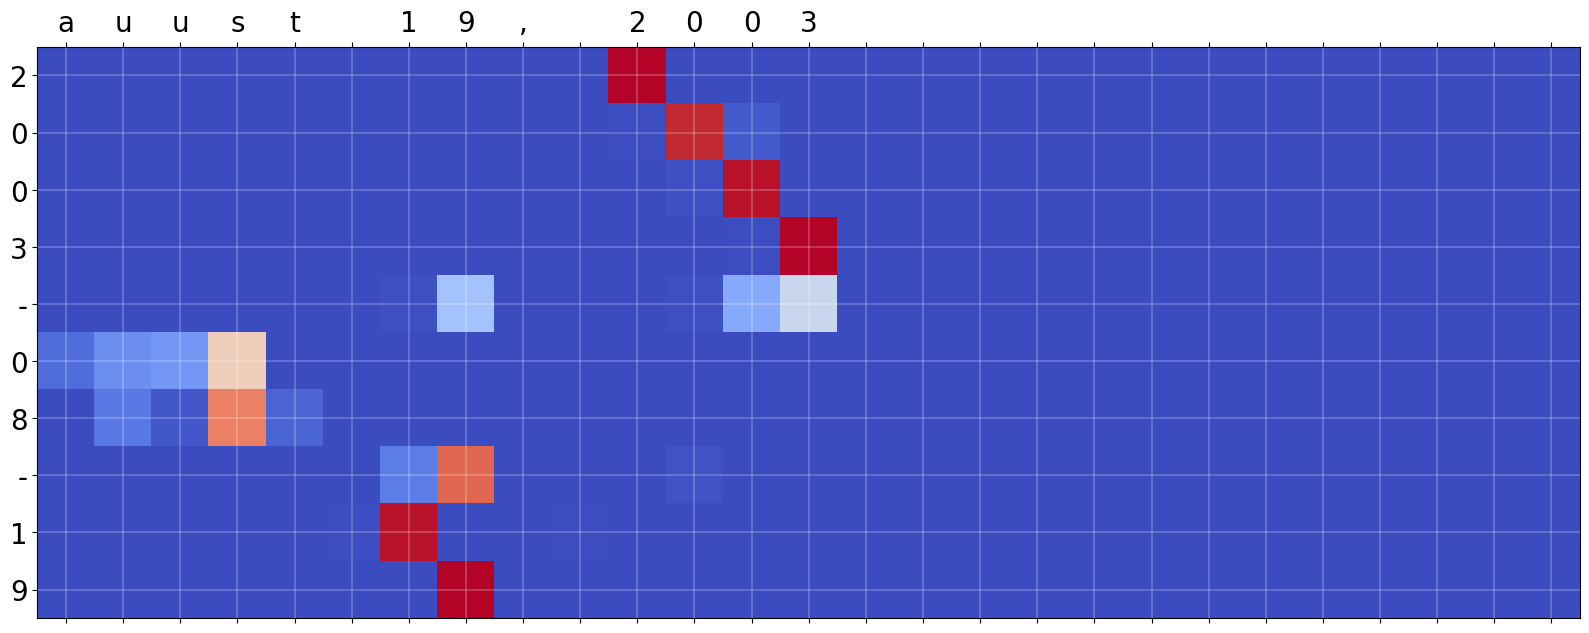

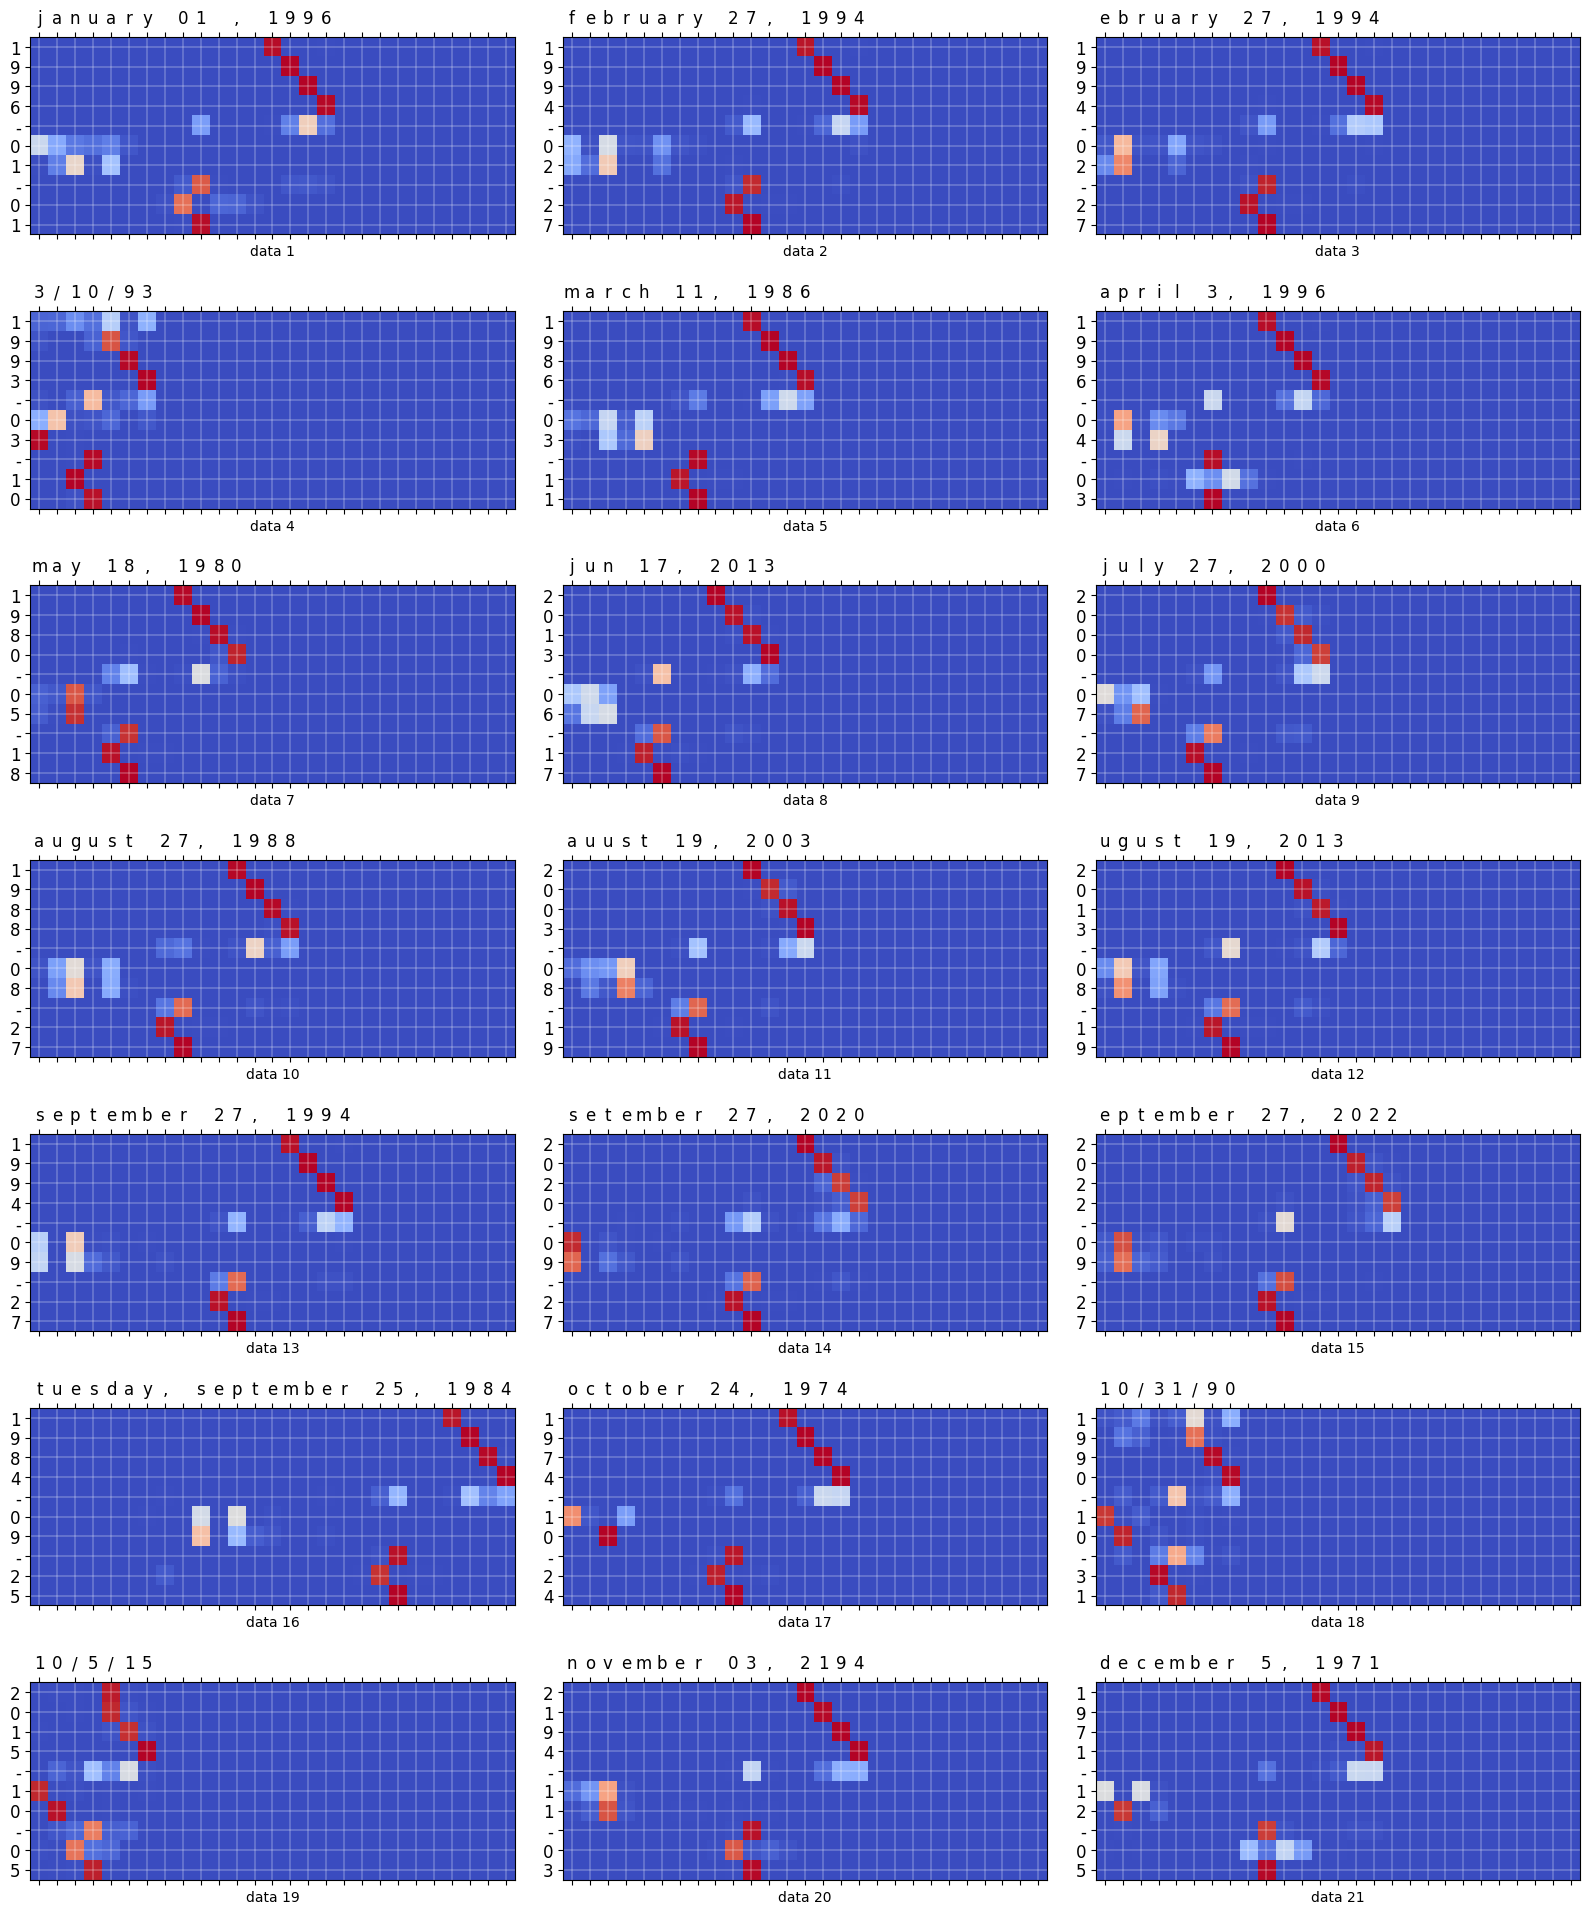

january 01 , 1996              ==> 1996-01-01
february 27, 1994              ==> 1994-02-27
ebruary 27, 1994               ==> 1994-02-27
3/10/93                        ==> 1993-03-10
march 11, 1986                 ==> 1986-03-11
april 3, 1996                  ==> 1996-04-03
may 18, 1980                   ==> 1980-05-18
jun 17, 2013                   ==> 2013-06-17
july 27, 2000                  ==> 2000-07-27
august 27, 1988                ==> 1988-08-27
auust 19, 2003                 ==> 2003-08-19
ugust 19, 2013                 ==> 2013-08-19
september 27, 1994             ==> 1994-09-27
setember 27, 2020              ==> 2020-09-27
eptember 27, 2022              ==> 2022-09-27
tuesday, september 25, 1984    ==> 1984-09-25
october 24, 1974               ==> 1974-10-24
10/31/90                       ==> 1990-10-31
10/5/15                        ==> 2015-10-05
november 03, 2194              ==> 2194-11-03
december 5, 1971               ==> 1971-12-05


In [ ]:
result_tokens = []
result_all = []

encoder.eval(); decoder.eval()
for _, (inp,inp_length) in enumerate(test_dataloader):
    inp = inp.to(device)
    predictions, attention_weights = evaluate_torch_model(inp,inp_length)

    for p in predictions:
        # max_iteration > 11인 경우를 고려해야 한다.
        try:
            k = min(np.where(p==word_to_index[END_TOKEN])[0]) # END_TOKEN이 처음 나오는 위치
        except:
            k = len(p)
        output = ''.join([index_to_word[x] for x in p[:k]])
        result_tokens.append(p.tolist()[:k+1])
        result_all.append(output)

    #id: batch data중에서 몇번째를 그릴 것인가?
    plot_attention_weights(index_to_word,attention_weights, inp.cpu().numpy(), result_tokens,id=10)
    plot_attention_weights_all(index_to_word,attention_weights, inp.cpu().numpy(), result_tokens)

for x,y in zip(raw_data,result_all):
    print('{:<30} ==> {}'.format(x,y))

One-Shot Test: 날짜를 직접 입력하여 테스트

In [ ]:
def convert_date(date_list):
    unk_id = word_to_index[UNK]
    inp = [[word_to_index.get(s,unk_id) for s in d] for d in data_list]
    inp_length = torch.LongTensor([len(s) for s in inp])
    inp = torch.LongTensor(np.stack([np.pad(s,(0,hp['MAX_LEN']-len(s))) for s in inp])).to(device)

    predictions, attention_weights = evaluate_torch_model(inp,inp_length)
    result_all = []
    result_tokens = []
    for p in predictions:
        try:
            k = min(np.where(p==word_to_index[END_TOKEN])[0]) # END_TOKEN이 처음 나오는 위치
        except:
            k = len(p)

        output = ''.join([index_to_word[x] for x in p[:k]])
        result_tokens.append(p.tolist()[:k+1])
        result_all.append(output)

    for x,y in zip(date_list,result_all):
        print('{:<30} ==> {}'.format(x,y))

    plot_attention_weights_all(index_to_word,attention_weights, inp.cpu().numpy(), result_tokens)

october 24, 5102               ==> 5102-10-24
september 27, 3201             ==> 3201-09-27
april 3, 4996                  ==> 4996-04-03


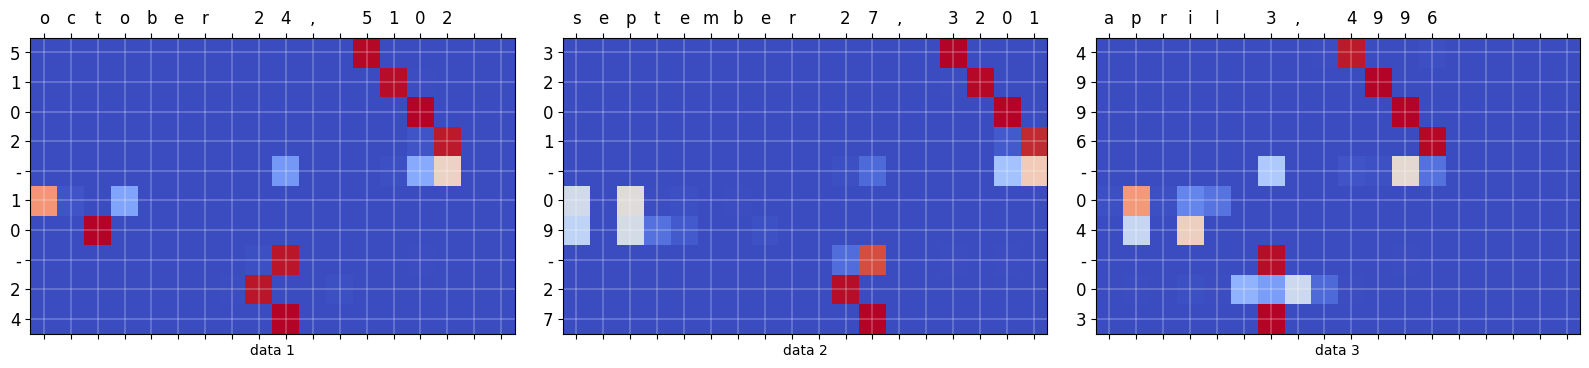

In [ ]:
encoder.eval(); decoder.eval()
data_list = ['october 24, 5102', 'september 27, 3201', 'april 3, 4996']
convert_date(data_list)

# 8.8 Transformer

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 8.8.2 Text Embedding & Positional Encoding

 Positional Encoding


In [ ]:
def positional_encoding(position, d_model):
    positions = np.arange(position)[:, np.newaxis]     # (pos, 1)
    depths = 2*(np.arange(d_model)[np.newaxis, :]//2)/d_model   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    # 짝수 index
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # 홀수 index
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...] # (1,position,d_model)

    return tf.cast(pos_encoding, dtype=tf.float32)

def positional_encoding2(position, d_model):
    # 변형 positional encoding
    d_model = d_model/2

    positions = np.arange(position)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(d_model)[np.newaxis, :]/d_model   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate([np.sin(angle_rads), np.cos(angle_rads)],axis=-1)[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

(2018, 512)


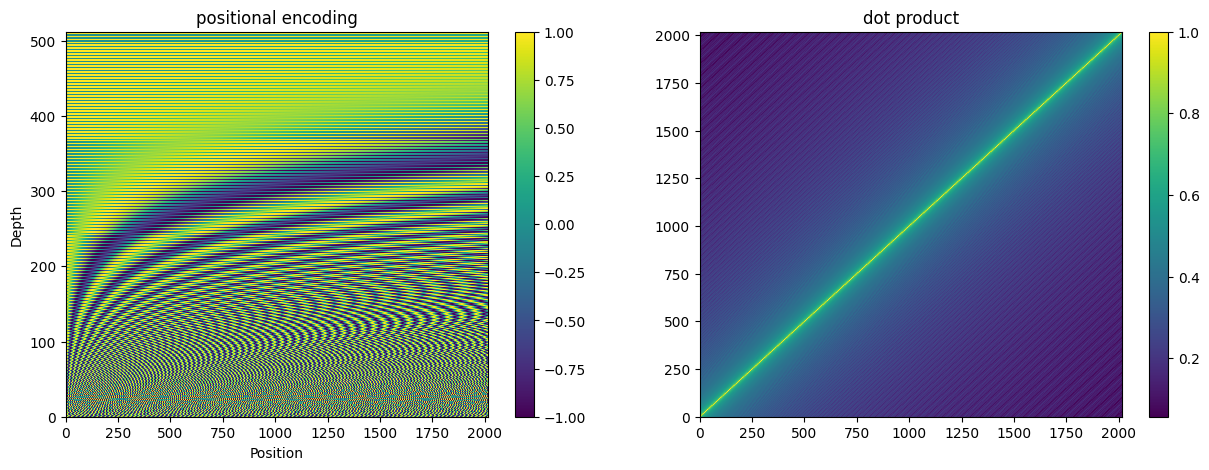

In [ ]:
T_max = 2018; d_model=512
pos_encoding = positional_encoding(T_max, d_model) # (1, T_max, d_model)

pos_encoding = pos_encoding[0]
print(pos_encoding.shape) # (T_max, d_model)

pos_encoding = pos_encoding.numpy()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pcolormesh(pos_encoding.T)

plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.title('positional encoding')

plt.subplot(1,2,2)
pos_encoding_norm = pos_encoding / np.linalg.norm(pos_encoding,axis=1,keepdims=True)
corr = tf.matmul(pos_encoding_norm,pos_encoding_norm.T)
plt.pcolormesh(corr)
plt.colorbar()
plt.title('dot product')

plt.savefig('Positional Encoding')

In [ ]:
np.linalg.norm(pos_encoding,axis=1,keepdims=True).shape

(2018, 1)

(2048, 512)


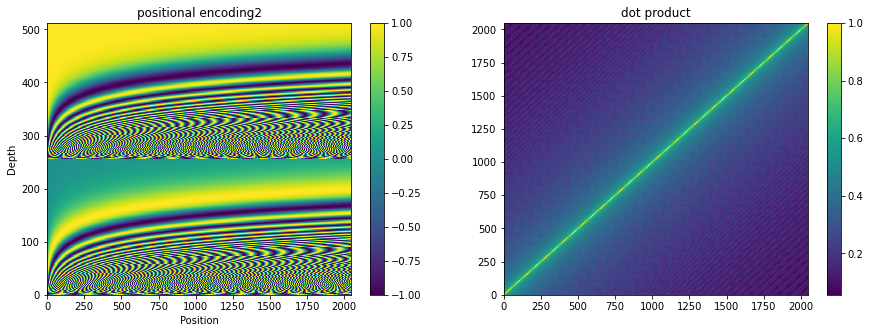

In [ ]:
pos_encoding = positional_encoding2(2048, 512)

pos_encoding = pos_encoding[0]
print(pos_encoding.shape) # (2048, 512)

pos_encoding = pos_encoding.numpy()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pcolormesh(pos_encoding.T)

plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.title('positional encoding2')

plt.subplot(1,2,2)
pos_encoding_norm = pos_encoding / np.linalg.norm(pos_encoding,axis=1,keepdims=True)
corr = tf.matmul(pos_encoding_norm,pos_encoding_norm.T)
plt.pcolormesh(corr)
plt.colorbar()
plt.title('dot product')
plt.savefig('Positional Encoding2')

## 8.8.3 Multi Head Attention & Masking

### Dot Product Attention
Decoder 배치: Trnansformer에서 사용

$T$: Encoder Length

$S$: Decoder Length

In [ ]:
import numpy as np
from scipy.special import softmax

In [ ]:
T = 5; S=7  # T: encoder length, S: decoder length
N = 2; D=3; DD=4
Q = np.random.randn(N,S,D)
K = np.random.randn(N,T,D)
V = np.random.randn(N,T,DD) # transformer에서는 V=K를 사용한다.

score  = np.matmul(Q,K.transpose(0,2,1))
print('score shape: ', score.shape) # (N,S,T) = (2, 7, 5)
alignment = softmax(score,axis=-1)

context = np.matmul(alignment, V)
print('context shape: ', context.shape) # (N,S,DD) = (2, 7, 4)

score shape:  (2, 7, 5)
context shape:  (2, 7, 4)


### tf.keras.layers.MultiHeadAttention

Decoder Causal Mask

In [ ]:
from pkg_resources import parse_version

In [ ]:
T = 5 # decoder length
D = 3 # decoder hidden dim
num_heads = 4
batch_size = 2

layer = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=D,value_dim=13)

target = tf.random.normal((batch_size,T,D))   # decoder tensor

if parse_version(tf.__version__) >= parse_version('2.10'):
    # use_causal_maks --> TF 2.10 이상 필요.
    output_tensor, weights = layer(query=target, value=target, key=target, use_causal_mask = True, return_attention_scores=True)
else:
    causal_mask = tf.cast(tf.linalg.band_part(tf.ones((T, T)), -1, 0),tf.bool) # (T,T)
    causal_mask = tf.tile(causal_mask[None,:,:],[batch_size,1,1]) # (N,T,T)
    output_tensor, weights = layer(query=target, value=target, key=target, attention_mask=causal_mask, return_attention_scores=True)

print(output_tensor.shape) # (N,T,D) = (2, 5, 3)

print(weights.shape) # (N,num_heads,T,T) = (2, 4, 5, 5)

(2, 5, 3)
(2, 4, 5, 5)


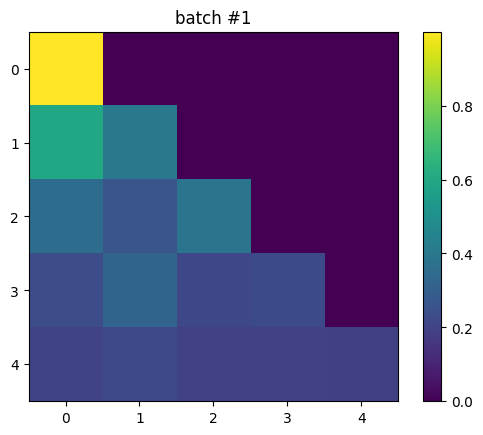

In [ ]:
plt.imshow(weights[0,0])
plt.title('batch #1')
plt.colorbar()

plt.savefig('causal_mask.png')

Padding Mask

(2, 5, 3)
(2, 4, 5, 7)


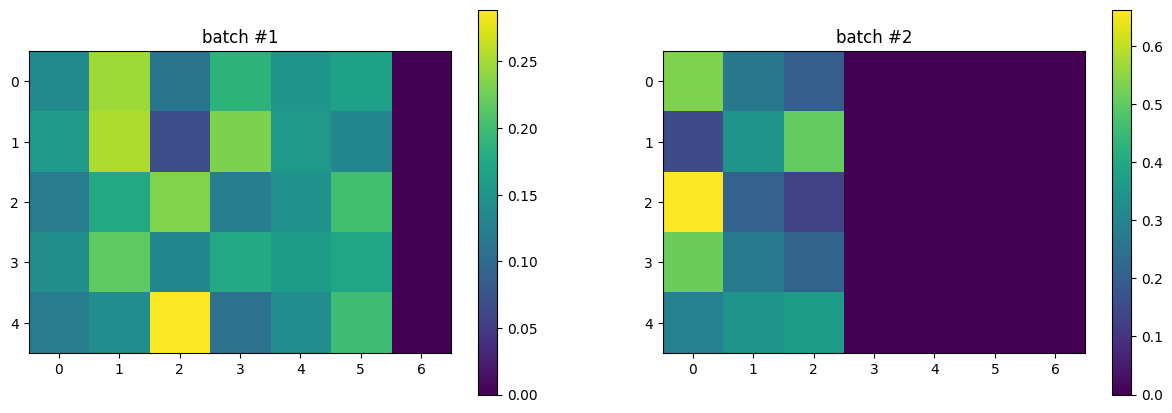

In [ ]:
T = 5 # decoder length
S = 7 # encoder length
D = 3 # hidden dim
num_heads = 4
batch_size = 2

layer = tf.keras.layers.MultiHeadAttention(num_heads=num_heads,
                                           key_dim=D,value_dim=13)

target = tf.random.normal((batch_size,T,D))   # decoder tensor
source = tf.random.normal((batch_size,S,D))   # encoder tensor

enc_mask = np.array([[ True,  True,  True,  True,  True,  True,  False],
                        [ True,  True,  True, False,  False,  False,  False]])  # (N,S)

attention_mask = tf.tile(enc_mask[:,None,:],[1,T,1]) # (N,S) --> (N,T,S)

output_tensor, weights = layer(query=target, value=source, key=source,
                         attention_mask = attention_mask, return_attention_scores=True)

print(output_tensor.shape) # (N,T,D) = (2, 5, 3)
print(weights.shape) # (N,num_heads,T,S) =(2, 4, 5, 7)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(weights[0,0]) # batch 0, head 0
plt.title('batch #1')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(weights[1,2]) # batch 1, head 2
plt.title('batch #2')
plt.colorbar()

# 8.9 Transformer Tensorflow 구현

## 8.9.1 Hyper Parameters & Dataset 생성

### Hyper Parameters

In [ ]:
! pip install hparams

In [ ]:
import tensorflow as tf
import numpy as np
from hparams import HParams

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import preprocessing
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

In [ ]:
hp = HParams(
    data_filename='date_aug.txt',
    vocab_filename = 'transformer_vocab_tf.pickle',
    model_save_dir = './transformer_saved_model_tf',
    checkpoint_name = 'model_ckpt',
    MAX_LEN = 29,
    batch_size = 32,
    num_epoch = 10,

    num_layers = 6,
    d_model = 32,
    dff = 128,   # d_model의 4배. --> Transformer 논문에서 d_model=512, dff= 4x512=2048
    num_heads = 8,
    drop_rate = 0.1,
    mask_rate = 0.2,
)

### Data Loader
 - load_data() 함수는 "8.6.2"에 구현되어 있다.
 - "date_aug.txt"는 "8.7"에서 생성한 날짜 데이터 파일이다.

In [ ]:
GO_TOKEN = '<sos>'
END_TOKEN = '<eos>'
PAD = '<pad>'
UNK = '<unk>'

In [ ]:
# 데이터 생성후, train/test 데이터 분할
inputs,seq_lengths, targets, word_to_index, index_to_word, VOCAB_SIZE, INPUT_LENGTH, OUTPUT_LENGTH = load_data(hp,train_flag=True)

train_input, test_input,train_seq_length, test_seq_length, train_target, test_target = train_test_split(inputs,seq_lengths, targets, test_size=0.1, random_state=1234)
print(f'train_input: {train_input.shape},test_input: {test_input.shape},train_seq_length: {train_seq_length.shape},\
test_seq_length {test_seq_length.shape},train_target: {train_target.shape},test_target: {test_target.shape}')
print(f'INPUT_LENGTH: {INPUT_LENGTH}, OUTPUT_LENGTH: {OUTPUT_LENGTH}')  # hp['MAX_LEN'] == INPUT_LENGTH
print(f'VOCAB_SIZE: {VOCAB_SIZE}')

train_input: (90000, 29),test_input: (10000, 29),train_seq_length: (90000,),test_seq_length (10000,),train_target: (90000, 12),test_target: (10000, 12)
INPUT_LENGTH: 29, OUTPUT_LENGTH: 11
VOCAB_SIZE: 41


In [ ]:
batch_size = hp['batch_size']
train_dataset = tf.data.Dataset.from_tensor_slices(((train_input,train_seq_length), train_target))  # 여기의 argument가 mapping_fn의 argument가 된다.
train_dataset = train_dataset.shuffle(buffer_size=5000)
train_dataset = train_dataset.batch(batch_size,drop_remainder=True)

batch_size_val = len(test_input)
valid_dataset = tf.data.Dataset.from_tensor_slices(((test_input,test_seq_length), test_target))
valid_dataset = valid_dataset.batch(batch_size_val) # 전체 데이터를 batch 하나로...

In [ ]:
for (x,seq_length),y in train_dataset.take(2):
    print(x.shape,seq_length.shape,y.shape)
    print('=='*10)

(32, 29) (32,) (32, 12)
(32, 29) (32,) (32, 12)


## 8.9.2 Transformer Encoder

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
        tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
    ])

class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = tf.keras.layers.MultiHeadAttention(num_heads,key_dim=d_model,value_dim=d_model)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):

        attn_output = self.mha(x, x, x, attention_mask=mask,training=training)  # x: (batch_size, input_seq_len, d_model), mask: (N,input_seq_len,input_seq_len)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,maximum_position_encoding, drop_rate=0.1, mask_rate=0.1):
        super(Encoder, self).__init__()

        self.mask_rate = mask_rate

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding,self.d_model)  #(1,T,D)---> 실제 더할 때는 batch에 대한 broadcasting이 이루어진다.


        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, drop_rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(drop_rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        if training:
            input_mask = tf.cast(tf.random.uniform(x.shape,maxval=1,dtype=tf.float32) > self.mask_rate,tf.int32)
            x = x * input_mask

        x = self.embedding(x)  # (batch_size, input_seq_len) --> (batch_size, input_seq_len, d_model)

        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x  # (batch_size, input_seq_len, d_model)


## 8.9.3 Transformer Decoder

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = tf.keras.layers.MultiHeadAttention(num_heads,key_dim=d_model,value_dim=d_model)
        self.mha2 = tf.keras.layers.MultiHeadAttention(num_heads,key_dim=d_model,value_dim=d_model)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        # x: (batch_size, target_seq_len, d_model)
        # enc_output.shape: (batch_size, input_seq_len, d_model)
        # look_ahead_mask: causal mask
        attn1, attn_weights_block1 = self.mha1(x, x, x, attention_mask = look_ahead_mask,return_attention_scores=True,training=training)  # (batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(out1, enc_output, enc_output, attention_mask = padding_mask,return_attention_scores=True,training=training)  # (batch_size, target_seq_len, d_model)

        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

        return out3, attn_weights_block1, attn_weights_block2   # attn_weights_block2: (N,num_heads,target_seq_len,input_seq_len)

class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training,look_ahead_mask, padding_mask):

        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            attention_weights[f'decoder_layer{i+1}_block1'] = block1 # Decoder Self Attention
            attention_weights[f'decoder_layer{i+1}_block2'] = block2 # Decoder Cross Attention

        return x, attention_weights # x.shape: (batch_size, target_seq_len, d_model)

## 8.9.4 Transformer: Encoder, Decoder 통합

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,target_vocab_size, pe_input, pe_target, drop_rate=0.1,mask_rate=0.1,batch_size=None):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, drop_rate, mask_rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, drop_rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

        # signature
        self.train_step_signature = [tf.TensorSpec(shape=(batch_size, pe_input), dtype=tf.int32),
                                     tf.TensorSpec(shape=(batch_size,), dtype=tf.int32),
                                     tf.TensorSpec(shape=(batch_size, pe_target+1), dtype=tf.int32),]

        self.validation_step_signature = [tf.TensorSpec(shape=(None, pe_input), dtype=tf.int32),
                                          tf.TensorSpec(shape=(None,), dtype=tf.int32),
                                          tf.TensorSpec(shape=(None, pe_target+1), dtype=tf.int32),]


        self.train_loss = tf.keras.metrics.Mean(name='train_loss')
        self.train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

        self.debug = False
        self._apply_all_signatures()

    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):

        enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)

        # dec_output.shape == (batch_size, tar_seq_len, d_model)
        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

        return final_output, attention_weights

    def _apply_signature(self, function, signature):
        if self.debug:
            return function
        else:
            return tf.function(input_signature=signature)(function)

    def _apply_all_signatures(self):
        self.train_step = self._apply_signature(self._train_step, self.train_step_signature)
        self.validation_step = self._apply_signature(self._validation_step, self.validation_step_signature)

    def _train_step(self, inp, seq_length, tar):
        # compile(optimizer = optimizer,loss = loss_function) --> self.optimizer, self.loss가 지정되었다.
        tar_inp = tar[:, :-1]
        tar_real = tar[:, 1:]

        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, seq_length, tar_inp)

        with tf.GradientTape() as tape:
            predictions, _ = self.call(inp, tar_inp,
                                         True,
                                         enc_padding_mask,
                                         combined_mask,
                                         dec_padding_mask)
            loss = self.loss(tar_real, predictions)

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        self.train_loss(loss)
        self.train_accuracy(tar_real, predictions)

    def _validation_step(self, inp, seq_length, tar):
        tar_inp = tar[:, :-1]
        tar_real = tar[:, 1:]

        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, seq_length, tar_inp)

        predictions, _ = self.call(inp, tar_inp,
                                     False,
                                     enc_padding_mask,
                                     combined_mask,
                                     dec_padding_mask)
        predictions = tf.argmax(predictions,axis=-1)
        compared = tf.equal(tf.cast(tar_real,tf.int32),tf.cast(predictions,tf.int32))   #비교하려면, tf.int32로 변환되어야 한다. tf.int64는 안된다.
        char_accuracy = tf.reduce_mean(tf.cast(compared,tf.float32))

        seq_accuracy =  tf.reduce_mean(tf.cast(tf.reduce_all(compared,axis=-1),tf.float32))

        return char_accuracy,seq_accuracy

def create_masks(inp, seq_length, tar):
    S = tf.shape(inp)[1] # encoder length
    T = tf.shape(tar)[1] # decoder length

    enc_mask = tf.sequence_mask(seq_length,S) # (N,S)

    # Encoder padding mask
    enc_padding_mask = tf.tile(enc_mask[:,None,:],[1,S,1]) # (N,S,S)

    # Decoder의 2번째 Multi-Head-Attention에 적용할 encoder padding
    dec_padding_mask = tf.tile(enc_mask[:,None,:],[1,T,1]) # (N,T,S). cross attention mask

    batch_size = tf.shape(inp)[0]
    causal_mask = tf.cast(tf.linalg.band_part(tf.ones((T, T)), -1, 0),tf.bool) # (T,T)
    causal_mask = tf.tile(causal_mask[None,:,:],[batch_size,1,1]) # (N,T,T)

    return enc_padding_mask, causal_mask, dec_padding_mask # (N,S,S), (N,T,T), (N,T,S)


## 8.9.5 Loss Function & Learning Rate Scheduler

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(y_true, y_pred):
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))
    loss_ = loss_object(y_true, y_pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

class CustomScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    # 논문에서 제시한 learning rate scheduler
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomScheduler, self).__init__()

        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(tf.cast(step,tf.float32))
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
scheduler = CustomScheduler(32)
scheduler(1000)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0006987712>

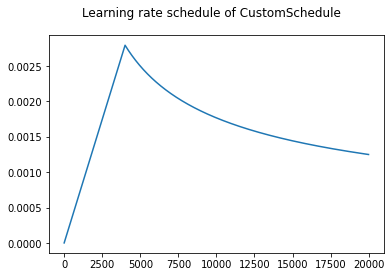

In [ ]:
def plot_lr_scheduler(scheduler, n_steps, step_s):

    lr = []
    steps = list(range(0, n_steps, step_s))

    for step in steps:
        lr_at_s = scheduler(step).numpy()
        lr.append(lr_at_s)

    plt.suptitle(f'Learning rate schedule of {type(scheduler).__name__}')
    plt.plot(steps, lr)

    return steps, lr
scheduler = CustomScheduler(32)
steps, lr_values = plot_lr_scheduler(scheduler, n_steps=20000, step_s=10)
plt.savefig("custom_scheduler.png")

## 8.9.6 모델 훈련

In [ ]:
def train():
    ############ DATA
    inputs,seq_lengths, targets, word_to_index, index_to_word, VOCAB_SIZE, INPUT_LENGTH, OUTPUT_LENGTH = load_data(hp,train_flag=True)
    print(word_to_index)
    print()

    ############ Hyper parameters
    hp['vocab_size'] = VOCAB_SIZE
    batch_size = hp['batch_size']
    encoder_length= INPUT_LENGTH  # = hp['MAX_LEN']
    decoder_length = OUTPUT_LENGTH
    num_layers = hp['num_layers']
    hidden_dim = hp['d_model']
    dff = hp['dff']
    num_heads = hp['num_heads']
    num_epochs = hp['num_epoch']
    drop_rate = hp['drop_rate']
    mask_rate = hp['mask_rate']

    model_save_dir = hp['model_save_dir']
    checkpoint_name = hp['checkpoint_name']


    train_input, test_input,train_seq_length, test_seq_length, train_target, test_target = train_test_split(inputs,seq_lengths, targets, test_size=0.1, random_state=1234)
    print(f'train_input: {train_input.shape},test_input: {test_input.shape},train_seq_length: {train_seq_length.shape}, test_seq_length {test_seq_length.shape},train_target: {train_target.shape},test_target: {test_target.shape}')
    print(f'INPUT_LENGTH: {INPUT_LENGTH}, OUTPUT_LENGTH: {OUTPUT_LENGTH}')  # hp['MAX_LEN'] == INPUT_LENGTH
    print(f'VOCAB_SIZE: {VOCAB_SIZE}')

    train_dataset = tf.data.Dataset.from_tensor_slices(((train_input,train_seq_length), train_target))
    train_dataset = train_dataset.shuffle(buffer_size=20000)
    train_dataset = train_dataset.batch(batch_size,drop_remainder=True)

    valid_dataset = tf.data.Dataset.from_tensor_slices(((test_input,test_seq_length), test_target))
    valid_dataset = valid_dataset.batch(len(test_input),drop_remainder=True)


    ############ MODEL
    transformer = Transformer(num_layers=num_layers, d_model=hidden_dim, num_heads=num_heads, dff=dff,
                              input_vocab_size=VOCAB_SIZE, target_vocab_size=VOCAB_SIZE,pe_input=encoder_length,
                              pe_target=decoder_length,drop_rate=drop_rate,mask_rate=mask_rate,batch_size=batch_size)

    learning_rate = CustomScheduler(hidden_dim)

    optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

    epochs_trained = tf.Variable(0)

    ckpt = tf.train.Checkpoint(transformer=transformer,optimizer=optimizer, epochs = epochs_trained)
    ckpt_manager = tf.train.CheckpointManager(ckpt, model_save_dir,checkpoint_name=checkpoint_name ,max_to_keep=5)

    # if a checkpoint exists, restore the latest checkpoint.
    if ckpt_manager.latest_checkpoint:
        ckpt.restore(ckpt_manager.latest_checkpoint)

        start_epoch = epochs_trained.numpy()
        step_count = start_epoch * (len(train_input)// batch_size)
        print ('Latest checkpoint restored!! {},  epochs = {}, step_count = {}'.format(ckpt_manager.latest_checkpoint, start_epoch, step_count))

    else:
        step_count = 0
        start_epoch = 0
        print("Initializing from scratch.")

    s_time = time.time()

    transformer.compile(optimizer = optimizer,loss = loss_function)

    for epoch in range(start_epoch+1, num_epochs+1):
        for i, ((encoder_inputs,seq_length), targets) in enumerate(train_dataset):
            step_count += 1

            transformer.train_step(encoder_inputs, seq_length, targets)

            if step_count % 500==0:
                #print ('Epoch {:>3} step {:>5}, Loss {:10.4f}, Char. Accuracy {:10.4f}, Elapsed: {:>10}'.format(epoch, step_count, transformer.train_loss.result(), transformer.train_accuracy.result(), int(time.time()-s_time) ))
                print (f'Epoch {epoch:>3} step {step_count:>5}, Loss {transformer.train_loss.result():10.4f}, Char. Accuracy {transformer.train_accuracy.result():10.4f}, Elapsed: {int(time.time()-s_time):>10}')

        # epoch마다 loss, accuracy reset.
        transformer.train_loss.reset_state()
        transformer.train_accuracy.reset_state()

        if epoch % 1== 0:
            for _, ((encoder_inputs,seq_length),targets) in enumerate(valid_dataset):
                char_accuracy,seq_accuracy = transformer.validation_step(encoder_inputs, seq_length, targets)
                print('validation - char_accuracy: {:10.4f}, seq_accuracy: {:10.4f}'.format(char_accuracy,seq_accuracy))


        if epoch % 5==0:
            epochs_trained.assign(epoch)
            ckpt_save_path = ckpt_manager.save(checkpoint_number = epoch)
            print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,ckpt_save_path))

In [ ]:
print(tf.config.list_physical_devices('GPU'))
train()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
{'<unk>': 1, '-': 2, '1': 3, '0': 4, '2': 5, '9': 6, '3': 7, '7': 8, '8': 9, ' ': 10, '6': 11, '5': 12, '4': 13, '<sos>': 14, '<eos>': 15, '.': 16, ',': 17, 'e': 18, 'a': 19, 'r': 20, 'u': 21, 'm': 22, 'y': 23, 'n': 24, 'b': 25, 'j': 26, 'o': 27, 't': 28, 'c': 29, 's': 30, 'd': 31, '/': 32, 'p': 33, 'l': 34, 'f': 35, 'g': 36, 'v': 37, 'h': 38, 'i': 39, 'w': 40, '<pad>': 0}

train_input: (90000, 29),test_input: (10000, 29),train_seq_lengtht: (90000,), test_seq_length (10000,),train_target: (90000, 12),test_target: (10000, 12)
INPUT_LENGTH: 29, OUTPUT_LENGTH: 11
VOCAB_SIZE: 41
Initializing from scratch.
Epoch   1 step   500, Loss     2.2408, Char. Accuracy     0.3652, Elapsed:         21
Epoch   1 step  1000, Loss     1.6817, Char. Accuracy     0.4756, Elapsed:         34
Epoch   1 step  1500, Loss     1.3823, Char. Accuracy     0.5586, Elapsed:         47
Epoch   1 step  2000, Loss     1.1553, Char. Accuracy     0.6292, 

## 8.9.7 모델 테스트
 - 저장된 모델을 불러와 추론하기

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
GO_TOKEN = '<sos>'
END_TOKEN = '<eos>'
PAD = '<pad>'
UNK = '<unk>'

In [ ]:
def plot_attention_weights_multi_head(index_to_word,attention, sentence, result, layer,id=0):
    fig = plt.figure(figsize=(8, 12))

    attention = attention[layer][id]  # batch중에서 id번째 data에 해당하는 것 (num_heads,decoder_length, encoder_length) ---> 추출
    sentence = sentence[id]
    result = result[id]

    sentence = [index_to_word[i] for i in sentence]
    sentence = [a if a!='<pad>' else ' ' for a in sentence][:attention.shape[2]] # 최대 길이 제한

    for head in range(attention.shape[0]):
        ax = fig.add_subplot(4, 2, head+1)

        # plot the attention weights
        ax.matshow(attention[head], cmap='viridis')

        fontdict = {'fontsize': 12}

        ax.set_xticks(range(len(sentence)))
        ax.set_yticks(range(len(result)))

        ax.set_ylim(len(result)-1.5, -0.5)  # 결과의 마지막 <eos>가 보이지 않게 만든다.

        ax.set_xticklabels(sentence, fontdict=fontdict)
        ax.set_yticklabels([index_to_word[i] for i in result], fontdict=fontdict)

        ax.grid(color='white', linestyle='-', linewidth=0.3, )

        ax.set_xlabel('Head {}'.format(head+1))

        ax.set_aspect(2)

    fig.tight_layout()
    fig.subplots_adjust(hspace=0.4)
    plt.savefig('multi-head-attention.png')
    plt.show()

- "transformer_vocab_tf.pickle", "test_data.txt" 파일 필요.

In [ ]:
def test():
    inputs, seq_lengths, word_to_index, index_to_word, VOCAB_SIZE, INPUT_LENGTH = load_data(hp,'test_data.txt',train_flag=False)
    print(word_to_index)
    print('train_input: {}'.format(inputs.shape))
    print('INPUT_LENGTH: {}'.format(INPUT_LENGTH))

    raw_data = []
    pad_token = word_to_index[PAD]
    for i,d in enumerate(inputs):
        raw_data.append(''.join([index_to_word[x] for x in d if x != pad_token]))

    test_dataset = tf.data.Dataset.from_tensor_slices((inputs,seq_lengths))
    test_dataset = test_dataset.batch(len(inputs),drop_remainder=False)

    ########## Hyper parameters
    hp['vocab_size'] = VOCAB_SIZE
    encoder_length= INPUT_LENGTH  # = hp['MAX_LEN']
    decoder_length = 11
    num_layers = hp['num_layers']
    hidden_dim = hp['d_model']
    dff = hp['dff']
    num_heads = hp['num_heads']
    num_epoch = hp['num_epoch']
    drop_rate = hp['drop_rate']
    mask_rate = hp['mask_rate']

    model_save_dir = hp['model_save_dir']
    checkpoint_name = hp['checkpoint_name']

    transformer = Transformer(num_layers=num_layers, d_model=hidden_dim, num_heads=num_heads, dff=dff,
                              input_vocab_size=VOCAB_SIZE, target_vocab_size=VOCAB_SIZE,pe_input=encoder_length,
                              pe_target=decoder_length,drop_rate=drop_rate,mask_rate = mask_rate)

    ckpt = tf.train.Checkpoint(transformer=transformer)
    ckpt_manager = tf.train.CheckpointManager(ckpt, model_save_dir,checkpoint_name=checkpoint_name ,max_to_keep=1)

    # if a checkpoint exists, restore the latest checkpoint.
    if ckpt_manager.latest_checkpoint:
        ckpt.restore(ckpt_manager.latest_checkpoint).expect_partial()   # expect_partial()이 없으면, warning이 많이 뜨다... optimizer관련 variables가 없다고...
        print ('Latest checkpoint restored!!', ckpt_manager.latest_checkpoint)

    else:
        print(f'No Model Found at {model_save_dir}')
        return

    def evaluate(encoder_inputs, seq_length):
        # inp_sentences: batch_data.

        batch_size = len(encoder_inputs)
        decoder_inputs_init = np.array([word_to_index[GO_TOKEN]]*batch_size).reshape(-1,1)
        decoder_inputs = decoder_inputs_init
        for i in range(decoder_length):
            enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_inputs, seq_length, decoder_inputs)

            # predictions.shape == (batch_size, seq_len, vocab_size)
            predictions, attention_weights = transformer(encoder_inputs,
                                                         decoder_inputs,
                                                         False,
                                                         enc_padding_mask,
                                                         combined_mask,
                                                         dec_padding_mask)


            predictions = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

            decoder_inputs = tf.concat([decoder_inputs_init, predictions], axis=-1)

        return predictions, attention_weights

    result_tokens = []
    result_all = []
    end_token = word_to_index[END_TOKEN]
    for _, (encoder_inputs,seq_length) in enumerate(test_dataset):
        predictions, attention_weights = evaluate(encoder_inputs,seq_length)
        for p in predictions:
            result_tokens.append(p.numpy())
            output = ''.join([index_to_word[x] for x in p.numpy() if x != end_token])
            result_all.append(output)

        plot_attention_weights_multi_head(index_to_word,attention_weights, encoder_inputs.numpy(), result_tokens, 'decoder_layer6_block2',id=10) # 1,2,..., num_layers

    for x,y in zip(raw_data,result_all):
        print('{:<30} ==> {}'.format(x,y))

{'<unk>': 1, '-': 2, '1': 3, '0': 4, '2': 5, '9': 6, '3': 7, '7': 8, '8': 9, ' ': 10, '6': 11, '5': 12, '4': 13, '<sos>': 14, '<eos>': 15, '.': 16, ',': 17, 'e': 18, 'a': 19, 'r': 20, 'u': 21, 'm': 22, 'y': 23, 'n': 24, 'b': 25, 'j': 26, 'o': 27, 't': 28, 'c': 29, 's': 30, 'd': 31, '/': 32, 'p': 33, 'l': 34, 'f': 35, 'g': 36, 'v': 37, 'h': 38, 'i': 39, 'w': 40, '<pad>': 0}
train_input: (21, 29)
INPUT_LENGTH: 29
Latest checkpoint restored!! ./transformer_saved_model_tf/model_ckpt-10


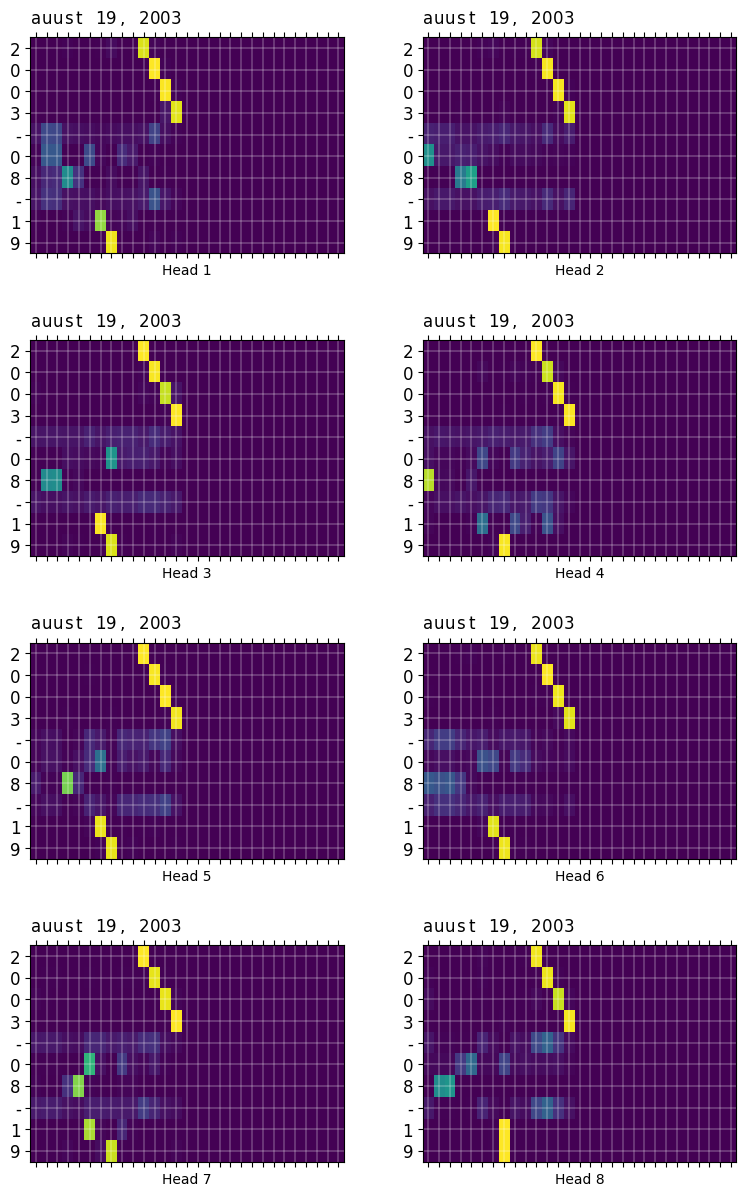

january 01 , 1996              ==> 1996-01-01
february 27, 1994              ==> 1994-02-27
ebruary 27, 1994               ==> 1994-02-27
3/10/93                        ==> 1993-03-10
march 11, 1986                 ==> 1986-03-11
april 3, 1996                  ==> 1996-04-03
may 18, 1980                   ==> 1980-05-18
jun 17, 2013                   ==> 2013-06-17
july 27, 2000                  ==> 2000-07-27
august 27, 1988                ==> 1988-08-27
auust 19, 2003                 ==> 2003-08-19
ugust 19, 2013                 ==> 2013-08-19
september 27, 1994             ==> 1994-09-27
setember 27, 2020              ==> 2020-09-27
eptember 27, 2022              ==> 2022-09-27
tuesday, september 25, 1984    ==> 1984-09-25
october 24, 1974               ==> 1974-10-24
10/31/90                       ==> 1990-10-31
10/5/15                        ==> 2015-10-05
november 03, 2194              ==> 2194-11-03
december 5, 1971               ==> 1971-12-05


In [ ]:
test()

# 8.10 Transformer Pytorch 구현
- batch_size = 32가 128보다 빠르게 훈련된다.
- tf.keras.layers.MultiHeadAttention, nn.MultiheadAttention 모두 논문에는 없는 dropout을 적용할 수 있는 기능이 있다. attention weight에 적용된다.
- https://github.com/keras-team/keras/blob/v2.10.0/keras/layers/attention/multi_head_attention.py#L533
- nn.Transformer에 dropout을 적용하면, nn.MultiheadAttention에도 그 값이 적용된다. --> 이 때문에, training 속도가 Tensorflow 구현보다 느리다.
- nn.MultiheadAttention에는 dropout을 적용하지 않기 위해서는 모델을 분해하여 구현해야 한다.
- nn.Tranaformer는 attention weight를 return해주지 않는다. nn.MultiheadAttention이 구해주는 weight를 버린다.

In [ ]:
! pip install hparams -q

In [ ]:
import torch
from torchtext.vocab import vocab
from torch.utils.data import TensorDataset, DataLoader
from torch import nn,optim

from hparams import HParams   # pip install hparams
import numpy as np
import math
import matplotlib.pyplot as plt

import os, pickle
import pandas as pd
from collections import Counter
import glob
import time

from sklearn.model_selection import train_test_split

## 8.10.1 torch.nn.Transformer API

In [ ]:
# TEST
transformer_model = torch.nn.Transformer(nhead=16, num_encoder_layers=12)
transformer_model.generate_square_subsequent_mask(5)

tensor([[0., -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0.]])

## 8.10.2 Hyper Parameters

In [ ]:
hp = HParams(
    data_filename = 'date_aug.txt',
    vocab_filename = 'transformer_vocab_torch.pickle',
    model_save_dir = './pytorch_transformer_saved_model_batch_first',
    checkpoint_name = 'model_ckpt.pt',

    batch_size = 32,
    num_epoch = 15,

    MAX_LEN = 29,
    OUTPUT_LENGTH = 11,

    lr = 0.001,
    drop_rate = 0.1,
    mask_rate = 0.2,
    d_model = 32,
    nhead = 8,
    num_encoder_layers = 6,
    num_decoder_layers = 6,
    dim_feedforward =  128,

    batch_first = True,
    custum_scheduler_flag=False,
)

if not os.path.exists(hp['model_save_dir']):
    os.makedirs(hp['model_save_dir'])

## 8.10.3 Learning Rate Scheduler

In [ ]:
class CustomScheduler:
    def __init__(self, d_model, warmup_steps=4000):
        self.d_model = d_model
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        if step <=0: step=1
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)

        return 1.0/math.sqrt(self.d_model) * min(arg1, arg2)

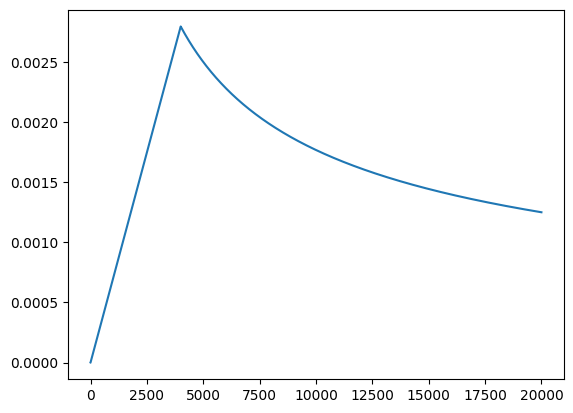

In [ ]:
# Test Code
model = torch.nn.Linear(2,3)
optimizer = torch.optim.Adam(model.parameters(),lr=1)

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = CustomScheduler(32))

model = torch.nn.Linear(2,3)
optimizer = torch.optim.Adam(model.parameters(),lr=1)

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = CustomScheduler(32))

X = []
Y = []
for i in range(20000):
    X.append(i)
    Y.append(scheduler.get_last_lr())
    optimizer.step()
    scheduler.step()

plt.plot(X,Y)

## 8.10.4 Transformer 구현

In [ ]:
class PositionalEncoding(nn.Module):
    # https://pytorch.org/tutorials/beginner/transformer_tutorial.html
    def __init__(self, d_model, dropout=0.1, max_len=5000,batch_first=False):
        super(PositionalEncoding, self).__init__()
        self.batch_first = batch_first
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        if self.batch_first == False:
            pe = pe.unsqueeze(1) # (max_len,1,d_model) <- batch_first=False
        self.register_buffer('pe', pe)  # self.pe가 생성된다.

    def forward(self, x):
        if self.batch_first:
            x = x + self.pe[:x.size(1), :]
        else:
            x = x + self.pe[:x.size(0), :]

        return self.dropout(x)

class Transformer(nn.Module):
    def __init__(self,hp,vocab_size,padding_id=None, device=None):
        super(Transformer,self).__init__()

        if device is None:
            self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        else:
            self.device = device

        self.batch_first = hp['batch_first']
        self.padding_id = padding_id
        self.d_model = hp['d_model']
        nhead = hp['nhead']
        num_encoder_layers = hp['num_encoder_layers']
        num_decoder_layers = hp['num_decoder_layers']
        dim_feedforward = hp['dim_feedforward']
        drop_rate = hp['drop_rate']
        self.mask_rate = hp['mask_rate']
        input_length = hp['MAX_LEN']
        output_length = hp['OUTPUT_LENGTH']

        self.embedding = nn.Embedding(vocab_size, self.d_model) # encoder, decoder 공유
        self.encoder_positional_encoding = PositionalEncoding(self.d_model,drop_rate,input_length,self.batch_first)
        self.decoder_positional_encoding = PositionalEncoding(self.d_model,drop_rate,output_length,self.batch_first)


        self.transformer_model = nn.Transformer(d_model=self.d_model, nhead=nhead, num_encoder_layers=num_encoder_layers,
                                                num_decoder_layers=num_decoder_layers,dim_feedforward=dim_feedforward,
                                                dropout=drop_rate,batch_first=self.batch_first)
        self.out_linear = nn.Linear(self.d_model, vocab_size)
        torch.nn.init.zeros_(self.out_linear.bias)

        self.loss_fn = nn.CrossEntropyLoss()

        self.tgt_mask = self.transformer_model.generate_square_subsequent_mask(output_length).to(self.device)

    def forward(self,ecoder_inputs, decoder_inputs,input_length=None):
        if self.training:
            input_mask = (torch.rand(*ecoder_inputs.shape) > self.mask_rate).long().to(self.device)
            ecoder_inputs_masked = ecoder_inputs * input_mask
        else:
            ecoder_inputs_masked = ecoder_inputs

        x = self.embedding(ecoder_inputs_masked) * math.sqrt(self.d_model)  # (29,N) embedding ---> (29,N,hidden_dim)
        x = self.encoder_positional_encoding(x)
        y = self.embedding(decoder_inputs) * math.sqrt(self.d_model) # (11,N) embedding  ---> (11,N,hidden_dim)
        y = self.decoder_positional_encoding(y)
        if input_length: # inference mode에서 사용
            tgt_mask = self.transformer_model.generate_square_subsequent_mask(input_length).to(self.device)
        else:
            # training mode
            tgt_mask = self.tgt_mask

        if self.padding_id is not None:
            src_key_padding_mask = torch.eq(ecoder_inputs,self.padding_id).to(self.device)   # (N,Te): src_lenght Te가 mini batch마다 변한다.
            if not self.batch_first:
                src_key_padding_mask = src_key_padding_mask.T # (Te,N) -> (N,Te)
        else:
            src_key_padding_mask = None

        outputs = self.transformer_model(x,y,src_mask=None, tgt_mask=tgt_mask,src_key_padding_mask=src_key_padding_mask)  # tgt_mask필요, (T,N,D)
        outputs = self.out_linear(outputs) # (T,N,vocab_size)
        return outputs

## 8.10.5 모델 훈련
- load_data_torch() --  "8.7.2"에 구현되어 있다.
- get_last_checkpoint() --  "8.7.4"에 구현되어 있다.

In [ ]:
GO_TOKEN = '<sos>'; END_TOKEN = '<eos>'; PAD = '<pad>'; UNK = '<unk>'

In [ ]:
def train():
    inputs,seq_lengths, targets, word_to_index, index_to_word, VOCAB_SIZE, INPUT_LENGTH, OUTPUT_LENGTH = load_data_torch(hp)

    train_input, test_input,train_seq_length, test_seq_length, train_target, test_target = train_test_split(inputs,seq_lengths, targets, test_size=0.1, random_state=1234)
    print(f'train_input: {train_input.shape},test_input: {test_input.shape},train_seq_length: {train_seq_length.shape},\
    test_seq_length {test_seq_length.shape},train_target: {train_target.shape},test_target: {test_target.shape}')

    print(f'INPUT_LENGTH: {INPUT_LENGTH}, OUTPUT_LENGTH: {OUTPUT_LENGTH}')  # hp['MAX_LEN'] == INPUT_LENGTH

    print(f'VOCAB_SIZE: {VOCAB_SIZE}')

    train_dataset = TensorDataset(torch.LongTensor(train_input), torch.LongTensor(train_seq_length), torch.LongTensor(train_target))
    valid_dataset = TensorDataset(torch.LongTensor(test_input), torch.LongTensor(test_seq_length), torch.LongTensor(test_target))

    train_dataloader = DataLoader(train_dataset, batch_size=hp['batch_size'],shuffle=True,drop_last=False)

    batch_size_val = len(test_input)
    valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size_val,shuffle=False,drop_last=False)

    padding_id = word_to_index[PAD]
    batch_first = hp['batch_first']
    model = Transformer(hp,vocab_size=VOCAB_SIZE,padding_id = padding_id).to(device)

    if hp['custum_scheduler_flag']:
        optimizer = optim.Adam(model.parameters(),lr=1.0)
        scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = CustomScheduler(hp['d_model']))
    else:
        optimizer = optim.Adam(model.parameters(),lr=hp['lr'])
        scheduler = None

    num_epoch = hp['num_epoch']
    start_epoch=1
    saved_model = get_last_checkpoint(hp['model_save_dir'])
    if saved_model:
        checkpoint = torch.load(saved_model,map_location=device)

        model.load_state_dict(checkpoint['model'])
        optimizer.load_state_dict(checkpoint['optimizer'])

        start_epoch = checkpoint['epoch']
        step_count = start_epoch * len(train_dataloader)

        print(f'Model Found at {saved_model}. epochs = {start_epoch}.')
    else:
        print("Initializing from scratch.")
        start_epoch = 0
        step_count = 0

    print(f"batch_size: {hp['batch_size']}, num_epoch: {num_epoch}, batch_first: {batch_first}")

    s_time = time.time()

    for epoch in range(start_epoch+1, num_epoch+1):
        model.train()
        for i, (x,_,target) in enumerate(train_dataloader):
            step_count += 1
            optimizer.zero_grad()

            x = x.to(device)  # (N,29)
            target = target.to(device)

            if batch_first:
                encoder_inputs = x # (N,29)
                decoder_inputs = target[:,:-1]  # (N,OUTPUT_LENGTH)
                outputs = model(encoder_inputs,decoder_inputs)  # (T,N,D)
            else:
                encoder_inputs = x.T # (29,N)
                decoder_inputs = target[:,:-1].T  # (OUTPUT_LENGTH,N)
                outputs = model(encoder_inputs,decoder_inputs).permute(1,0,2)  # (T,N,D) --> (N,T,D)

            loss = model.loss_fn(outputs.permute(0,2,1), target[:,1:])  # (N,T,D)  ---> CrossEntropyLoss에는 (N,D,T)를 넘겨야 한다. target에는 (N,T)
            loss.backward()
            optimizer.step()
            if scheduler is not None: scheduler.step()

            if step_count % 500 == 0:
                print('')
                print(f'epoch: {epoch:>3}, setp: {step_count:>5}, loss: {loss.item():8.4f}, elapsed: {int(time.time()-s_time):>8},', end='\t')
                predict = torch.argmax(outputs,-1).detach() # predict: (N,T), target: (N,T)
                print(f'seq_acc: {(target[:,1:]==predict).prod(dim=1).float().mean().item():8.4f},', end='\t')


        if (epoch)%1==0:
            model.eval()
            with torch.no_grad():
                for _, (x,_,target) in enumerate(valid_dataloader):
                    x = x.to(device)  # (N,29)
                    target = target.to(device)
                    if batch_first:
                        encoder_inputs = x # (N,29)
                        decoder_inputs = target[:,:-1]  # (N,OUTPUT_LENGTH)
                        outputs = model(encoder_inputs,decoder_inputs)  # (T,N,D)
                    else:
                        encoder_inputs = x.T # (29,N)
                        decoder_inputs = target[:,:-1].T  # (OUTPUT_LENGTH,N)
                        outputs = model(encoder_inputs,decoder_inputs).permute(1,0,2)  # (T,N,D) --> (N,T,D)

                    predict = torch.argmax(outputs,-1).detach() # predict: (N,T), target: (N,T)

                    valid_loss = model.loss_fn(outputs.permute(0,2,1), target[:,1:])
                    character_accuracy = (target[:,1:]==predict).float().mean().item()
                    sequence_accuracy = (target[:,1:]==predict).prod(dim=1).float().mean().item()

                    print(f'valid_loss: {valid_loss:8.4f},val char_acc: {character_accuracy:8.4f}, val seq_acc: {sequence_accuracy:8.4f}',end='\t')

        if (epoch)%5==0:
            checkpoint = {
                'epoch': epoch,
                'model': model.state_dict(),
                'optimizer': optimizer.state_dict()
            }
            filename = os.path.splitext(hp['checkpoint_name'])
            ckpt_save_path = os.path.join(hp['model_save_dir'], f'{filename[0]}-{epoch:0>3}{filename[1]}')
            torch.save(checkpoint,ckpt_save_path)
            print (f'\nSaving checkpoint for epoch {epoch} at {ckpt_save_path}')

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}, available: {torch.cuda.is_available()}')

train()

device: cuda, available: True
train_input: (90000, 29),test_input: (10000, 29),train_seq_lengtht: (90000,),    test_seq_length (10000,),train_target: (90000, 12),test_target: (10000, 12)
INPUT_LENGTH: 29, OUTPUT_LENGTH: 11
VOCAB_SIZE: 41
Initializing from scratch.
batch_size: 32, num_epoch: 15, batch_first: True

epoch:   1, setp:   500, loss:   1.2737, elapsed:       22,	seq_acc:   0.0000,	
epoch:   1, setp:  1000, loss:   1.0565, elapsed:       44,	seq_acc:   0.0000,	
epoch:   1, setp:  1500, loss:   1.0473, elapsed:       69,	seq_acc:   0.0000,	
epoch:   1, setp:  2000, loss:   0.9978, elapsed:       91,	seq_acc:   0.0312,	
epoch:   1, setp:  2500, loss:   0.9311, elapsed:      113,	seq_acc:   0.0000,	valid_loss:   0.6763,val char_acc:   0.7295, val seq_acc:   0.0112	
epoch:   2, setp:  3000, loss:   0.8559, elapsed:      136,	seq_acc:   0.0000,	
epoch:   2, setp:  3500, loss:   0.9389, elapsed:      158,	seq_acc:   0.0000,	
epoch:   2, setp:  4000, loss:   0.8387, elapsed:      179

## 8.10.6 모델 테스트
- 저장된 모델을 불러와 추론하기
  - load_data_torch() --  "8.7.2"에 구현되어 있다.
  - get_last_checkpoint() --  "8.7.4"에 구현되어 있다.

In [ ]:
import torch
from torchtext.vocab import vocab
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
GO_TOKEN = '<sos>'; END_TOKEN = '<eos>'; PAD = '<pad>'; UNK = '<unk>'

In [ ]:
def test():
    inputs, seq_lengths, word_to_index, index_to_word, VOCAB_SIZE, INPUT_LENGTH = load_data_torch(hp,'test_data.txt',train_flag=False)

    print(len(word_to_index), word_to_index, index_to_word)
    print(f'test_input: {inputs.shape}')
    print(f'INPUT_LENGTH : {INPUT_LENGTH}')

    raw_data = []
    padding_id = word_to_index[PAD]
    sos_id = word_to_index[GO_TOKEN]

    print('='*10,)
    for i,d in enumerate(inputs):
        raw_data.append(''.join([index_to_word[x] for x in d if x != padding_id]))
        print(i+1, raw_data[-1])

    print('='*10,'\n\n')
    test_dataset = TensorDataset(torch.LongTensor(inputs), torch.LongTensor(seq_lengths))
    test_dataloader = DataLoader(test_dataset, batch_size=len(inputs),shuffle=False,drop_last=False)

    batch_first = hp['batch_first']
    model = Transformer(hp,vocab_size=VOCAB_SIZE,padding_id = padding_id).to(device)

    model.eval()
    saved_model = get_last_checkpoint(hp['model_save_dir'])
    if saved_model:
        checkpoint = torch.load(saved_model,map_location=device)

        model.load_state_dict(checkpoint['model'])
        start_epoch = checkpoint['epoch']
        print(f'Model Found at {saved_model}. epochs = {start_epoch}.')
    else:
        print(f"No Model Found at {hp['model_save_dir']}")
        return

    result_all = []

    for _, (x,_) in enumerate(test_dataloader):
        x = x.to(device)
        batch_size = len(x)
        decoder_inputs_init = torch.tensor([sos_id] * batch_size).to(device)

        if batch_first:
            decoder_inputs_init = decoder_inputs_init.reshape(batch_size,1)
            concat_axis = 1
            encoder_inputs = x
        else:
            decoder_inputs_init = decoder_inputs_init.reshape(1,batch_size)
            concat_axis = 0
            encoder_inputs = x.T

        decoder_inputs = decoder_inputs_init
        for i in range(hp['OUTPUT_LENGTH']):
            outputs = model(encoder_inputs, decoder_inputs,input_length=i+1)
            outputs = torch.argmax(outputs,-1)
            decoder_inputs = torch.cat([decoder_inputs_init,outputs],concat_axis)

        if batch_first == False:
            outputs = outputs.T

        for prediction in outputs.cpu().numpy():
            try:
                k = min(np.where(prediction==word_to_index[END_TOKEN])[0]) # END_TOKEN이 처음 나오는 위치
            except:
                k = len(prediction)

            result_all.append(''.join([index_to_word[x] for x in prediction[:k]]))

    for x,y in zip(raw_data,result_all):
        print('{:<30} ==> {}'.format(x,y))

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}, available: {torch.cuda.is_available()}')
test()

device: cpu, available: False
41 {'h': 40, 'w': 39, 'v': 38, '/': 37, 'l': 36, '6': 13, '0': 14, ',': 12, 'f': 22, 'y': 27, '1': 11, '3': 10, '<unk>': 3, 't': 8, 's': 7, 'a': 4, 'e': 23, 'b': 24, 'g': 6, 'p': 34, '<pad>': 0, '-': 15, '7': 20, '<sos>': 1, '8': 16, '9': 19, '2': 17, '4': 21, '<eos>': 2, 'd': 26, 'm': 28, '5': 18, 'o': 29, 'c': 30, ' ': 9, 'u': 5, 'j': 31, 'n': 32, '.': 33, 'r': 25, 'i': 35} ['<pad>', '<sos>', '<eos>', '<unk>', 'a', 'u', 'g', 's', 't', ' ', '3', '1', ',', '6', '0', '-', '8', '2', '5', '9', '7', '4', 'f', 'e', 'b', 'r', 'd', 'y', 'm', 'o', 'c', 'j', 'n', '.', 'p', 'i', 'l', '/', 'v', 'w', 'h']
test_input: (21, 29)
INPUT_LENGTH : 29
1 january 01 , 1996
2 february 27, 1994
3 ebruary 27, 1994
4 3/10/93
5 march 11, 1986
6 april 3, 1996
7 may 18, 1980
8 jun 17, 2013
9 july 27, 2000
10 august 27, 1988
11 auust 19, 2003
12 ugust 19, 2013
13 september 27, 1994
14 setember 27, 2020
15 eptember 27, 2022
16 tuesday, september 25, 1984
17 october 24, 1974
18 10/31/90
